In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score

In [3]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Basic Statistics

In [4]:
print('Total no of columns present in the dataset is ',df.shape[0])
print('Total no of rows present in the dataset is ',df.shape[1])
print('The size of the dataset',df.size)

Total no of columns present in the dataset is  145460
Total no of rows present in the dataset is  23
The size of the dataset 3345580


In [5]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['iso_week_number'] = df['Date'].dt.isocalendar().week

In [10]:
a=[]
for i in df['Date']:
    a.append(i.strftime("%U"))

In [11]:
a=pd.DataFrame(a,columns=['Week'])

In [12]:
df = pd.concat([df,a],1)

In [13]:
df['Week'] = df['Week'].astype(int)

In [14]:
df['Month'] = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%B'))

In [15]:
df['Year']=df['Date'].dt.year

In [16]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,iso_week_number,Week,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,49,48,December,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,49,48,December,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,49,48,December,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,49,48,December,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,49,48,December,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,NaN,10.1,22.4,No,No,25,25,June,2017
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,NaN,10.9,24.5,No,No,25,25,June,2017
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,NaN,12.5,26.1,No,No,25,25,June,2017
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,3.0,2.0,15.1,26.0,No,No,25,25,June,2017


In [17]:
df['Cloud9am'].value_counts()

7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64

In [18]:
a= {0:'Clear_sky',
    1:'Clear_sky',
    2:'Partly_cloudy',
    3:'Partly_cloudy',
    4:'Partly_cloudy',
    5:'Mostly_cloudy',
    6:'Mostly_cloudy',
    7:'Mostly_cloudy',
    8:'Overcast',
    9:'Overcast'}

In [19]:
df['Cloud9am'] = df['Cloud9am'].map(a)

In [20]:
df['Cloud3pm'] = df['Cloud3pm'].map(a)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   Location         145460 non-null  object        
 2   MinTemp          143975 non-null  float64       
 3   MaxTemp          144199 non-null  float64       
 4   Rainfall         142199 non-null  float64       
 5   Evaporation      82670 non-null   float64       
 6   Sunshine         75625 non-null   float64       
 7   WindGustDir      135134 non-null  object        
 8   WindGustSpeed    135197 non-null  float64       
 9   WindDir9am       134894 non-null  object        
 10  WindDir3pm       141232 non-null  object        
 11  WindSpeed9am     143693 non-null  float64       
 12  WindSpeed3pm     142398 non-null  float64       
 13  Humidity9am      142806 non-null  float64       
 14  Humidity3pm      140

In [22]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'iso_week_number', 'Week',
       'Month', 'Year'],
      dtype='object')

In [23]:
cat=df.select_dtypes(include='O').columns.to_list()
num=df.select_dtypes(include=np.number).columns.to_list()

## Finding duplicated records

In [24]:
df.duplicated().sum()

0

## Checking for null values

In [25]:
df.isnull().sum()

Date                   0
Location               0
MinTemp             1485
MaxTemp             1261
Rainfall            3261
Evaporation        62790
Sunshine           69835
WindGustDir        10326
WindGustSpeed      10263
WindDir9am         10566
WindDir3pm          4228
WindSpeed9am        1767
WindSpeed3pm        3062
Humidity9am         2654
Humidity3pm         4507
Pressure9am        15065
Pressure3pm        15028
Cloud9am           55888
Cloud3pm           59358
Temp9am             1767
Temp3pm             3609
RainToday           3261
RainTomorrow        3267
iso_week_number        0
Week                   0
Month                  0
Year                   0
dtype: int64

In [26]:
df = df.drop(['Evaporation','Sunshine'],axis=1)

## Dropping the records in the missing values


In [27]:
df.dropna(subset=['RainTomorrow'],inplace=True)

## Null value Treatment

In [28]:
s=(df.dtypes=='O')
t=s[s].index

In [29]:
for i in t:
    print(i, df[i].isnull().sum())

Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
Cloud9am 53657
Cloud3pm 57094
RainToday 1406
RainTomorrow 0
Month 0


In [30]:
t

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')

In [31]:
for i in t:
   df[i].fillna(df[i].mode()[0],inplace=True)

In [32]:
df.isnull().sum()

Date                   0
Location               0
MinTemp              637
MaxTemp              322
Rainfall            1406
WindGustDir            0
WindGustSpeed       9270
WindDir9am             0
WindDir3pm             0
WindSpeed9am        1348
WindSpeed3pm        2630
Humidity9am         1774
Humidity3pm         3610
Pressure9am        14014
Pressure3pm        13981
Cloud9am               0
Cloud3pm               0
Temp9am              904
Temp3pm             2726
RainToday              0
RainTomorrow           0
iso_week_number        0
Week                   0
Month                  0
Year                   0
dtype: int64

In [33]:
a=(df.dtypes=='float')
num_col=a[a].index
num_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

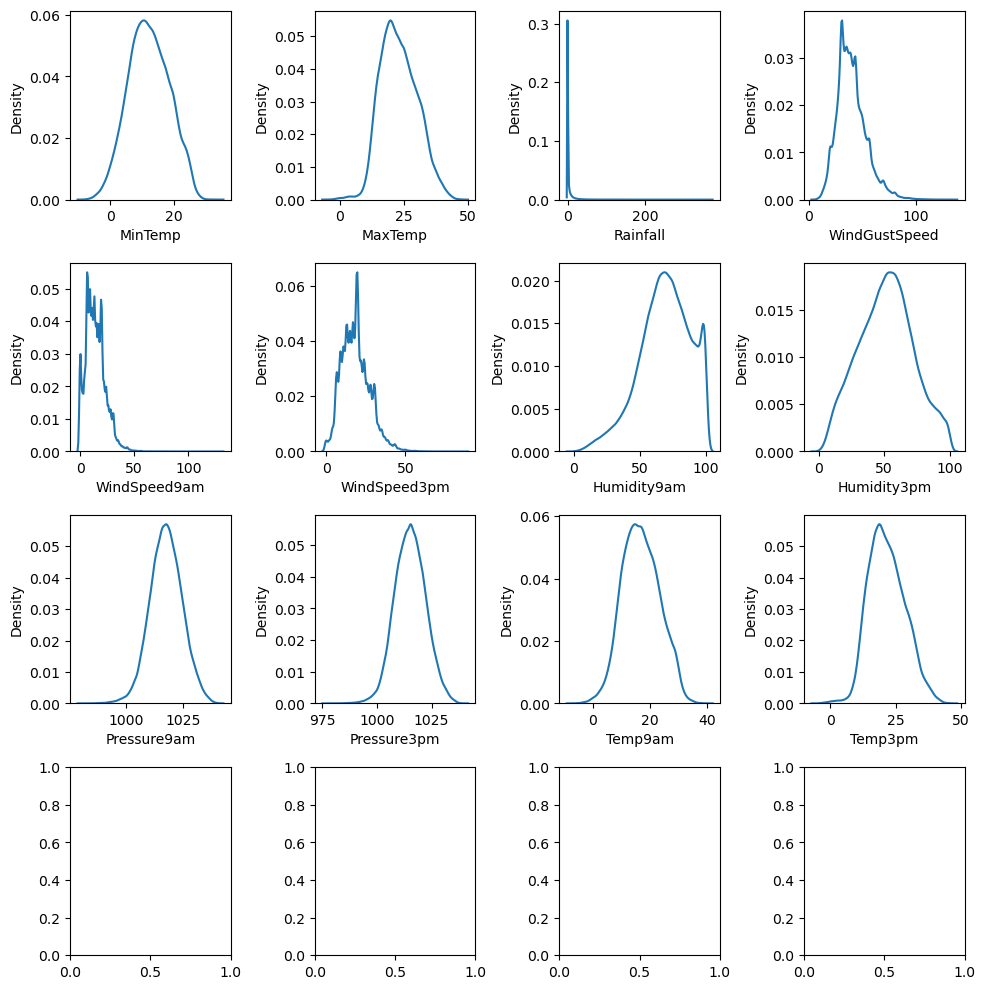

In [34]:
#Data spread
fig,ax = plt.subplots(4,4, figsize=(10,10))

for i,j in zip(num_col,ax.flatten()):
    sns.kdeplot(df[i],ax=j)
plt.tight_layout()
plt.show()

In [35]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'iso_week_number', 'Week', 'Month',
       'Year'],
      dtype='object')

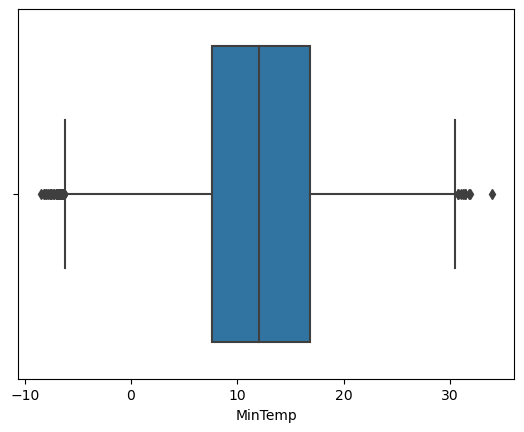

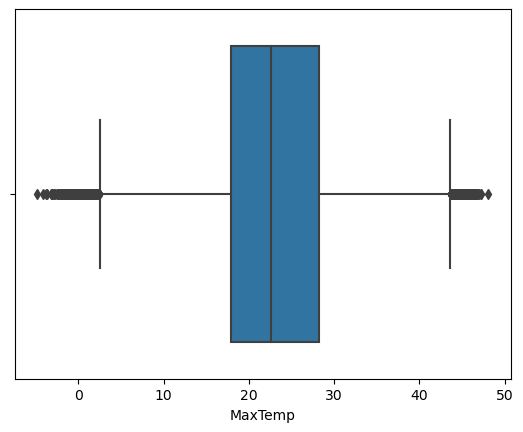

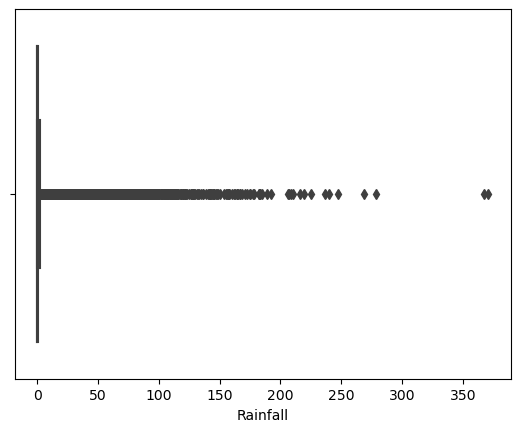

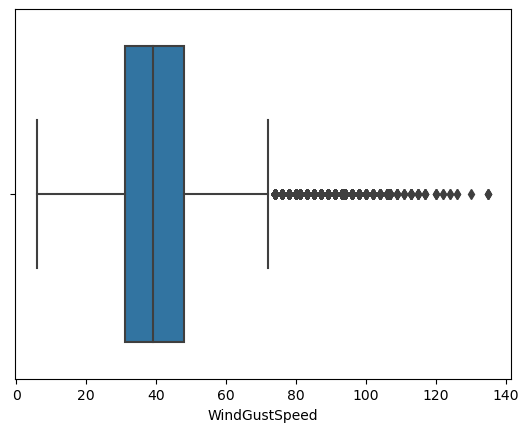

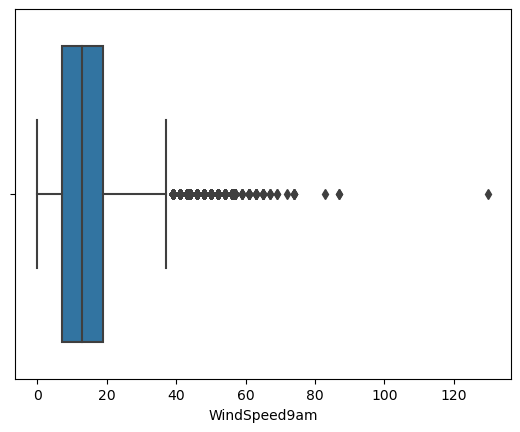

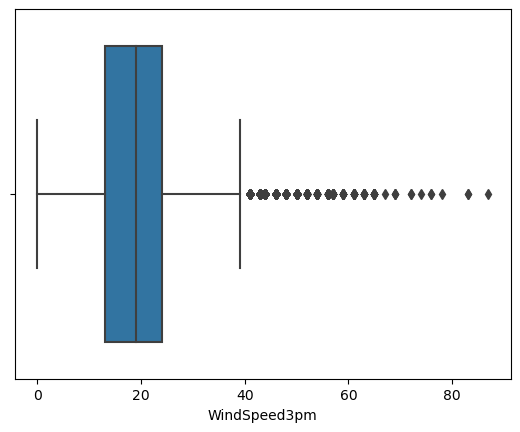

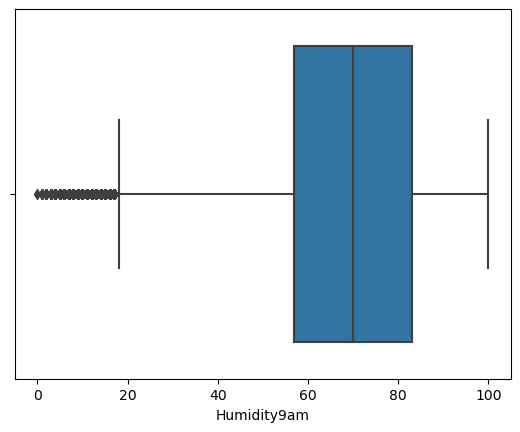

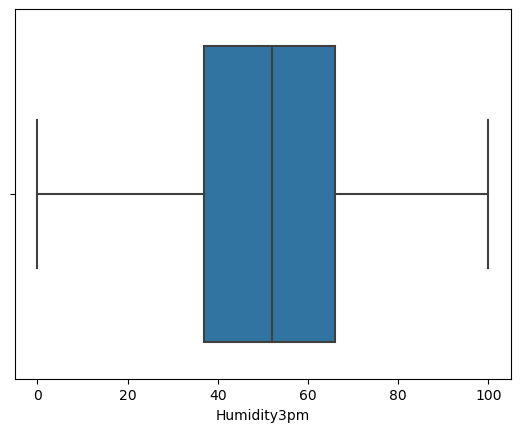

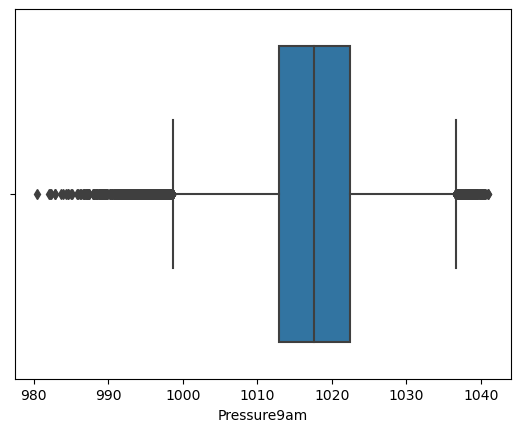

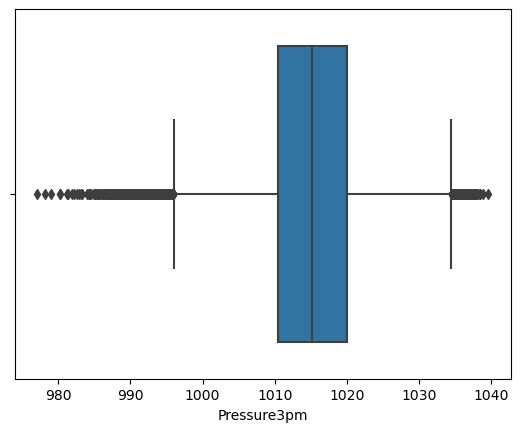

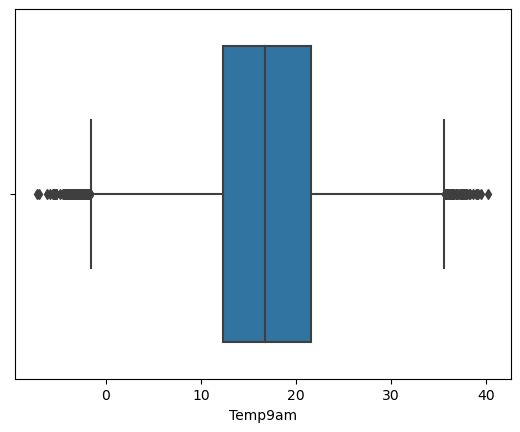

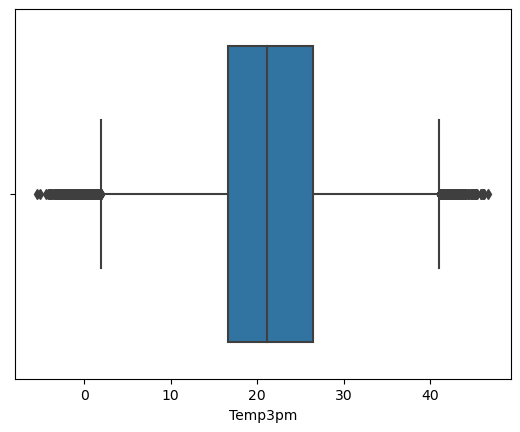

In [36]:
for i in num_col:
    sns.boxplot(x=i,data=df)
    plt.show()

In [37]:
num_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [38]:
a=['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [39]:
b=['Humidity3pm']

In [40]:
def fill_missing_with_median(series):
    return series.fillna(series.median())
for i in a:
    df[i] = df.groupby(['Location','Month'])[i].apply(fill_missing_with_median)

In [41]:
for i in a:
        df[i].fillna(df[i].mean(),inplace=True)

In [42]:
def fill_missing_with_mean(series):
    return series.fillna(series.mean())
for i in b:
    df[i] = df.groupby('Location')[i].apply(fill_missing_with_mean)

In [43]:
for i in b:
        df[i].fillna(df[i].mean(),inplace=True)

In [44]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
iso_week_number    0
Week               0
Month              0
Year               0
dtype: int64

## Analysis

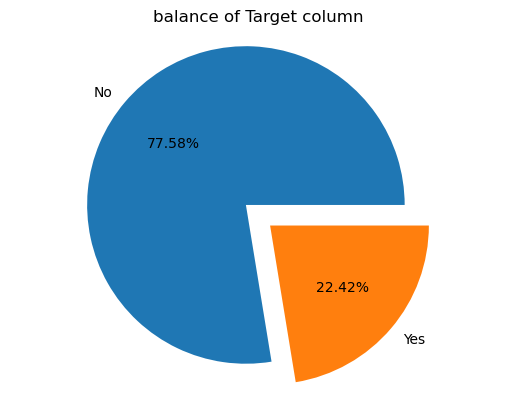

In [45]:
plt.pie(df.RainTomorrow.value_counts(), labels = df.RainTomorrow.value_counts().index, autopct="%2.2f%%", explode = [0,0.2])
plt.title("balance of Target column")
plt.axis("equal")
plt.show()

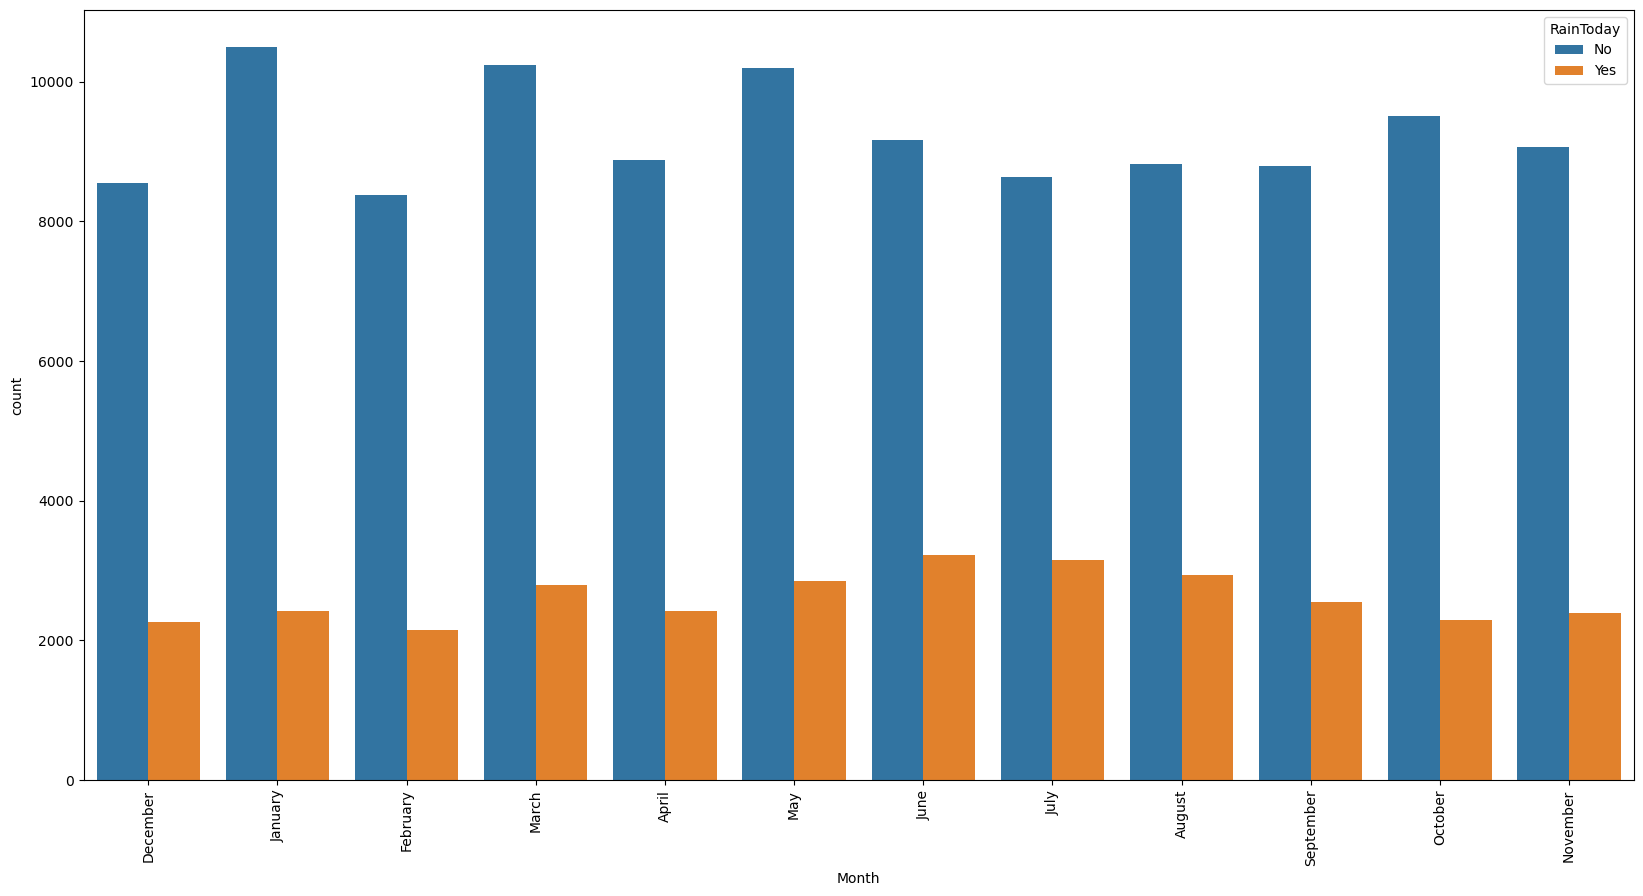

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x='Month',hue='RainToday',data=df)
plt.xticks(rotation=90)
plt.show()

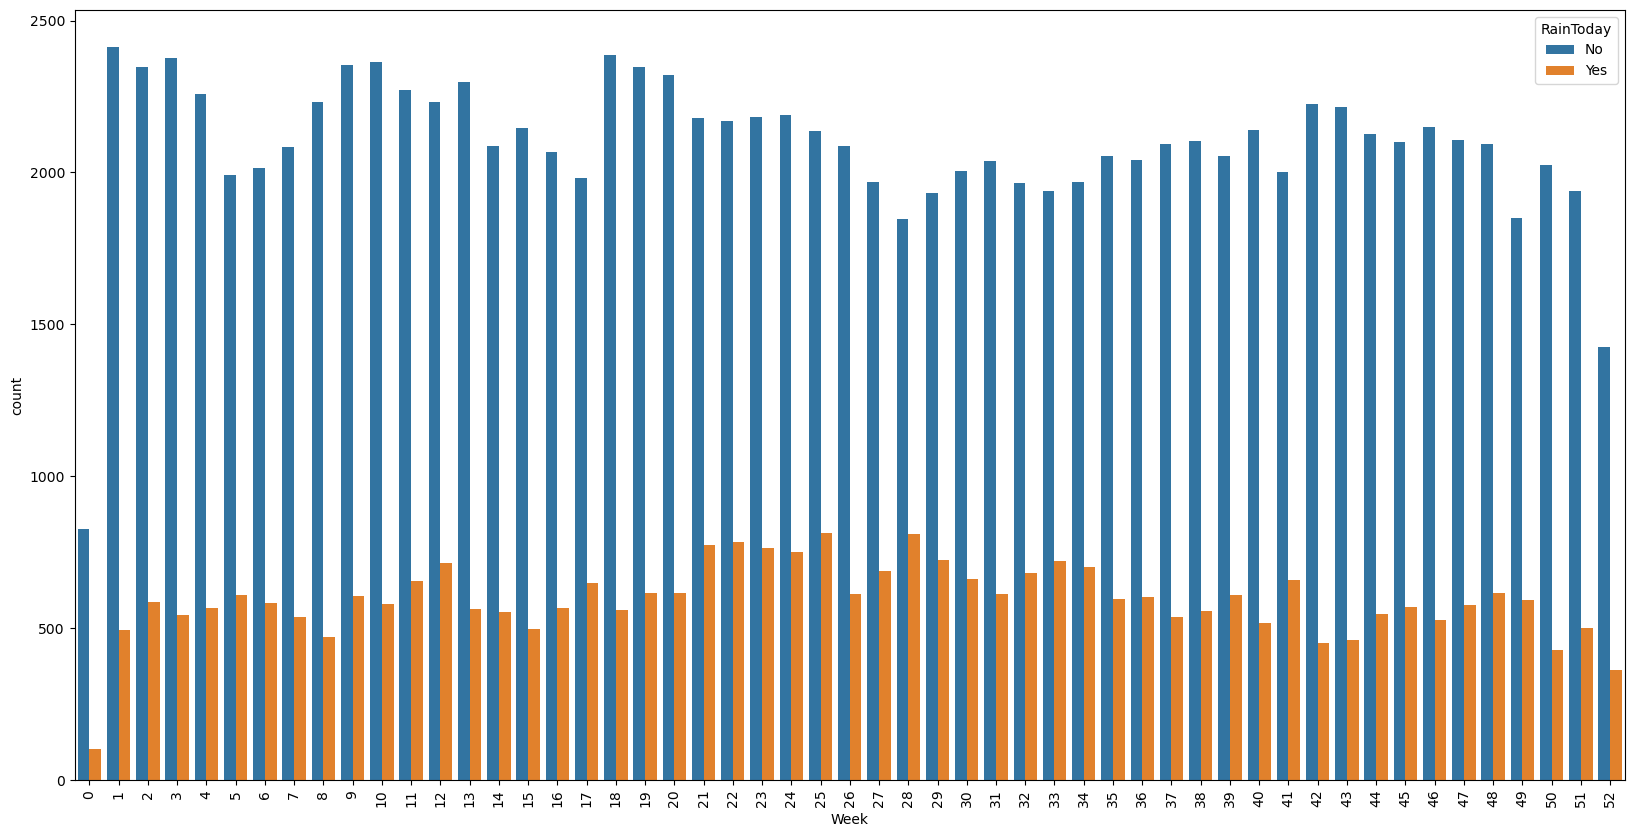

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(x='Week',hue='RainToday',data=df)
plt.xticks(rotation=90)
plt.show()

In [48]:
a=pd.DataFrame(df.groupby('Month')['Rainfall'].sum())
a= a.reset_index()

In [49]:
a.columns

Index(['Month', 'Rainfall'], dtype='object')

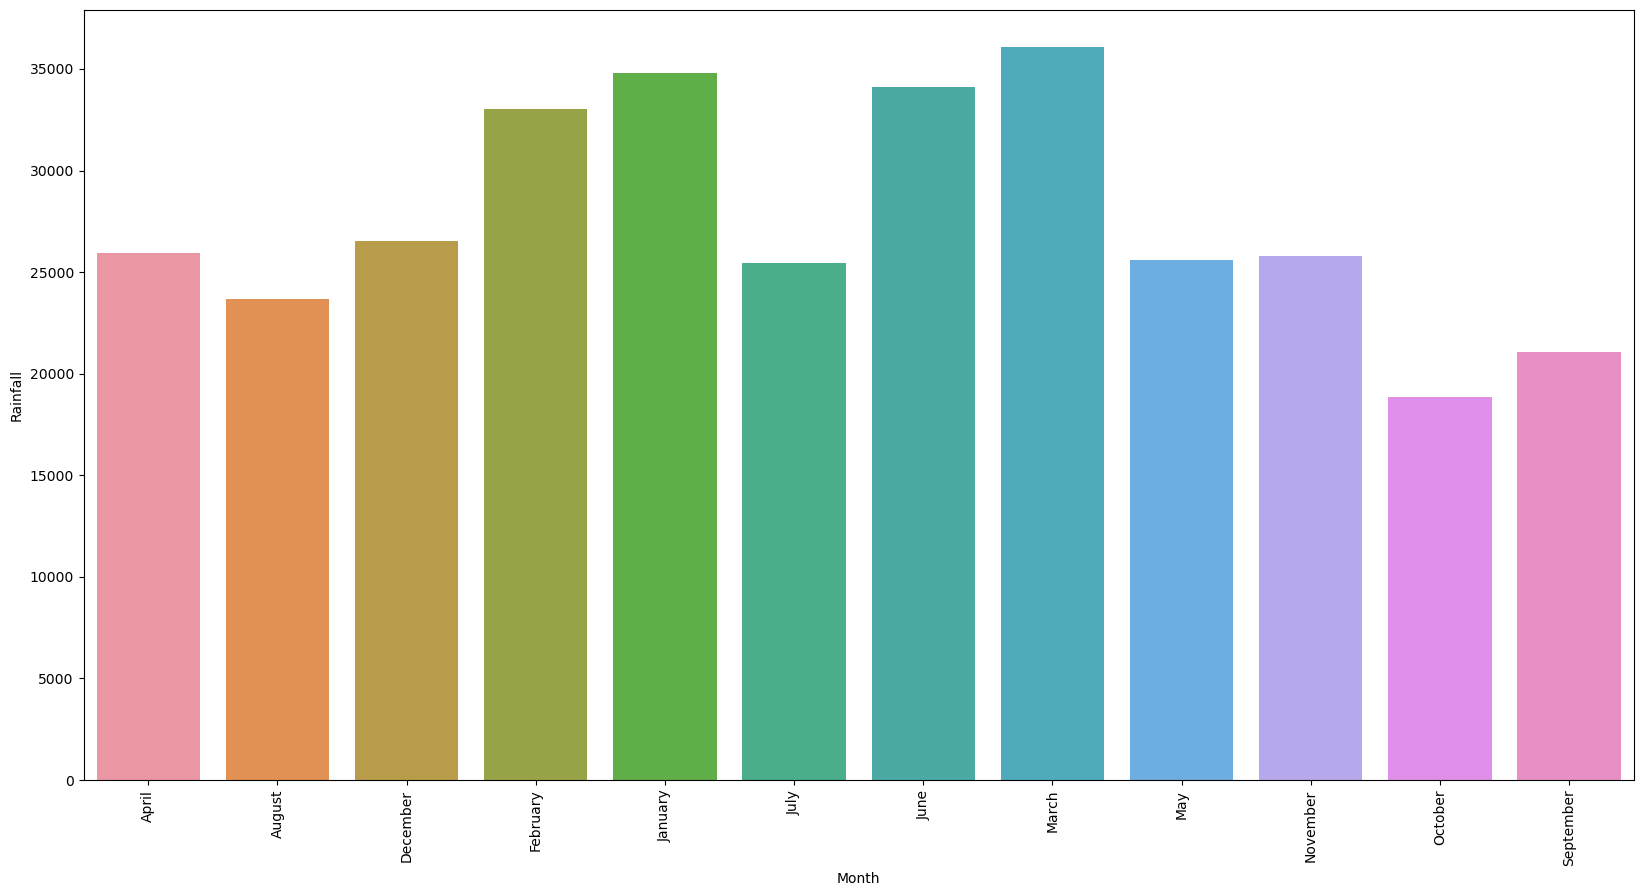

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x='Month',y='Rainfall',data=a)
plt.xticks(rotation=90)
plt.show()

In [51]:
b=pd.DataFrame(df.groupby('Week')['Rainfall'].sum())
b= b.reset_index()

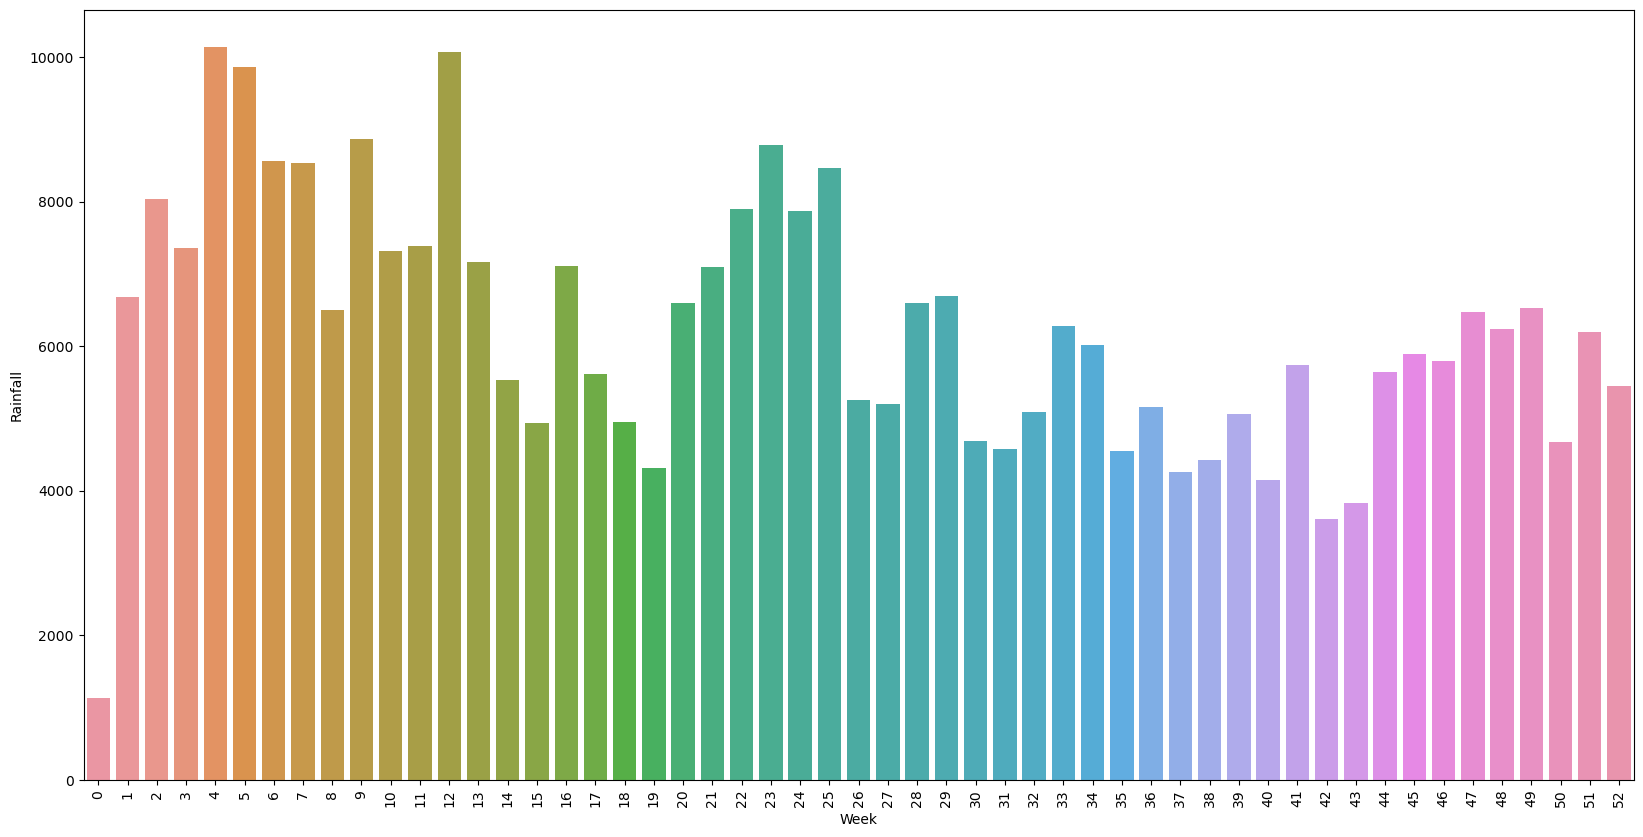

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='Week',y='Rainfall',data=b)
plt.xticks(rotation=90)
plt.show()

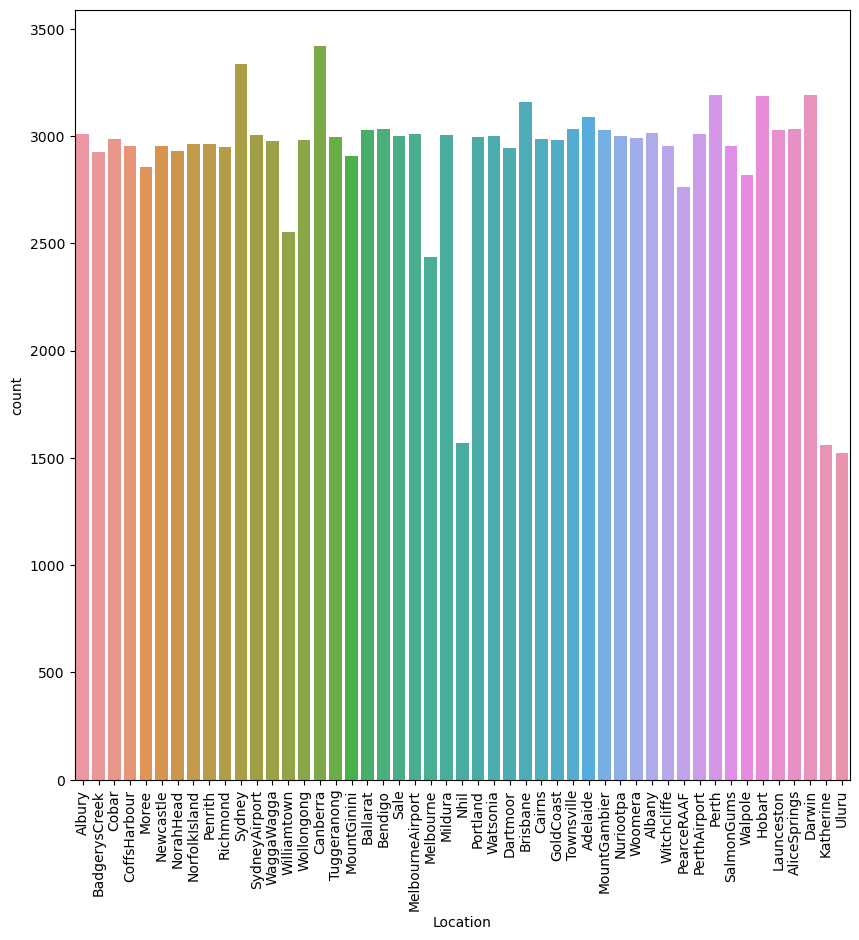

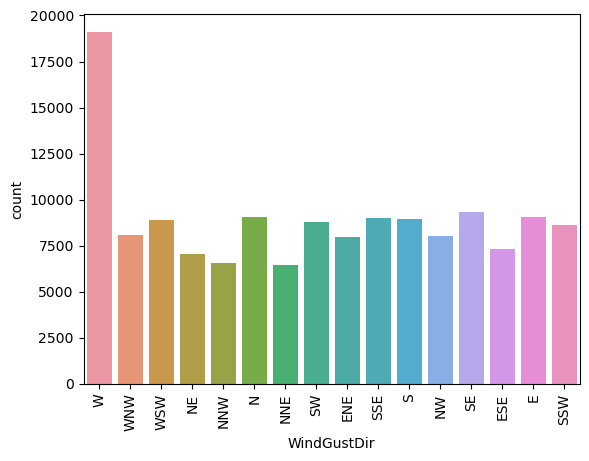

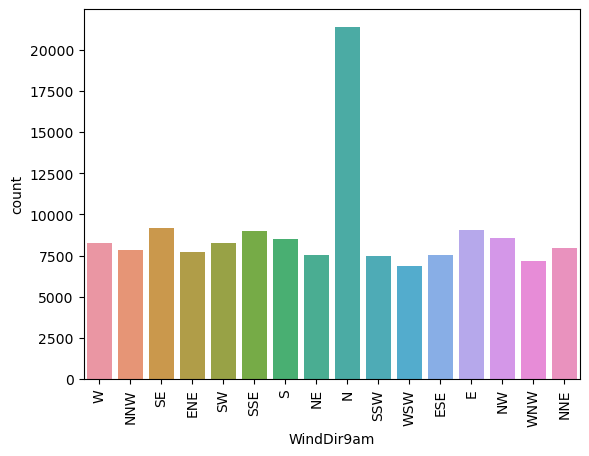

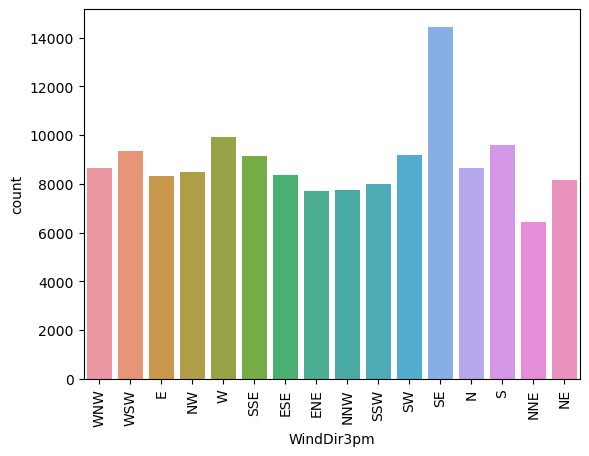

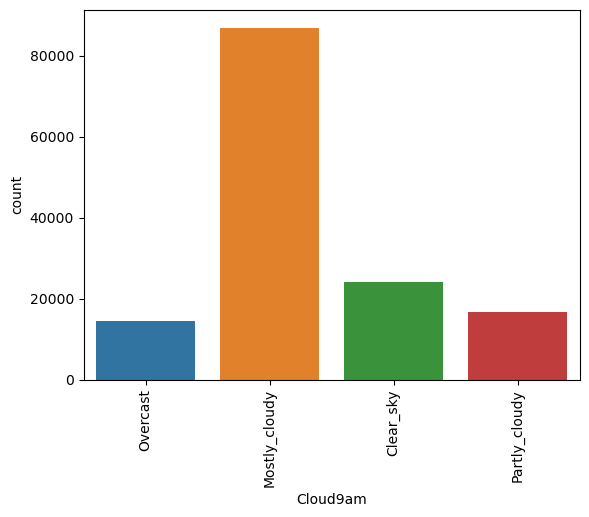

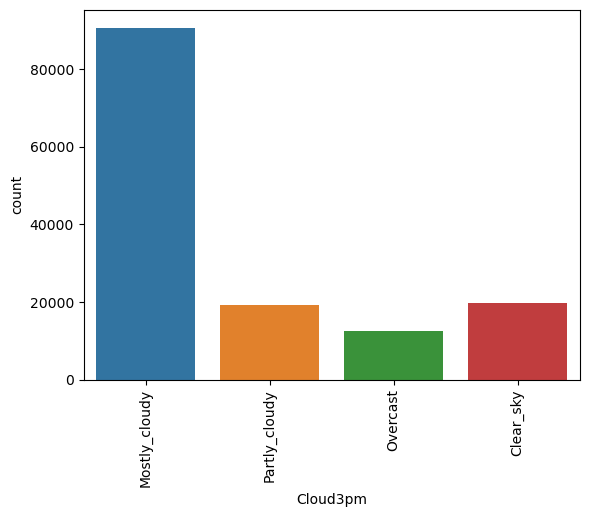

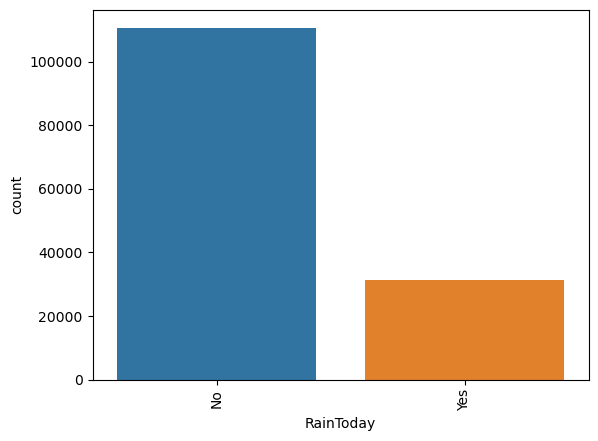

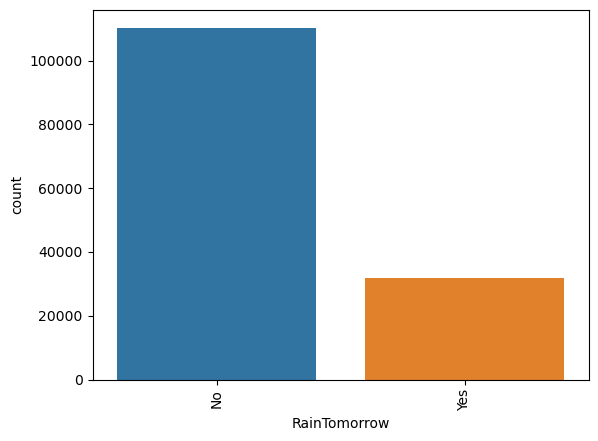

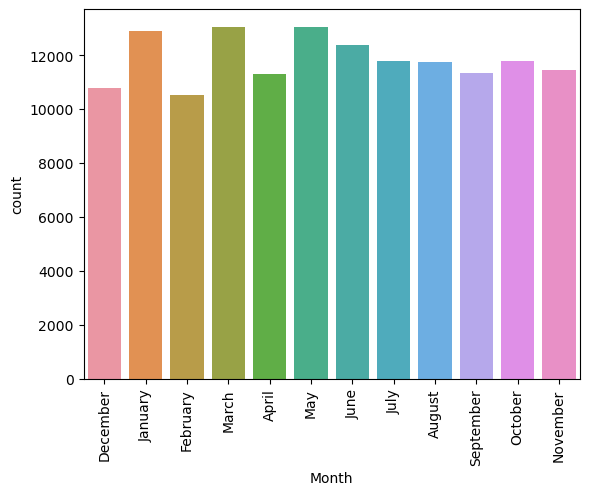

In [53]:
#Univariate cat
plt.figure(figsize=(10,10))
for i in cat:
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

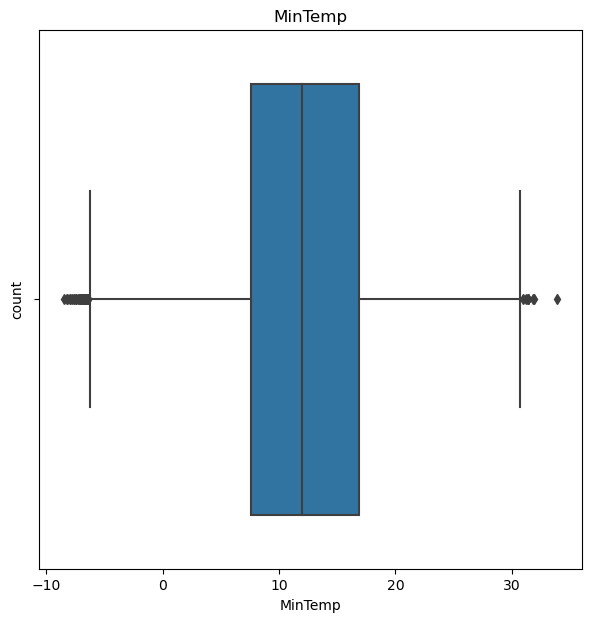

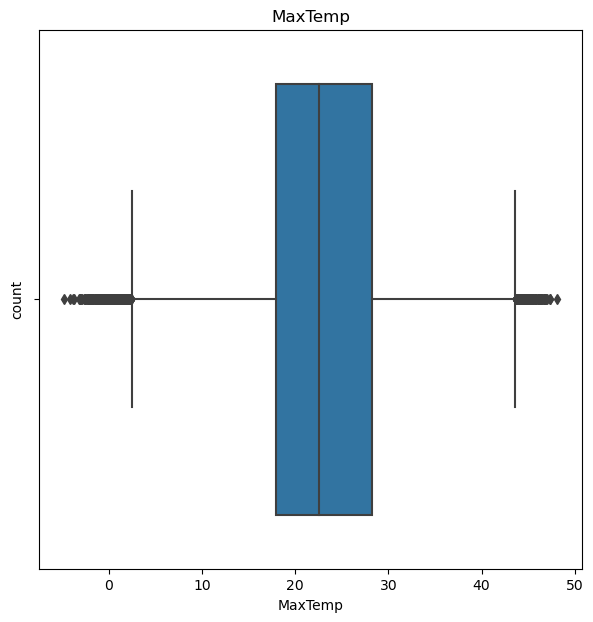

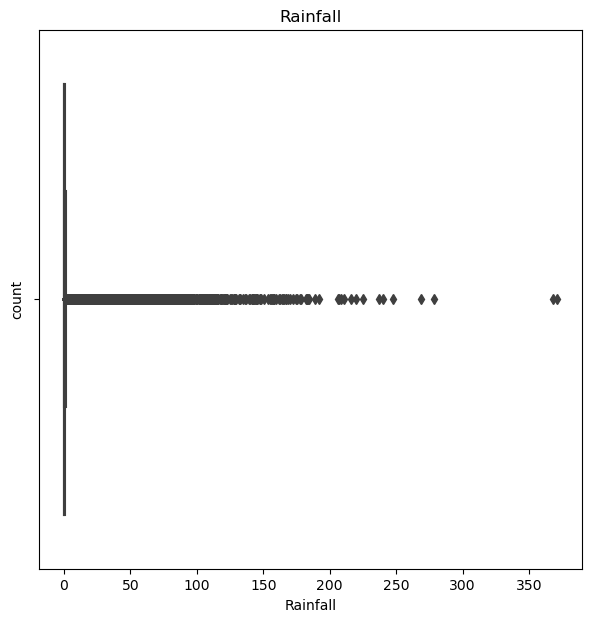

KeyError: 'Evaporation'

<Figure size 700x700 with 0 Axes>

In [54]:
#Univariate Num

for i in num:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title(i)
    plt.show()


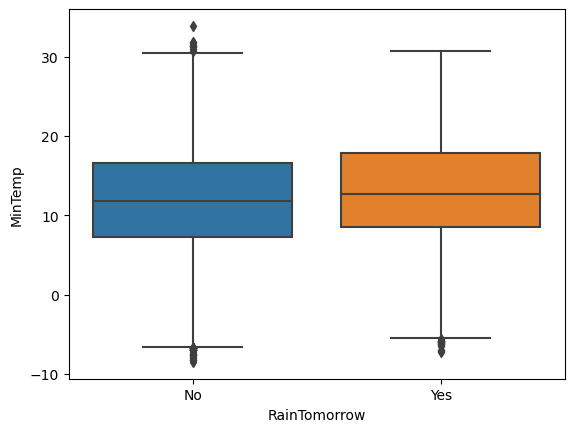

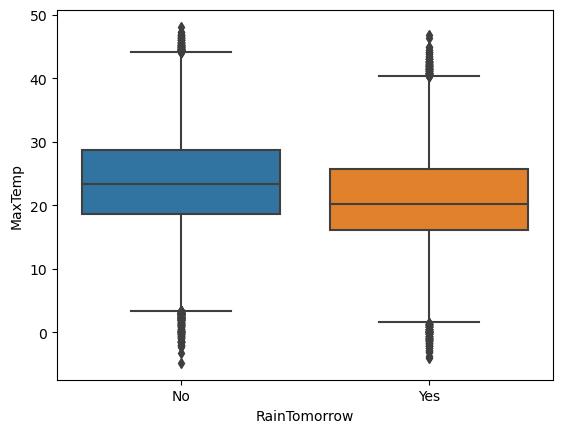

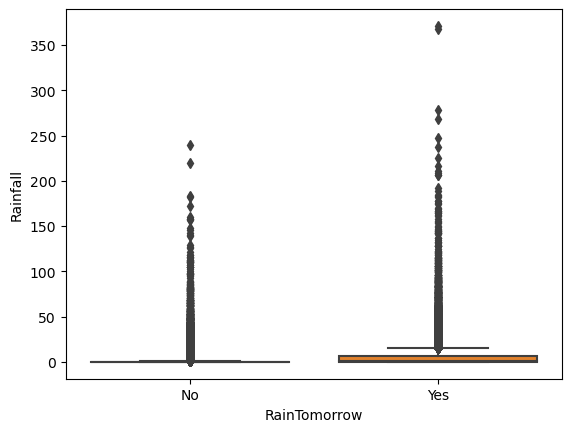

ValueError: Could not interpret input 'Evaporation'

In [55]:
#Num vs Cat

for i in num:
    sns.boxplot(x='RainTomorrow',y=i,data=df)
    plt.show()


<Figure size 1000x1000 with 0 Axes>

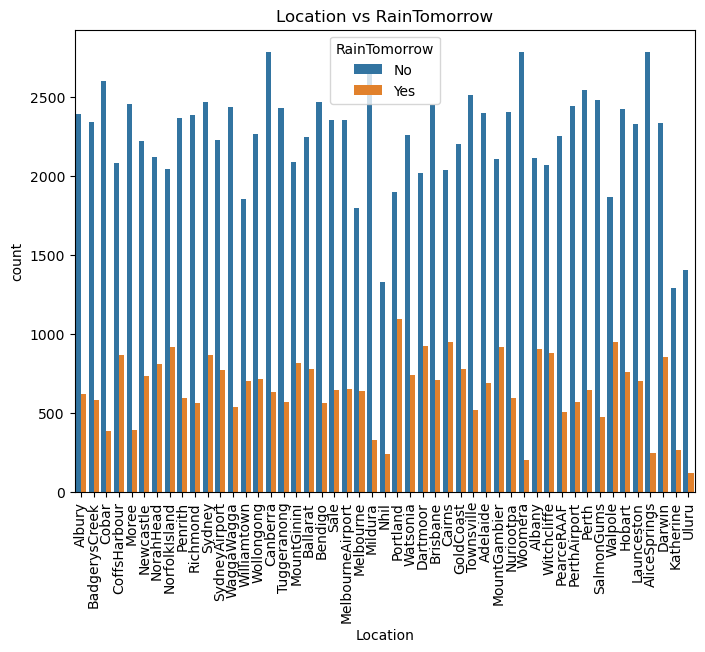

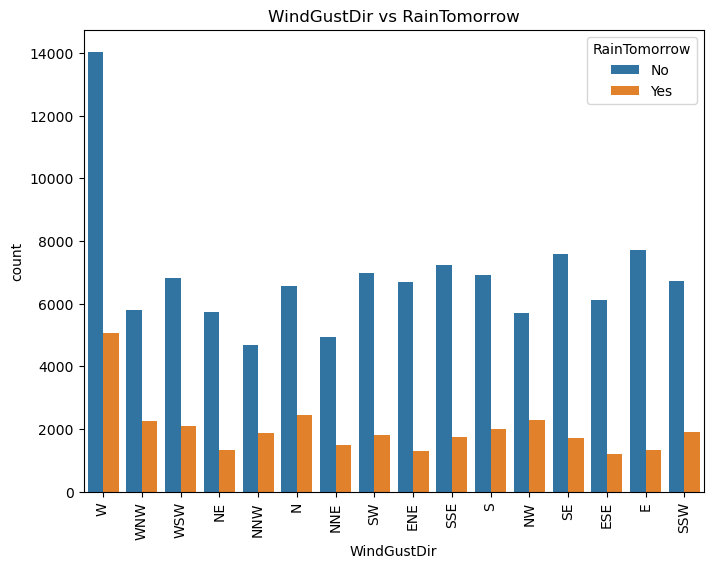

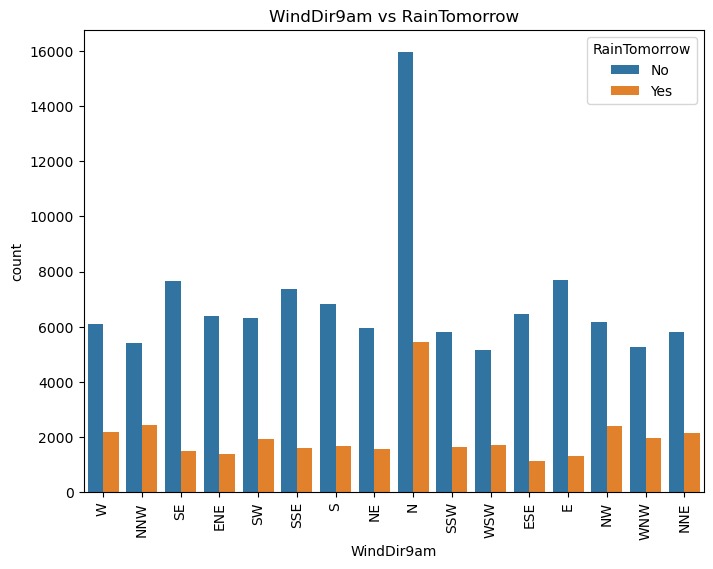

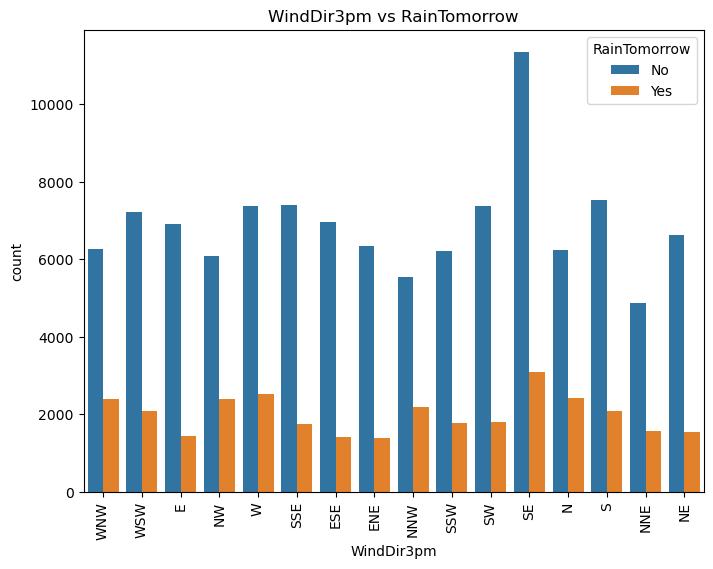

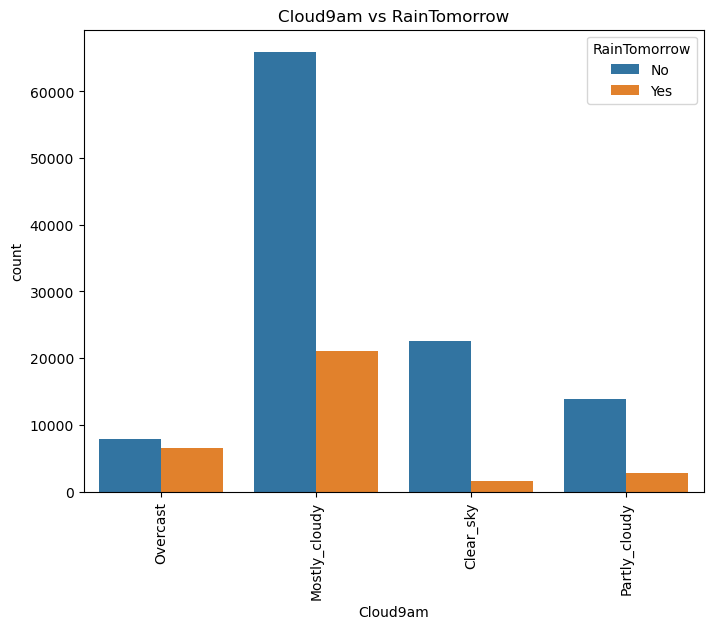

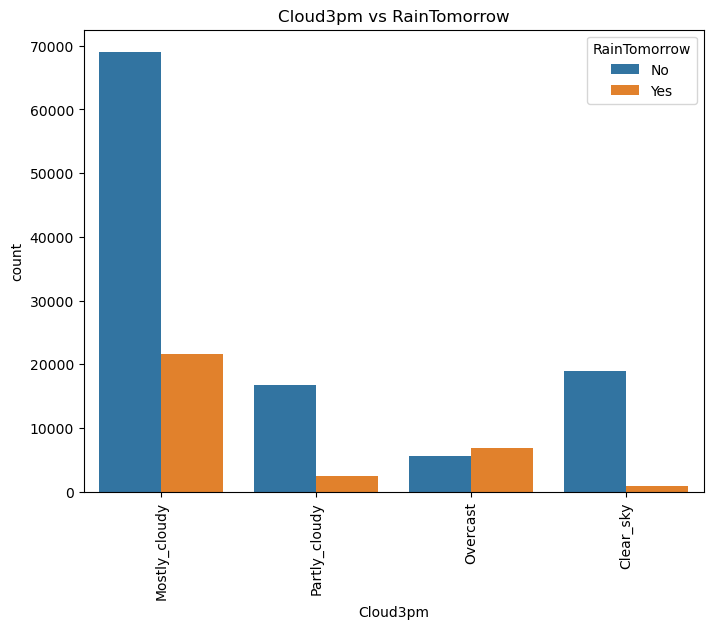

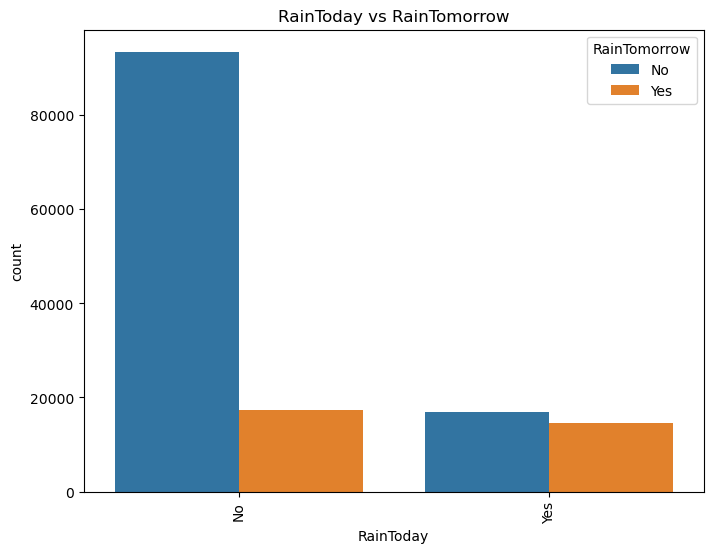

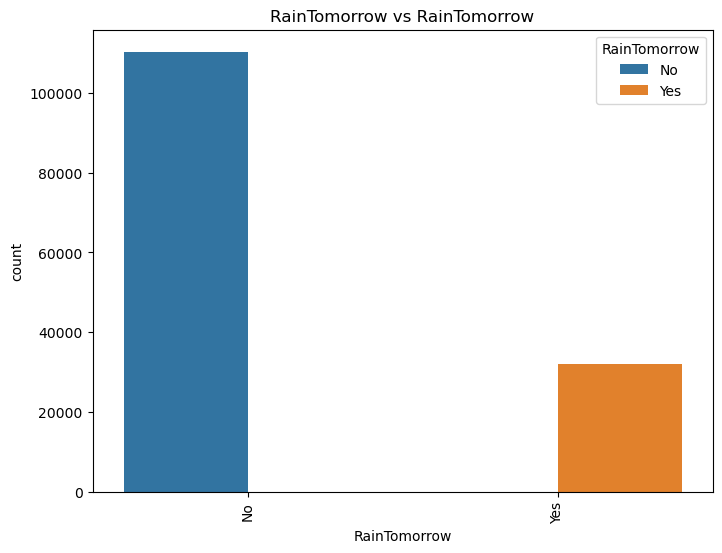

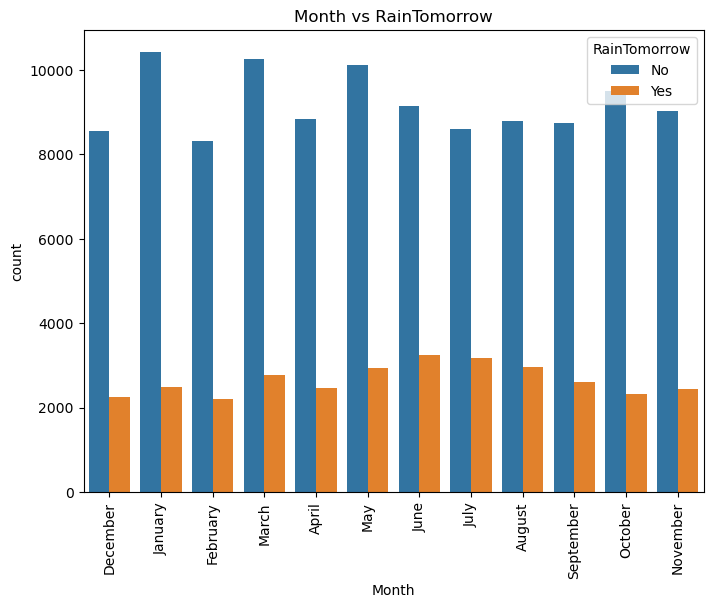

In [56]:
#Cat vs cat 

plt.figure(figsize=(10, 10))

for i in cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=i, hue='RainTomorrow', data=df)
    plt.title(f"{i} vs RainTomorrow")
    plt.xticks(rotation=90)
    plt.show()

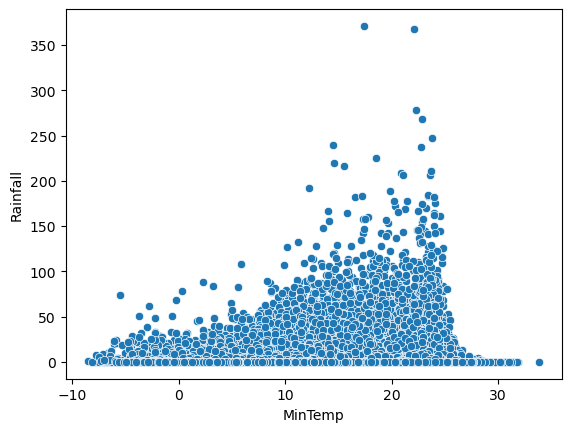

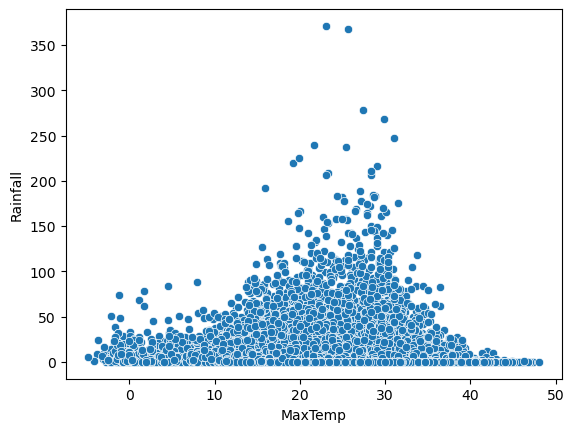

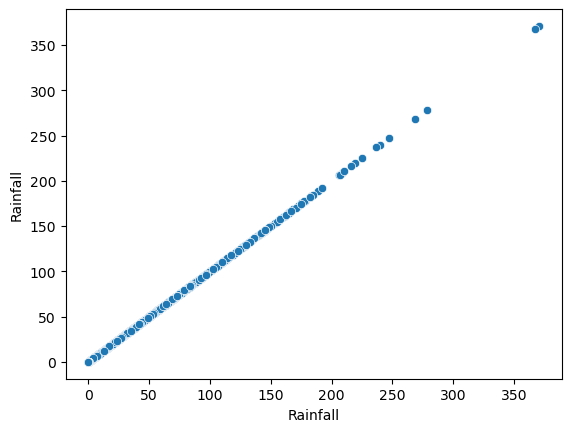

ValueError: Could not interpret value `Evaporation` for parameter `x`

In [57]:
for i in num:
    sns.scatterplot(x=i, y='Rainfall',data=df)
    plt.show()

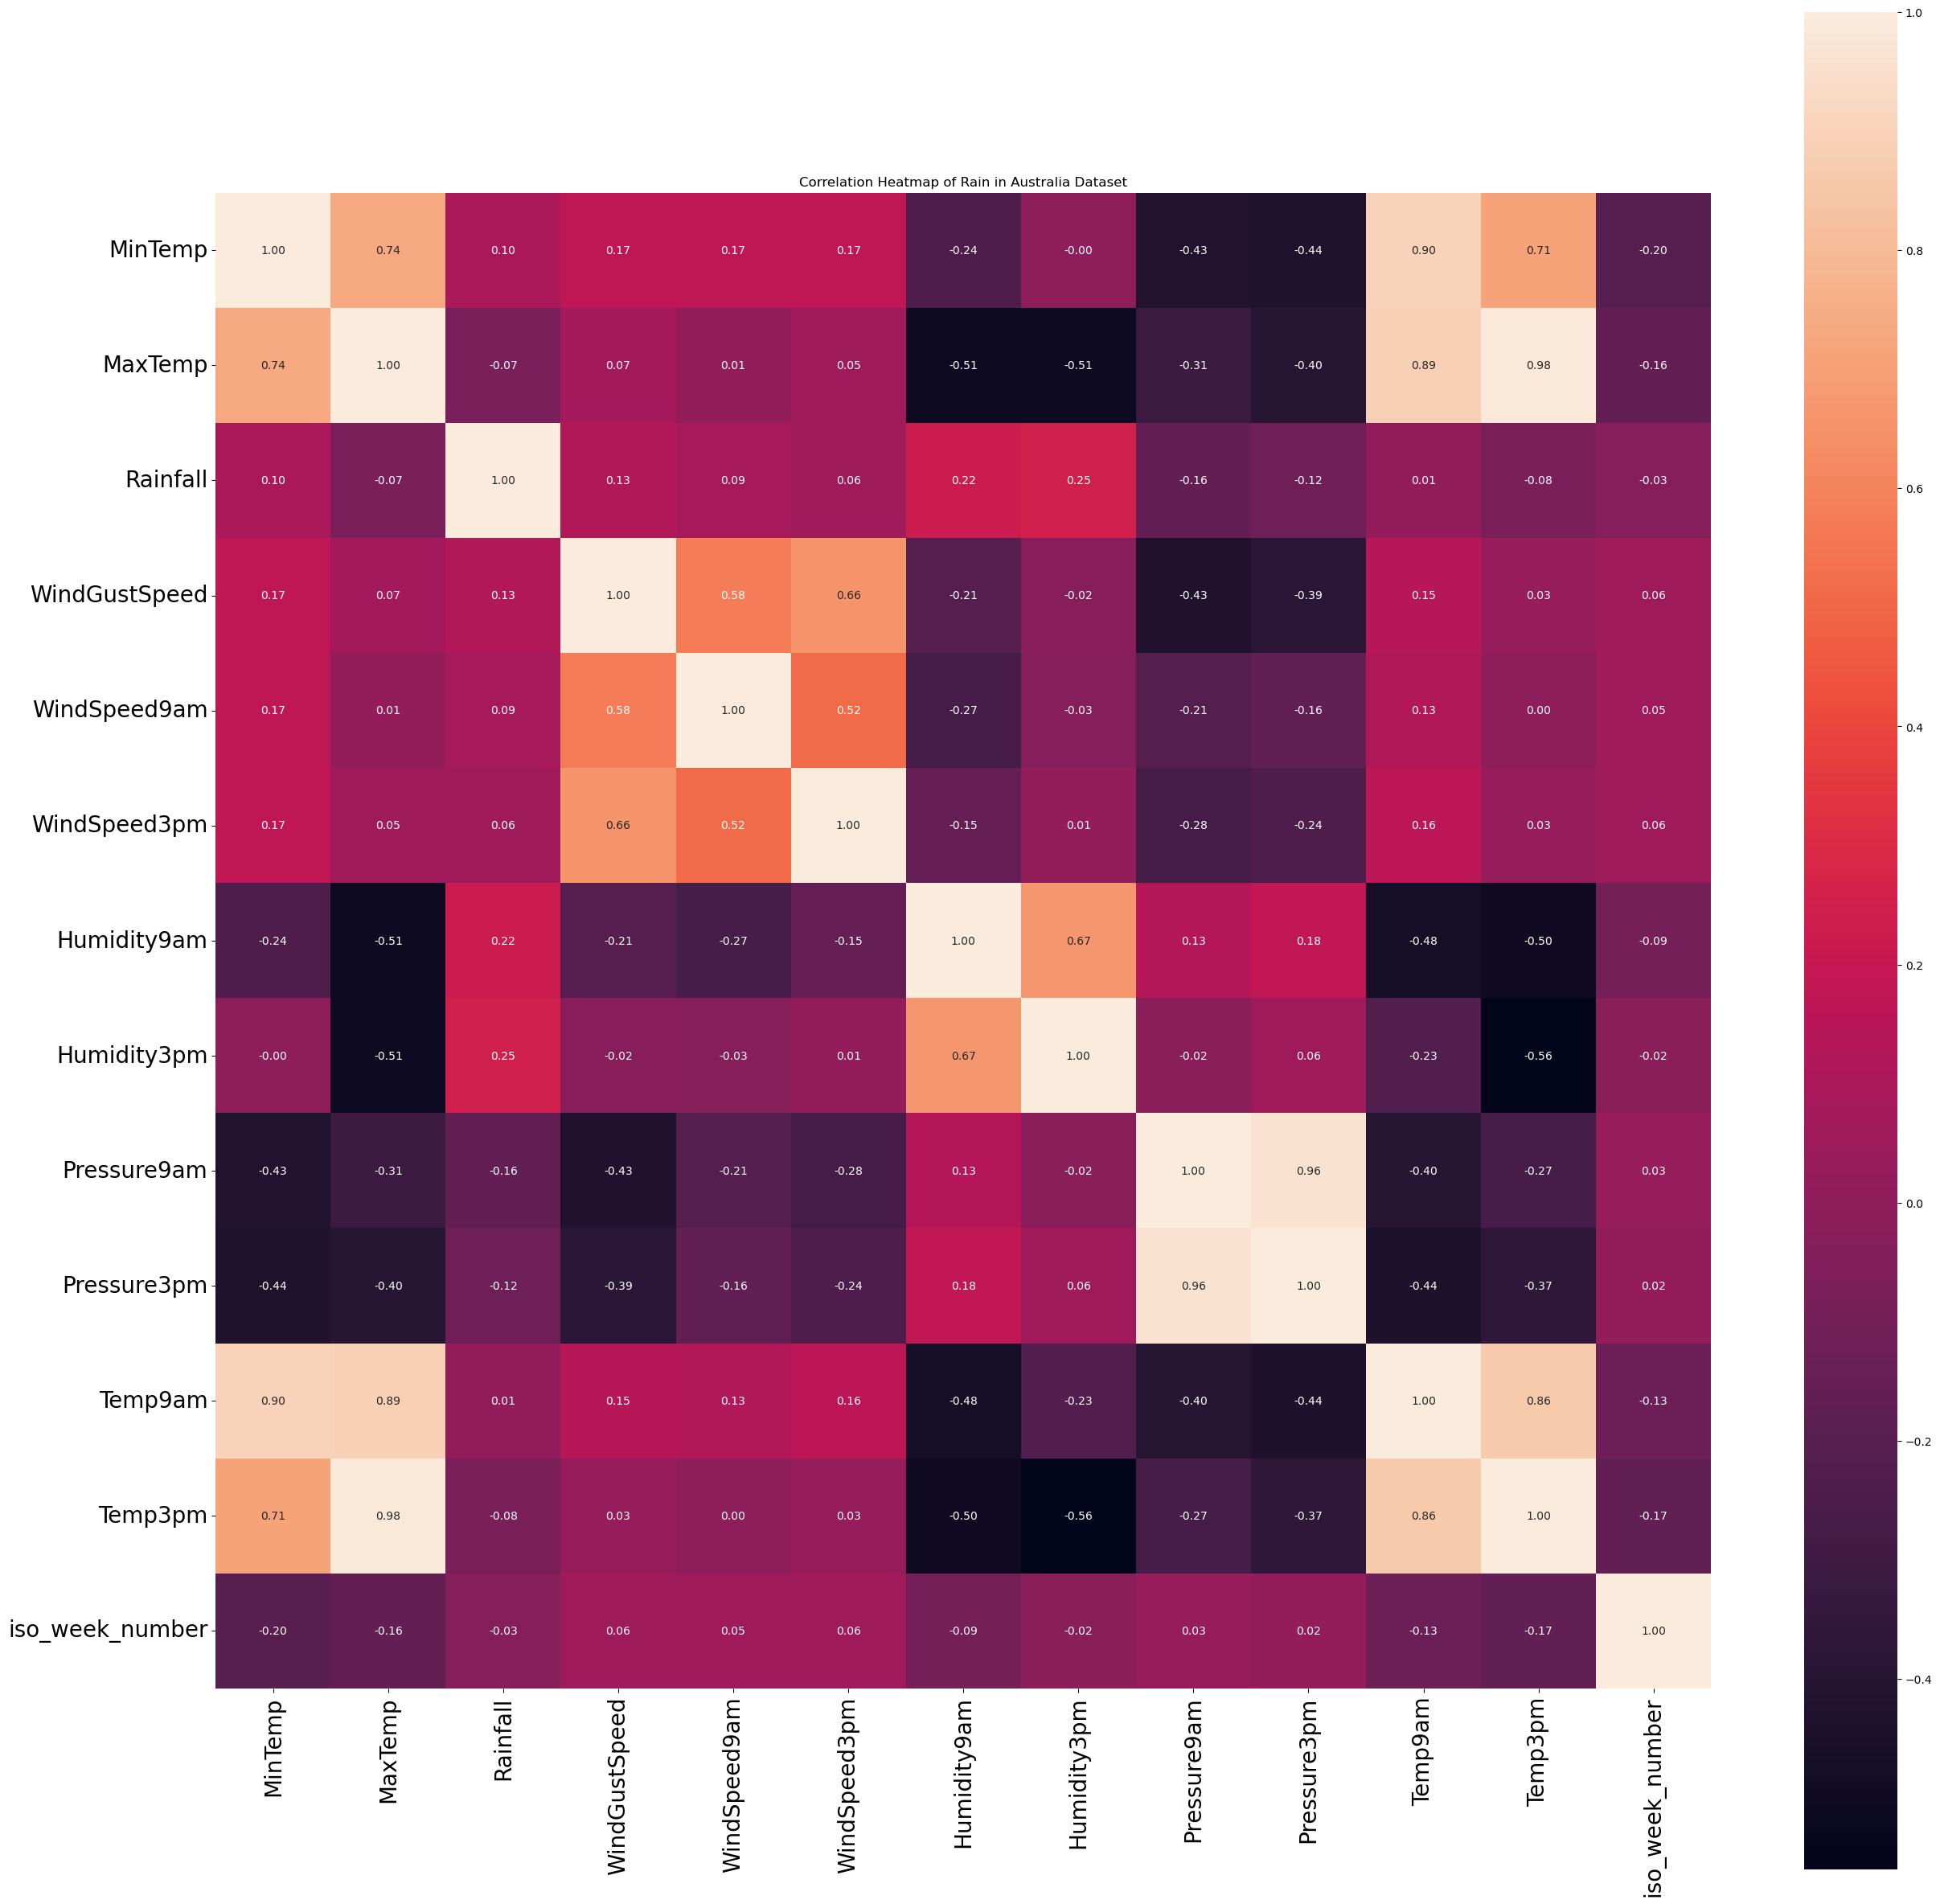

In [58]:
#Multivariate

plt.figure(figsize=(30,30))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
sns.heatmap(df.drop(['Week','Year'],1).corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

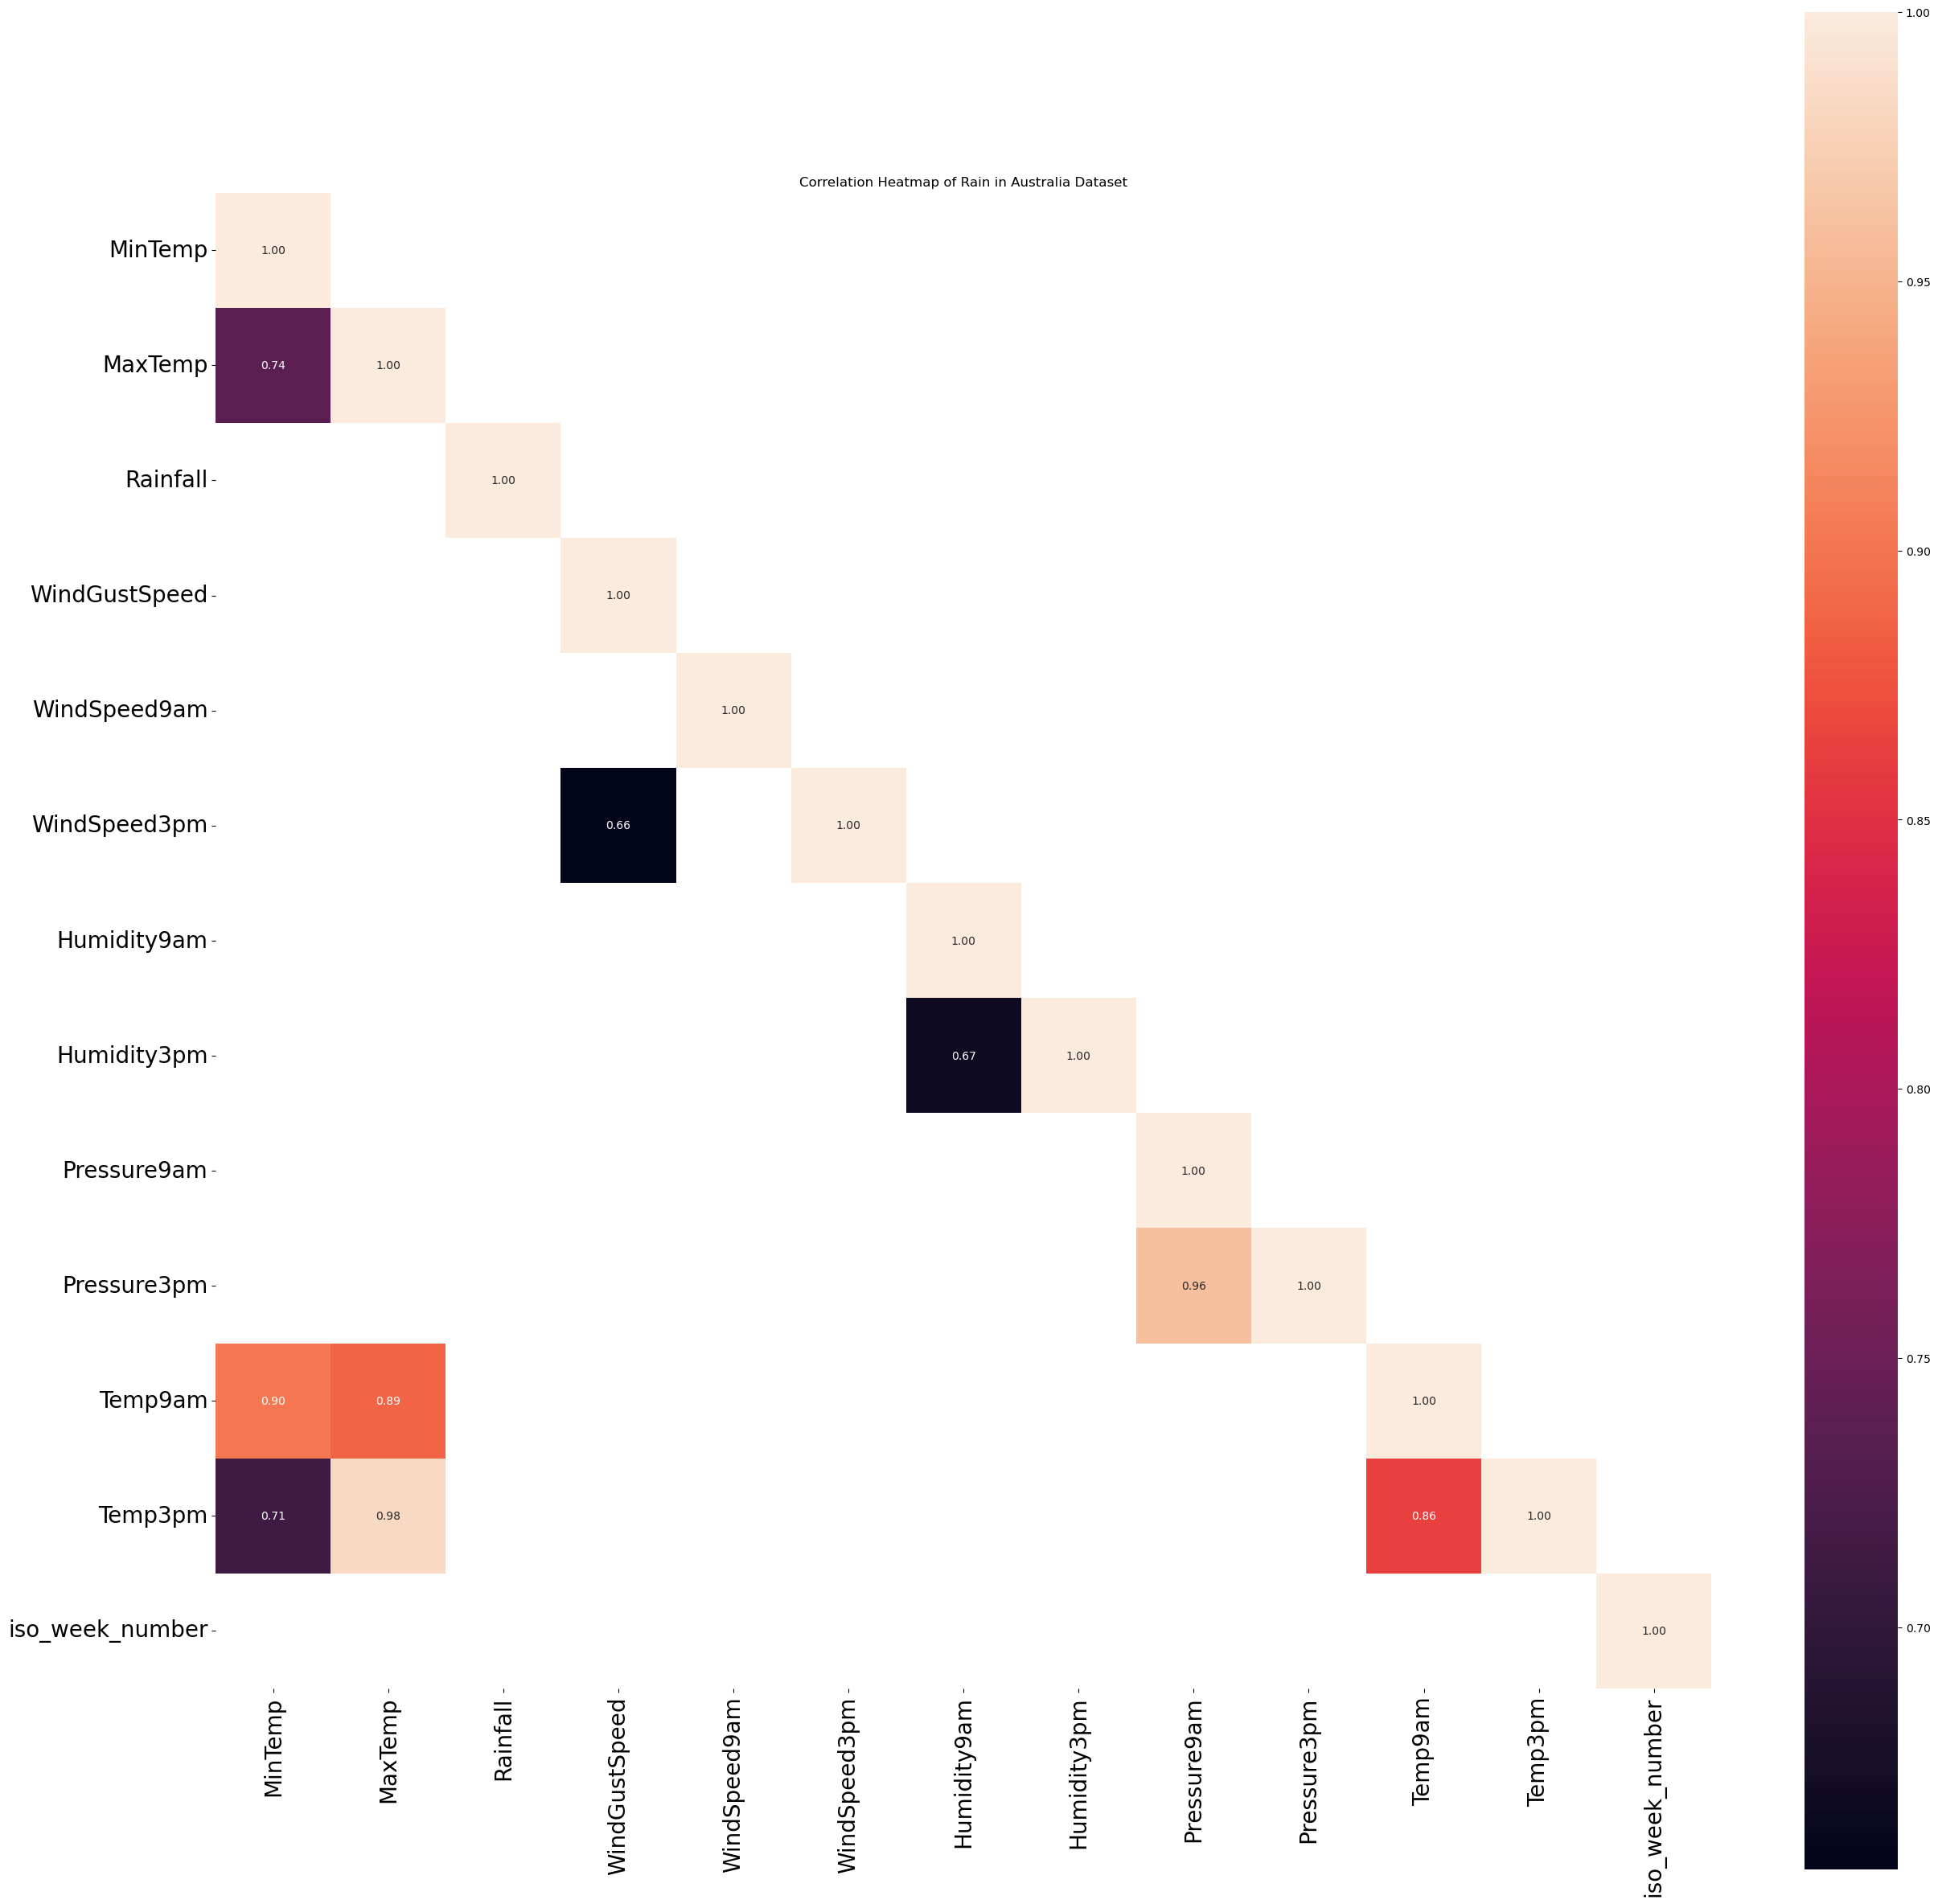

In [59]:
plt.figure(figsize=(30,30))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
sns.heatmap(df.drop(['Week','Year'],1).corr()[(df.corr()<=-0.6)|(df.corr()>=0.6)], square=True, annot=True, fmt='.2f', linecolor='white',mask=np.triu(df.drop(['Week','Year'],1).corr(),+1))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()


## Outliers

In [60]:
outliers_rows = pd.DataFrame()
for i in num_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))
    outliers_rows = pd.concat([outliers_rows, df[outliers]])

In [61]:
 outliers_rows

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,iso_week_number,Week,Month,Year
46848,2011-05-15,Canberra,-6.9,14.0,0.0,NNW,30.0,NNW,NNW,6.0,...,Clear_sky,Mostly_cloudy,1.7,13.1,No,No,19,20,May,2011
46849,2011-05-16,Canberra,-6.5,11.1,0.0,N,15.0,N,SSW,0.0,...,Overcast,Clear_sky,0.8,9.5,No,No,20,20,May,2011
46923,2011-07-29,Canberra,-8.0,15.1,0.2,W,35.0,NNW,NW,6.0,...,Clear_sky,Mostly_cloudy,-1.2,14.5,No,No,30,30,July,2011
46924,2011-07-30,Canberra,-6.7,15.7,0.0,NW,37.0,N,NW,2.0,...,Partly_cloudy,Clear_sky,0.5,15.1,No,No,30,30,July,2011
47293,2012-08-02,Canberra,-6.6,12.5,0.0,NNW,31.0,N,N,0.0,...,Clear_sky,Mostly_cloudy,1.1,10.3,No,No,31,31,August,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144572,2015-01-20,Uluru,28.6,43.7,0.0,WSW,48.0,WSW,SSW,31.0,...,Mostly_cloudy,Mostly_cloudy,36.4,42.2,No,No,4,3,January,2015
144593,2015-02-10,Uluru,22.1,42.7,0.0,E,65.0,E,ENE,13.0,...,Mostly_cloudy,Partly_cloudy,33.7,41.7,No,No,7,6,February,2015
144614,2015-03-03,Uluru,26.9,42.5,0.0,E,56.0,ESE,ENE,20.0,...,Mostly_cloudy,Mostly_cloudy,32.7,41.8,No,No,10,9,March,2015
144858,2015-11-02,Uluru,26.4,43.7,0.0,WNW,69.0,NE,NW,30.0,...,Mostly_cloudy,Mostly_cloudy,32.7,41.4,No,No,45,44,November,2015


In [62]:
outliers_rows.duplicated().sum()

9435

In [63]:
# we have outliers in 88234 number of rows

In [64]:
df.skew()

MinTemp            0.022685
MaxTemp            0.224974
Rainfall           9.934304
WindGustSpeed      0.903597
WindSpeed9am       0.777673
WindSpeed3pm       0.633373
Humidity9am       -0.488476
Humidity3pm        0.022378
Pressure9am       -0.100749
Pressure3pm       -0.048413
Temp9am            0.086303
Temp3pm            0.237165
iso_week_number    0.039492
Week               0.037622
Year              -0.042629
dtype: float64

In [65]:
dff=df.copy()

## Outliers treatment using power transform

In [66]:
skewed_var = ['Rainfall','WindGustSpeed','WindSpeed3pm','WindSpeed9am']

In [67]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson',standardize=True)


In [68]:
for i in skewed_var:
    dff[i] = pt.fit_transform(dff[[i]])

In [69]:
dff.skew()

MinTemp            0.022685
MaxTemp            0.224974
Rainfall           1.013534
WindGustSpeed      0.012817
WindSpeed9am      -0.058119
WindSpeed3pm       0.015668
Humidity9am       -0.488476
Humidity3pm        0.022378
Pressure9am       -0.100749
Pressure3pm       -0.048413
Temp9am            0.086303
Temp3pm            0.237165
iso_week_number    0.039492
Week               0.037622
Year              -0.042629
dtype: float64

<Axes: xlabel='Rainfall'>

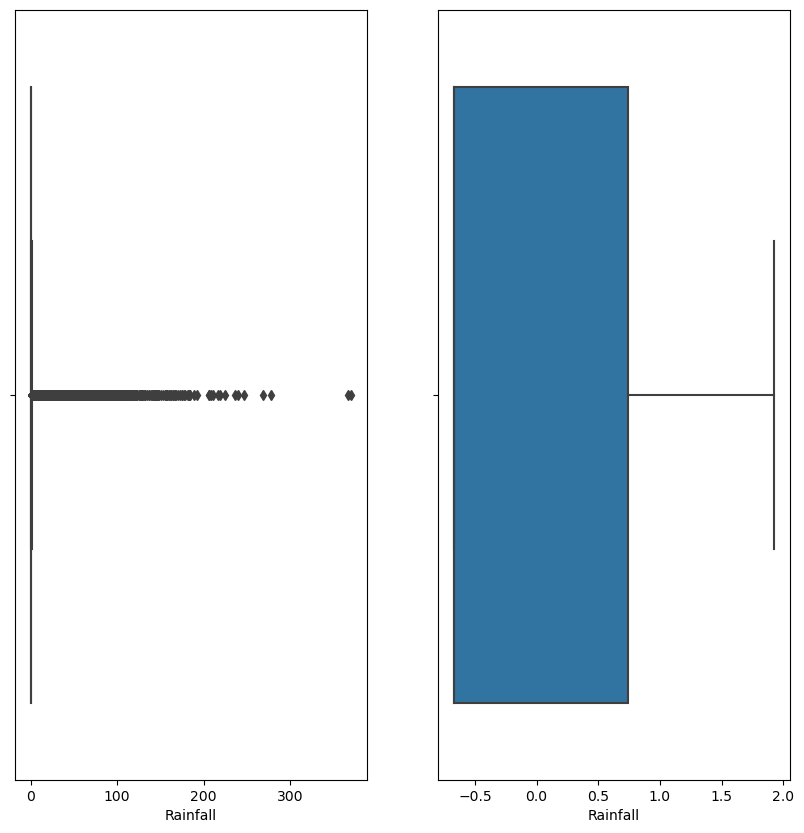

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x=df['Rainfall'],data=df)

plt.subplot(1,2,2)
sns.boxplot(x=dff['Rainfall'],data=dff)

<Axes: xlabel='WindGustSpeed'>

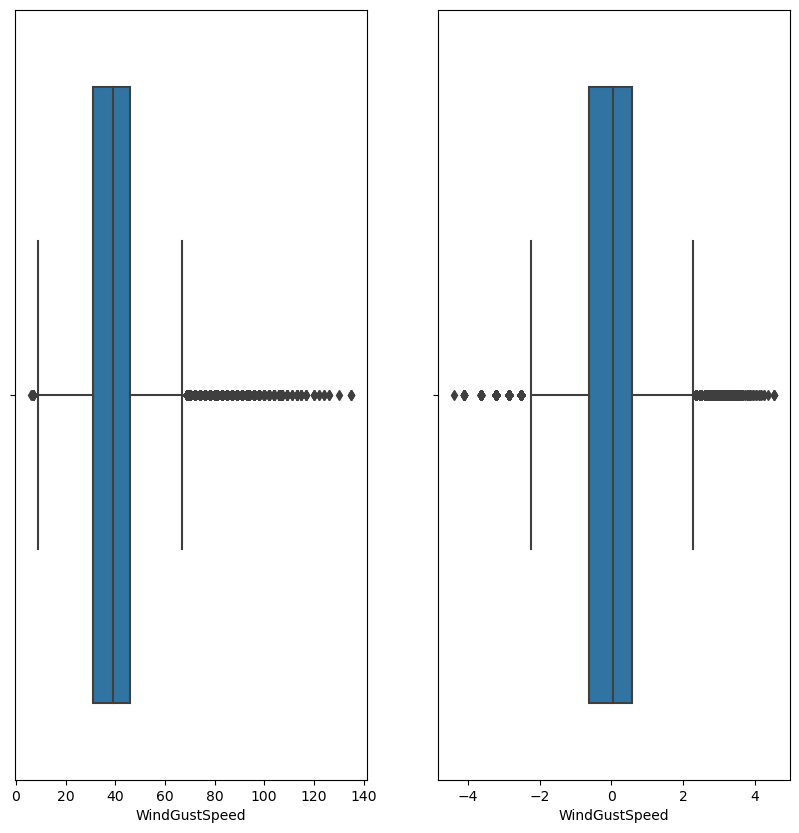

In [71]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x=df['WindGustSpeed'],data=df)

plt.subplot(1,2,2)
sns.boxplot(x=dff['WindGustSpeed'],data=dff)

<Axes: xlabel='WindSpeed9am'>

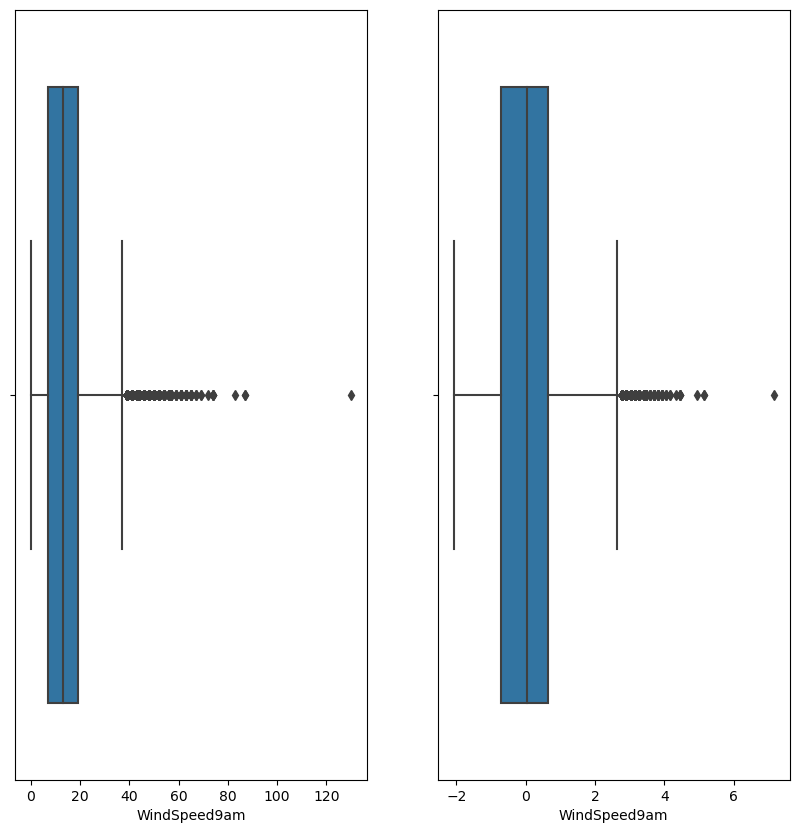

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x=df['WindSpeed9am'],data=df)

plt.subplot(1,2,2)
sns.boxplot(x=dff['WindSpeed9am'],data=dff)

<Axes: xlabel='WindSpeed3pm'>

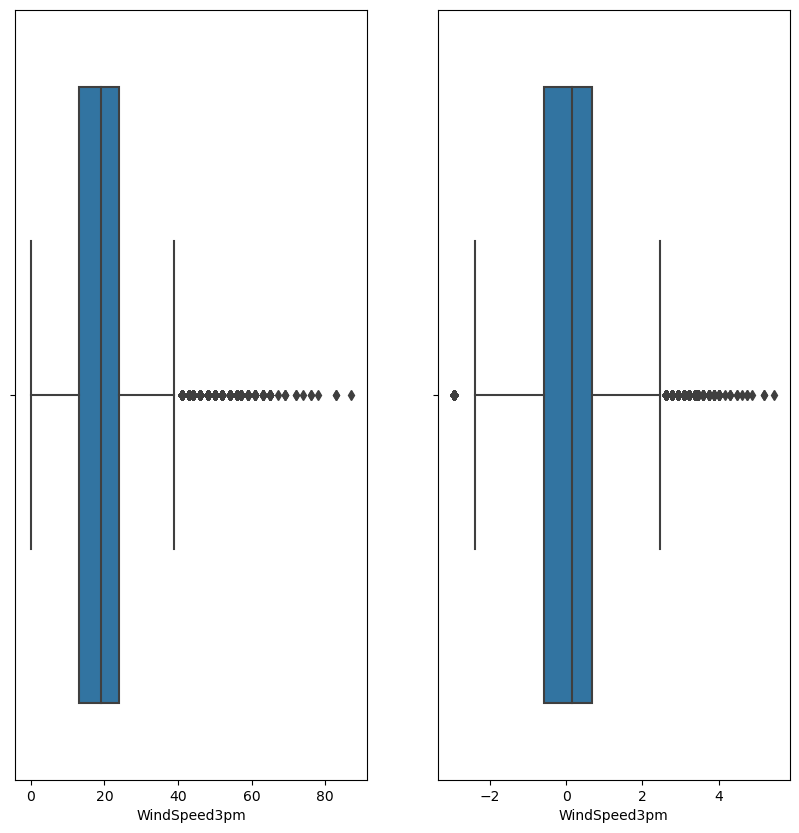

In [73]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x=df['WindSpeed3pm'],data=df)

plt.subplot(1,2,2)
sns.boxplot(x=dff['WindSpeed3pm'],data=dff)

In [74]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             142193 non-null  datetime64[ns]
 1   Location         142193 non-null  object        
 2   MinTemp          142193 non-null  float64       
 3   MaxTemp          142193 non-null  float64       
 4   Rainfall         142193 non-null  float64       
 5   WindGustDir      142193 non-null  object        
 6   WindGustSpeed    142193 non-null  float64       
 7   WindDir9am       142193 non-null  object        
 8   WindDir3pm       142193 non-null  object        
 9   WindSpeed9am     142193 non-null  float64       
 10  WindSpeed3pm     142193 non-null  float64       
 11  Humidity9am      142193 non-null  float64       
 12  Humidity3pm      142193 non-null  float64       
 13  Pressure9am      142193 non-null  float64       
 14  Pressure3pm      142

In [75]:
# Feature Engineering

Terrain = {'Albury' : 'Eastern Highlands',
'BadgerysCreek': 'Western Plateau',
'Cobar': 'Western Plateau',
'CoffsHarbour': 'Coastal Plains',
'Moree': 'Central Lowlands',
'Newcastle': 'Coastal Plains',
'NorahHead': 'Coastal Plains',
'NorfolkIsland': 'Coastal Plains',
'Penrith': 'Western Plateau',
'Richmond': 'Western Plateau',
'Sydney': 'Coastal Plains',
'SydneyAirport': 'Coastal Plains',
'WaggaWagga': 'Central Lowlands',
'Williamtown': 'Coastal Plains',
'Wollongong': 'Coastal Plains',
'Canberra': 'Eastern Highlands',
'Tuggeranong': 'Eastern Highlands',
'MountGinini': 'Eastern Highlands',
'Ballarat':'Eastern Highlands',
'Bendigo':'Central Lowlands',
'Sale':'Coastal Plains',
'MelbourneAirport':'Coastal Plains',
'Melbourne':'Coastal Plains',
'Mildura':'Central Lowlands',
'Nhil':'Central Lowlands',
'Portland':'Coastal Plains',
'Watsonia':'Coastal Plains',
'Dartmoor':'Western Plateau',
'Brisbane':'Coastal Plains',
'Cairns':'Coastal Plains',
'GoldCoast':'Coastal Plains',
'Townsville':'Coastal Plains',
'Adelaide':'Coastal Plains',
'MountGambier':'Eastern Highlands',
'Nuriootpa':'Eastern Highlands',
'Woomera':'Western Plateau',
'Albany':'Coastal Plains',
'Witchcliffe':'Coastal Plains',
'PearceRAAF':'Coastal Plains',
'PerthAirport':'Coastal Plains',
'Perth':'Coastal Plains',
'SalmonGums':'Western Plateau',
'Walpole':'Coastal Plains',
'Hobart':'Coastal Plains',
'Launceston':'Eastern Highlands',
'AliceSprings':'Central Lowlands',
'Darwin':'Coastal Plains',
'Katherine':'Central Lowlands',
'Uluru':'Western Plateau'}

dff['Terrain'] = dff['Location'].replace(Terrain)

In [76]:
dff.drop('Location', axis=1, inplace=True)

In [77]:
dff['WindGustDir'].replace({'SE': 'GustS', 'SSE': 'GustS', 'SW': 'GustS', 'SSW': 'GustS',
                           'NW': 'GustN', 'NNE': 'GustN', 'NNW': 'GustN', 'NE': 'GustN',
                           'ENE': 'GustE', 'ESE': 'GustE',
                           'WNW': 'GustW', 'WSW': 'GustW',
                           'S': 'GustS','N': 'GustN','E': 'GustE','W': 'GustW'}, inplace=True)

In [78]:
dff['WindDir9am'].replace({'SE': 'WindDir9am_S', 'SSE': 'WindDir9am_S', 'SW': 'WindDir9am_S', 'SSW': 'WindDir9am_S',
                           'NW': 'WindDir9am_N', 'NNE': 'WindDir9am_N', 'NNW': 'WindDir9am_N', 'NE': 'WindDir9am_N',
                           'ENE': 'WindDir9am_E', 'ESE': 'WindDir9am_E',
                           'WNW': 'WindDir9am_W', 'WSW': 'WindDir9am_W',
                          'W': 'WindDir9am_W','E': 'WindDir9am_E','N': 'WindDir9am_N',
                          'S': 'WindDir9am_S'}, inplace=True)

In [79]:
dff['WindDir3pm'].replace({'SE': 'WindDir3pm_S', 'SSE': 'WindDir3pm_S', 'SW': 'WindDir3pm_S', 'SSW': 'WindDir3pm_S',
                           'NW': 'WindDir3pm_N', 'NNE': 'WindDir3pm_N', 'NNW': 'WindDir3pm_N', 'NE': 'WindDir3pm_N',
                           'ENE': 'WindDir3pm_E', 'ESE': 'WindDir3pm_E',
                           'WNW': 'WindDir3pm_W', 'WSW': 'WindDir3pm_W',
                          'W': 'WindDir3pm_W','E': 'WindDir3pm_E','N': 'WindDir3pm_N',
                          'S': 'WindDir3pm_S'}, inplace=True)

In [80]:
cat=dff.select_dtypes(include='O').columns.to_list()
num=dff.select_dtypes(include=np.number).columns.to_list()

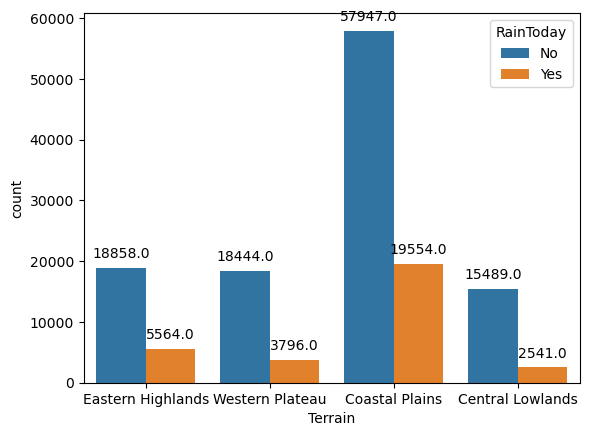

In [81]:
ax=sns.countplot(x=dff['Terrain'],hue=dff['RainToday'])

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

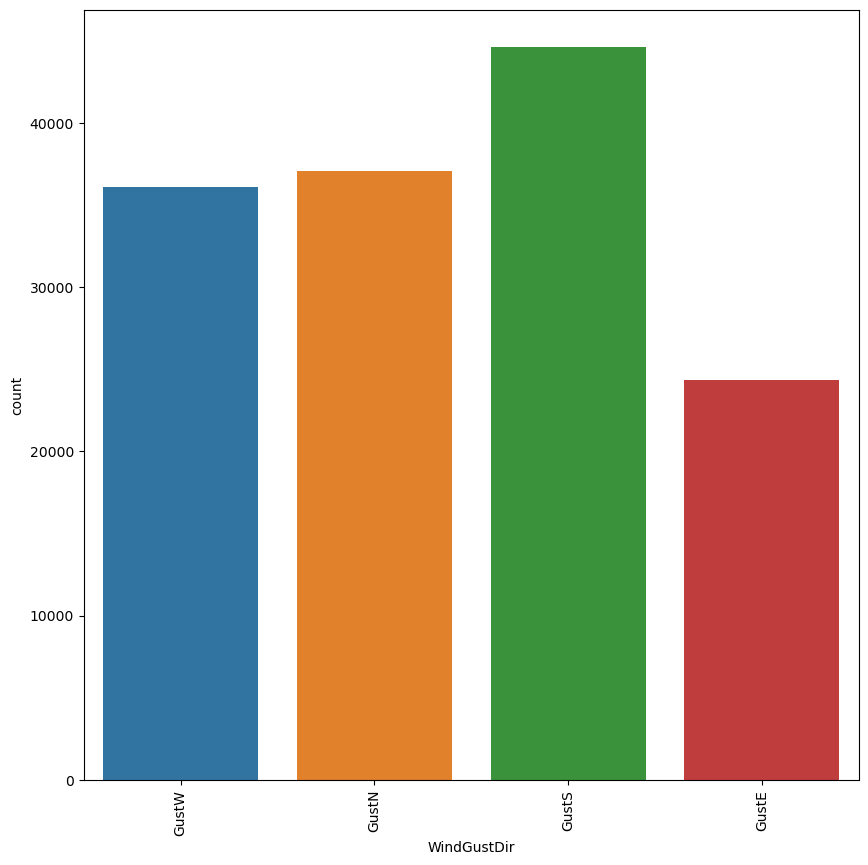

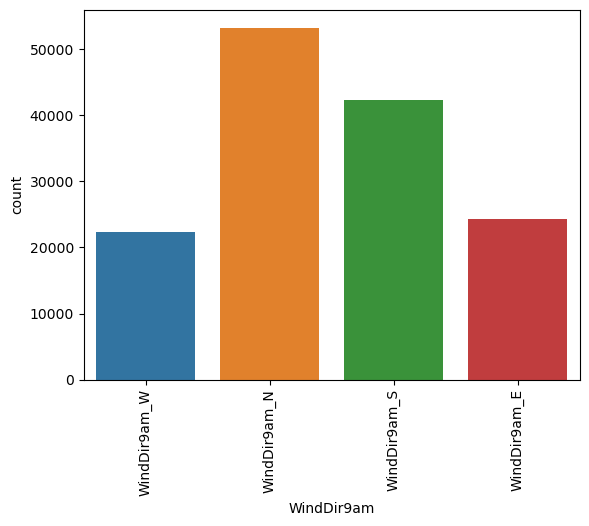

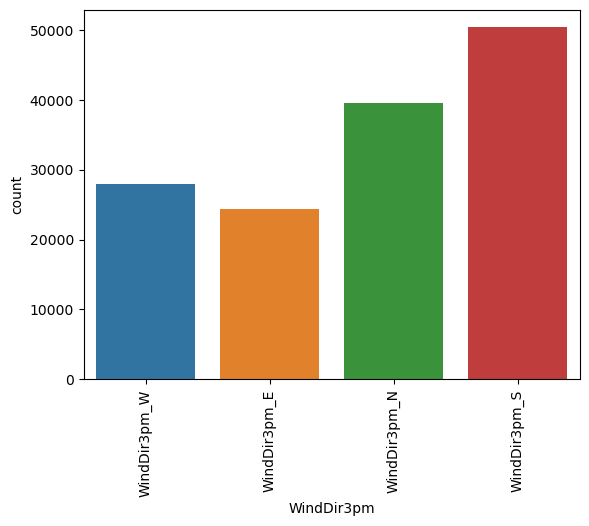

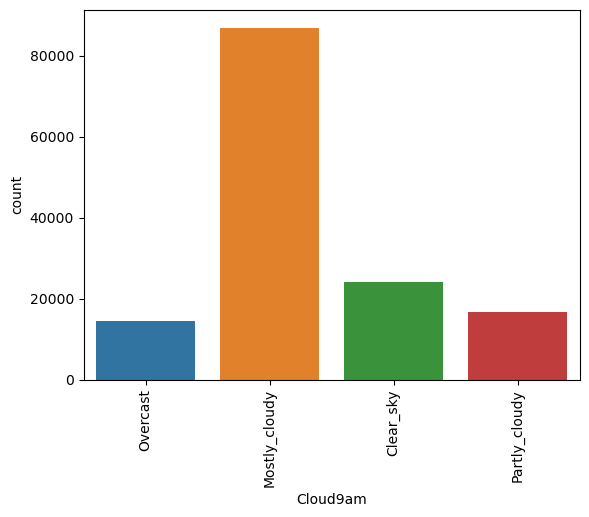

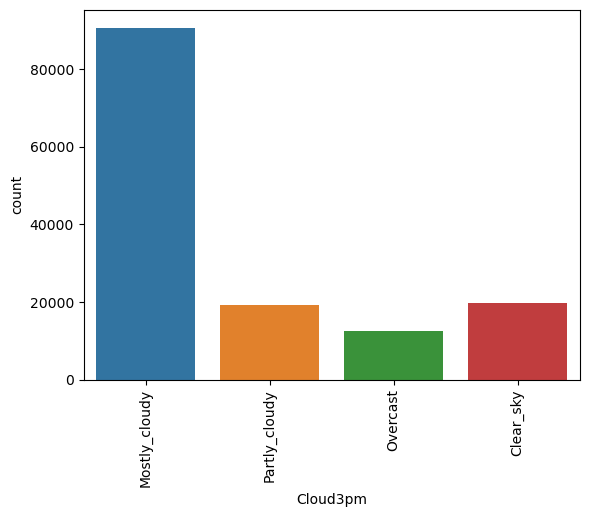

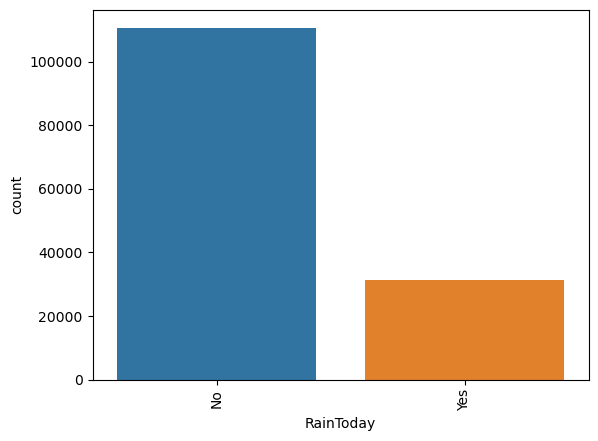

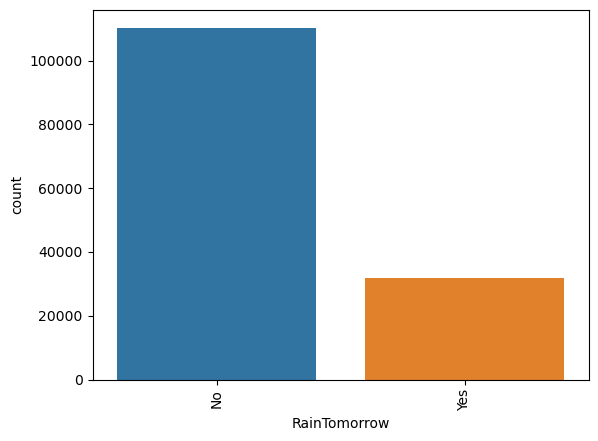

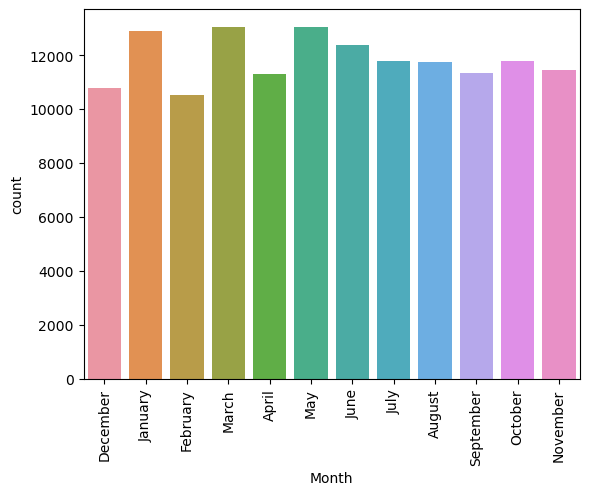

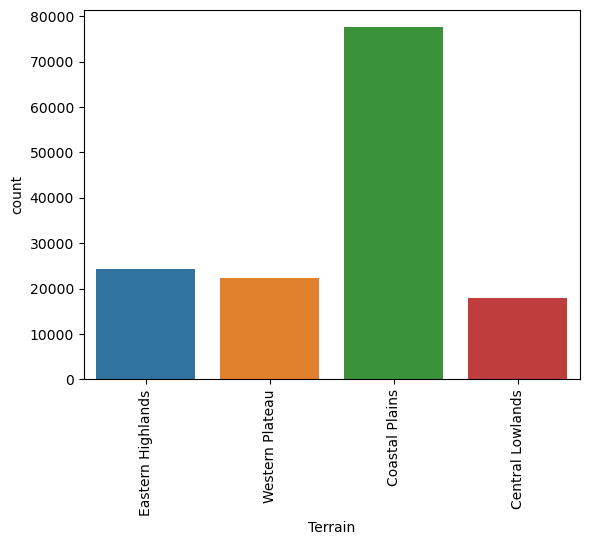

In [82]:
#Univariate cat
plt.figure(figsize=(10,10))
for i in cat:
    sns.countplot(x=dff[i])
    plt.xticks(rotation=90)
    plt.show()

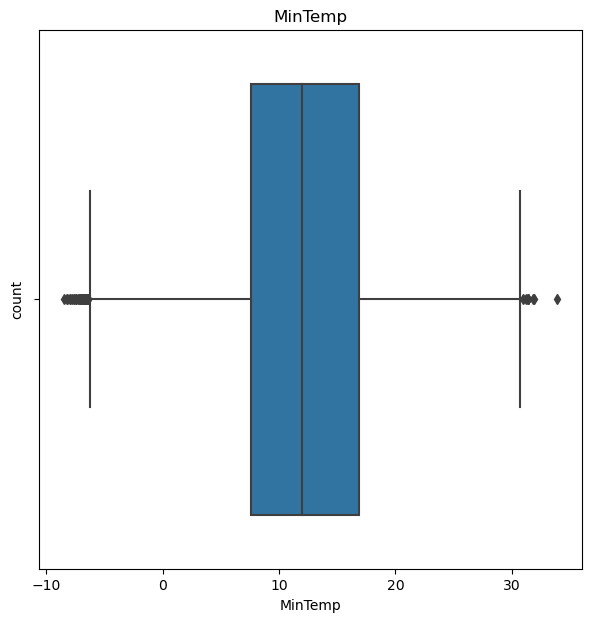

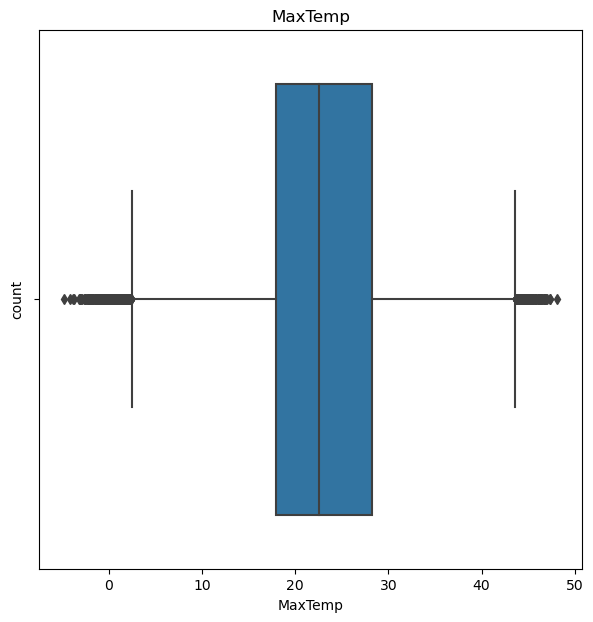

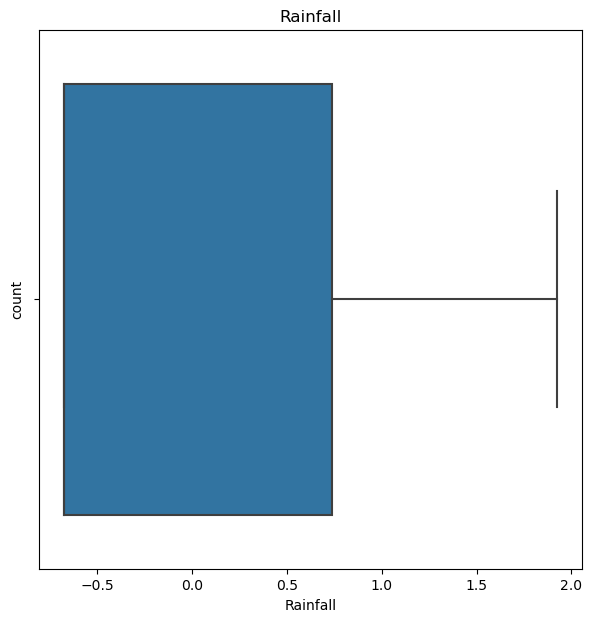

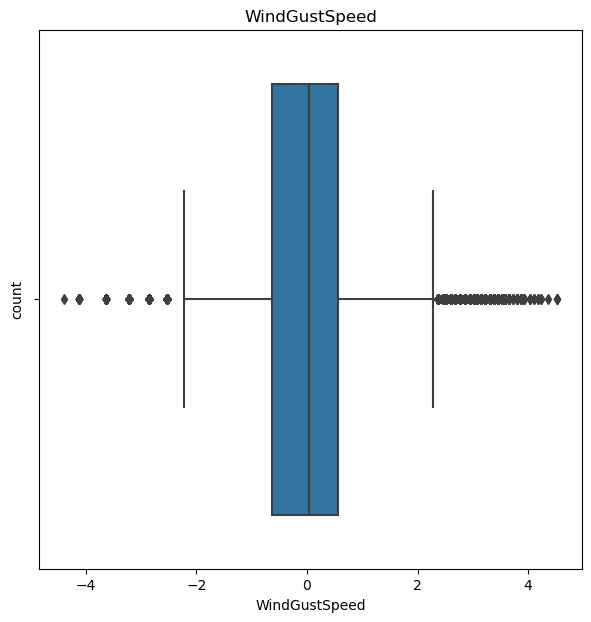

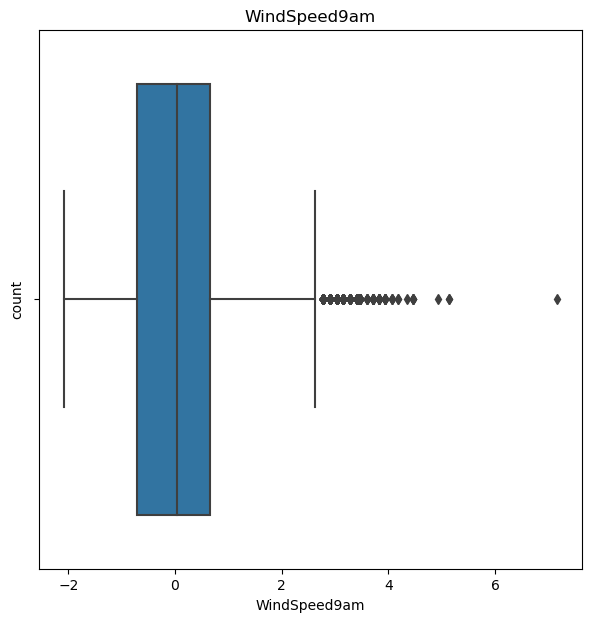

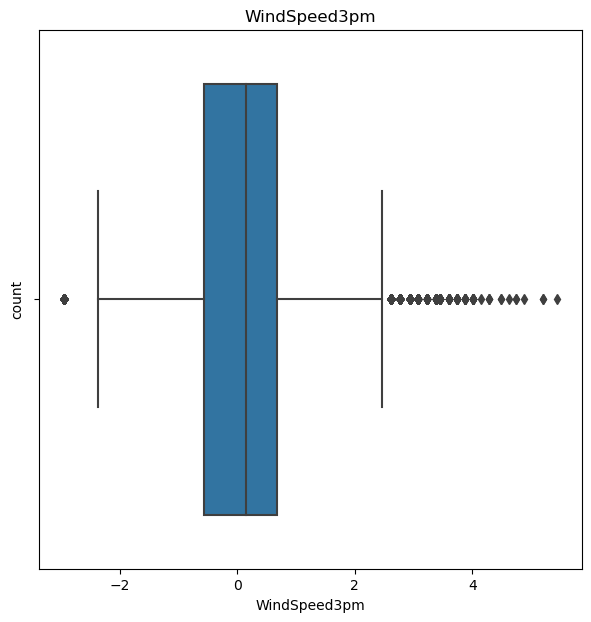

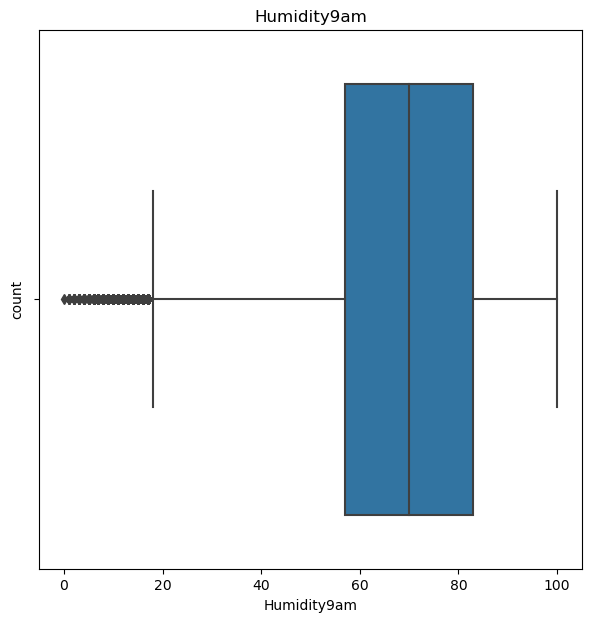

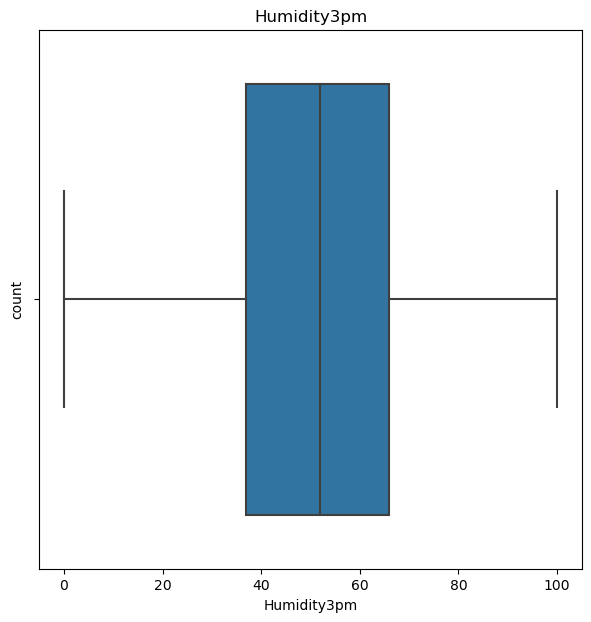

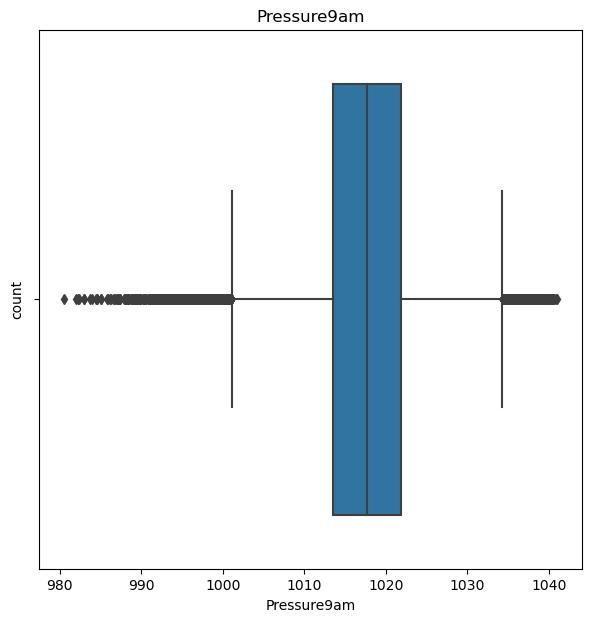

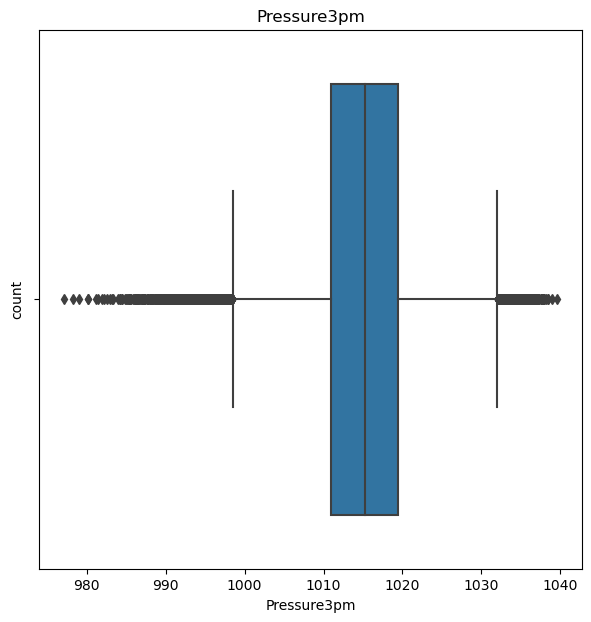

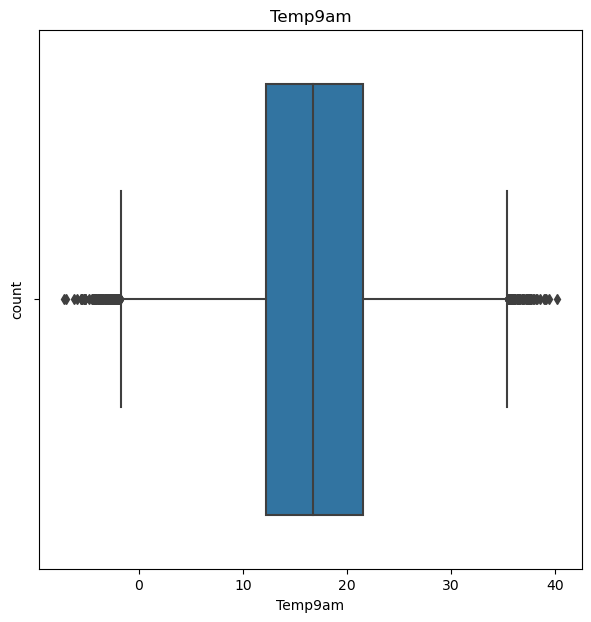

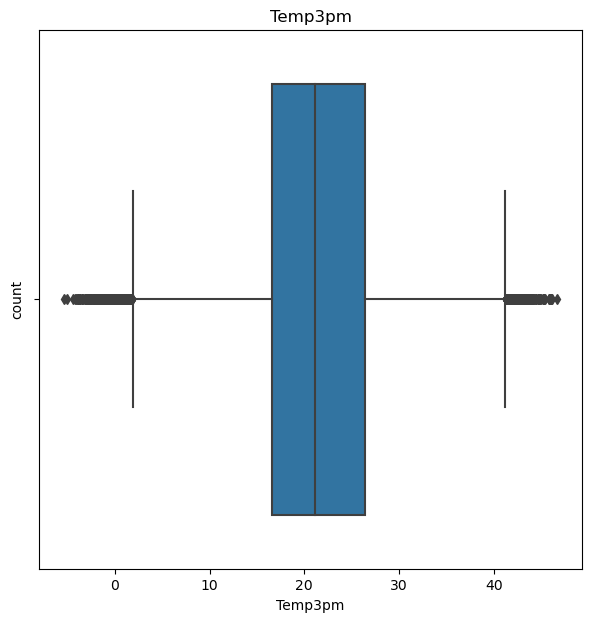

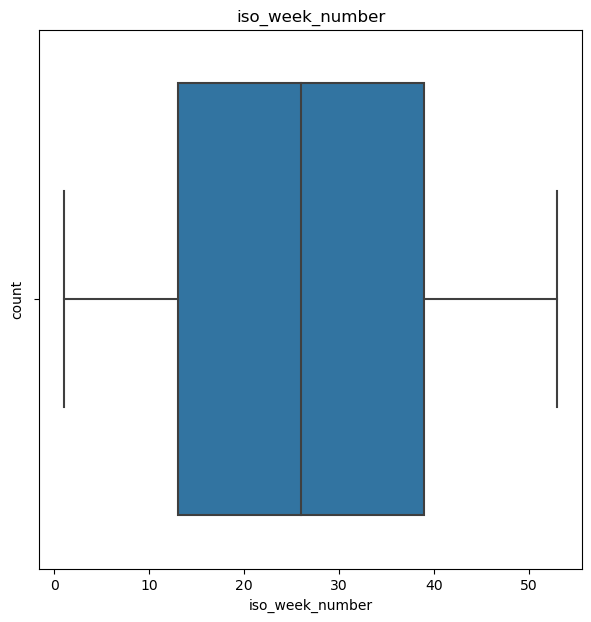

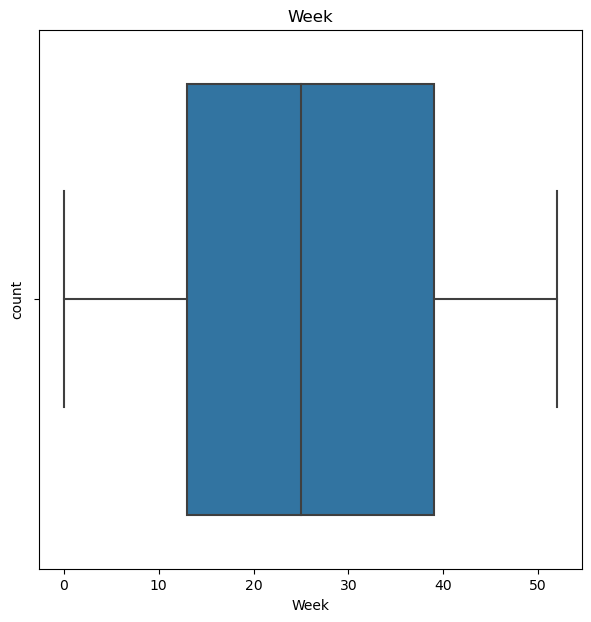

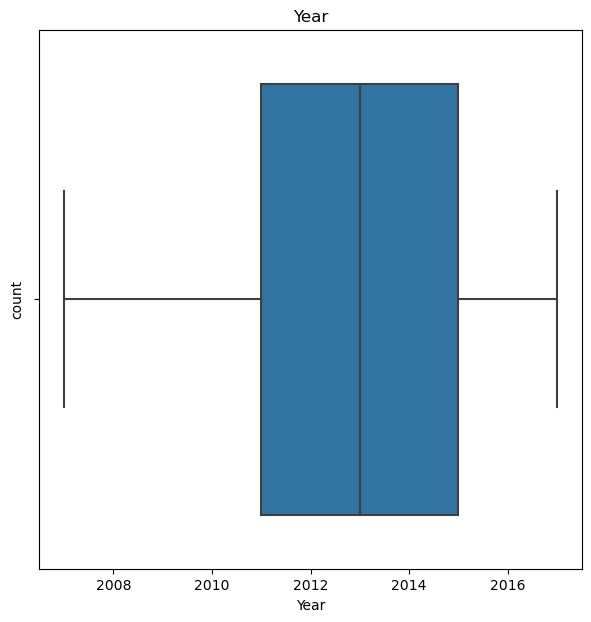

In [83]:
#Univariate Num

for i in num:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=dff[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.title(i)
    plt.show()


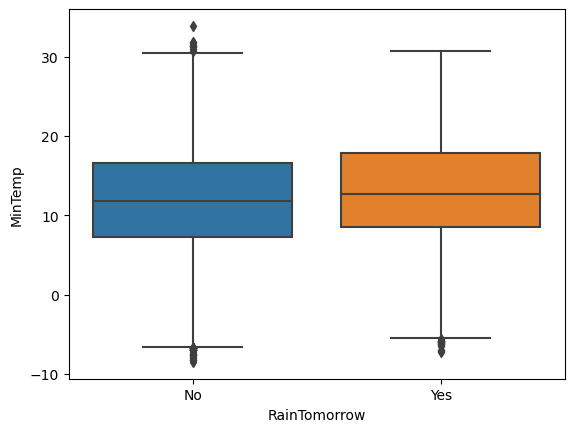

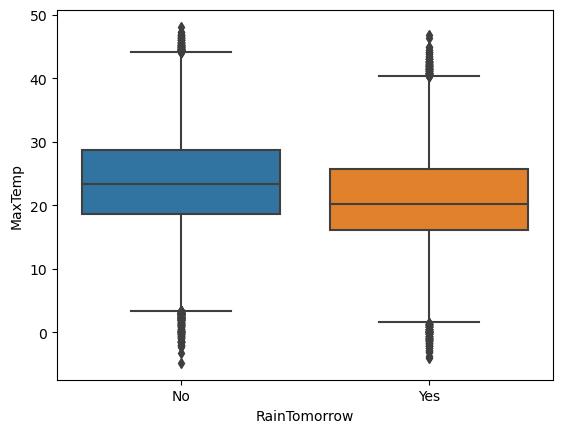

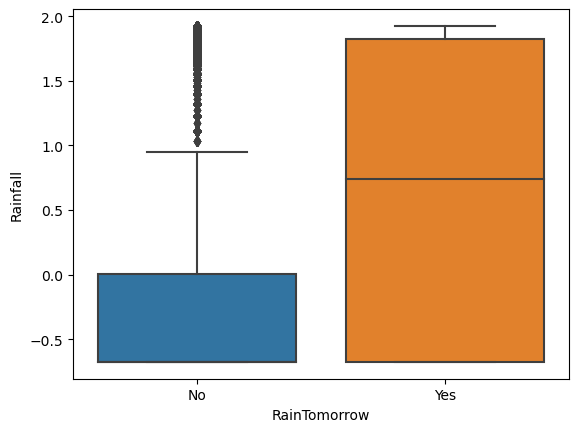

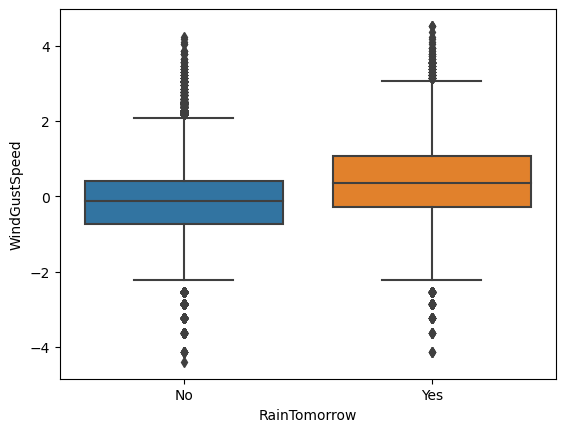

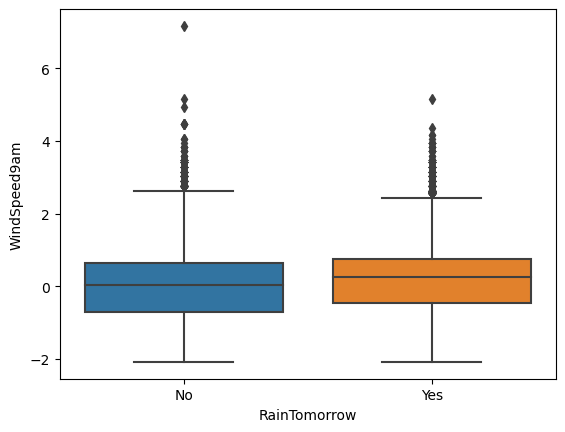

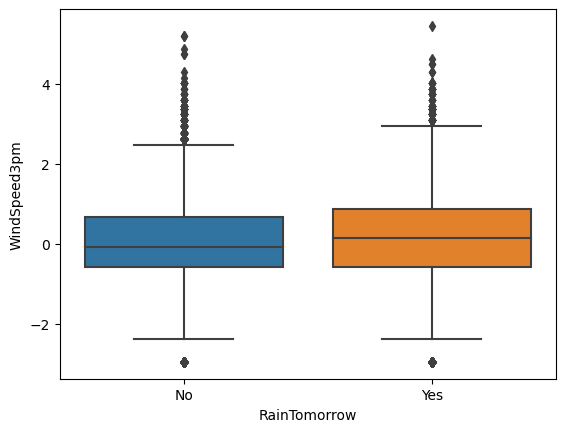

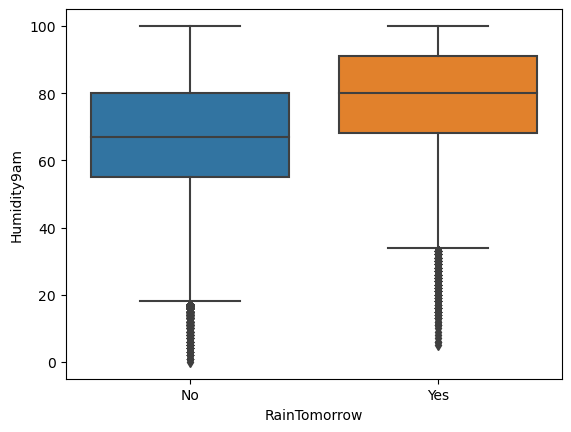

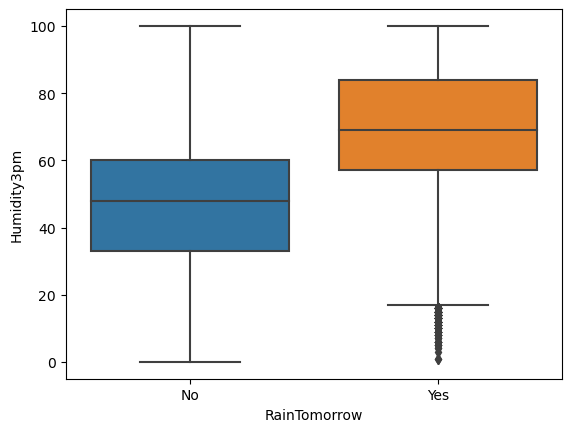

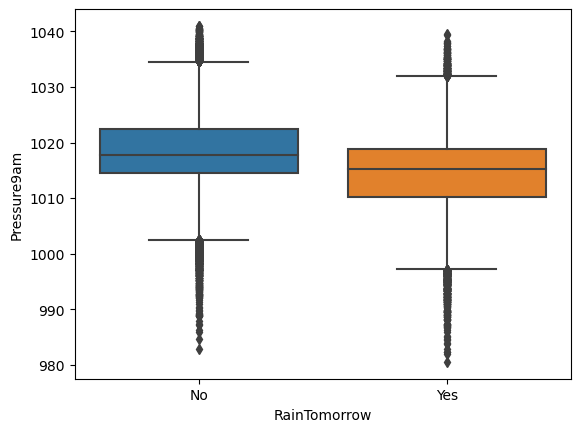

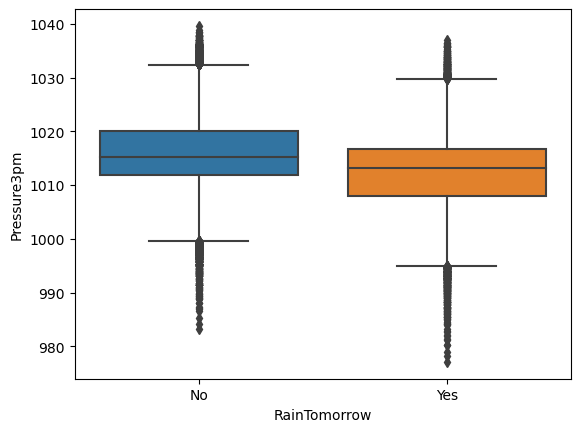

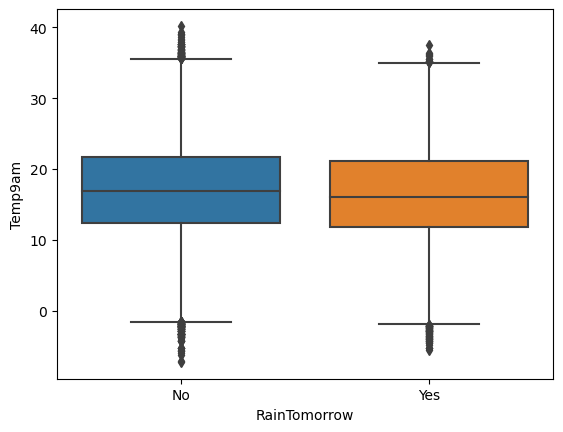

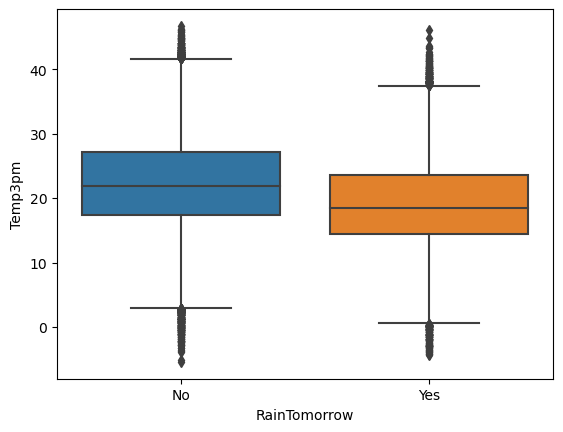

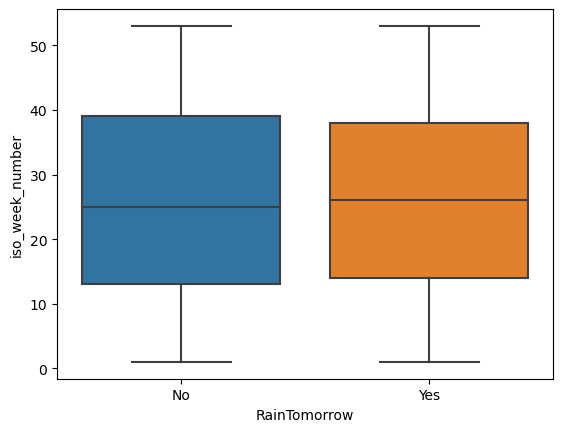

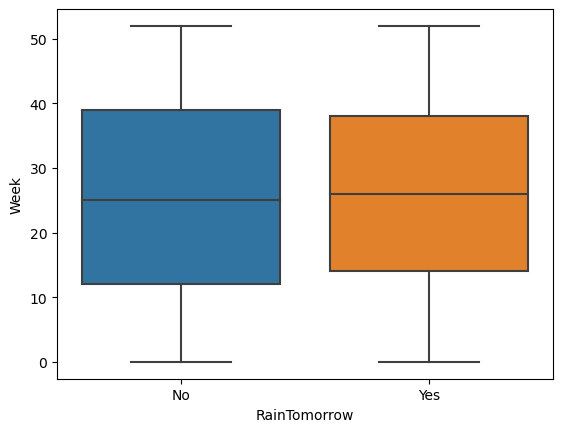

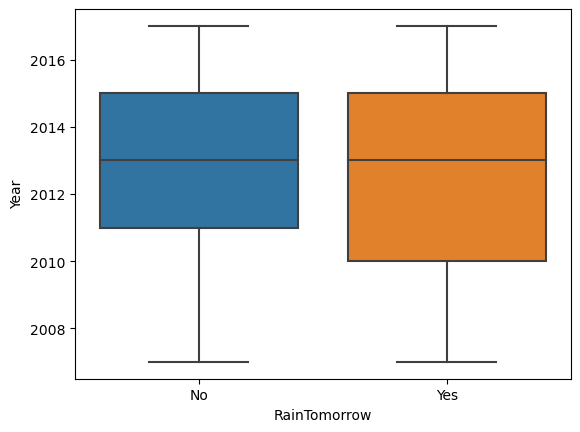

In [84]:
#Num vs Cat

for i in num:
    sns.boxplot(x='RainTomorrow',y=i,data=dff)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

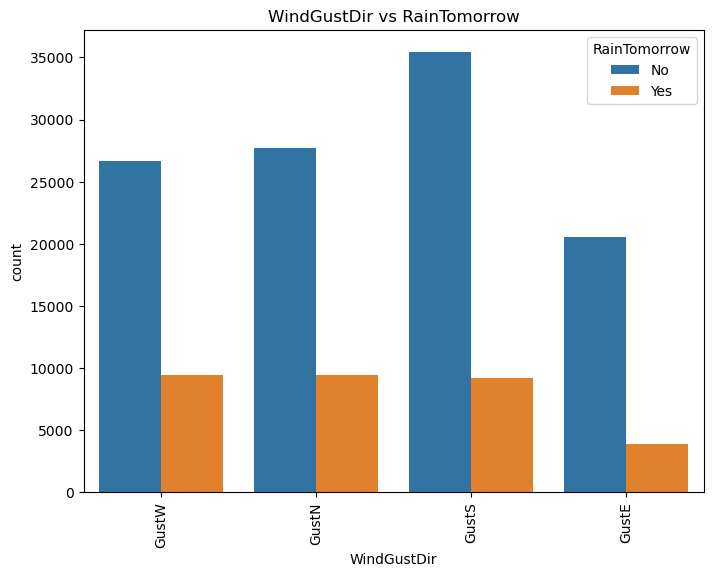

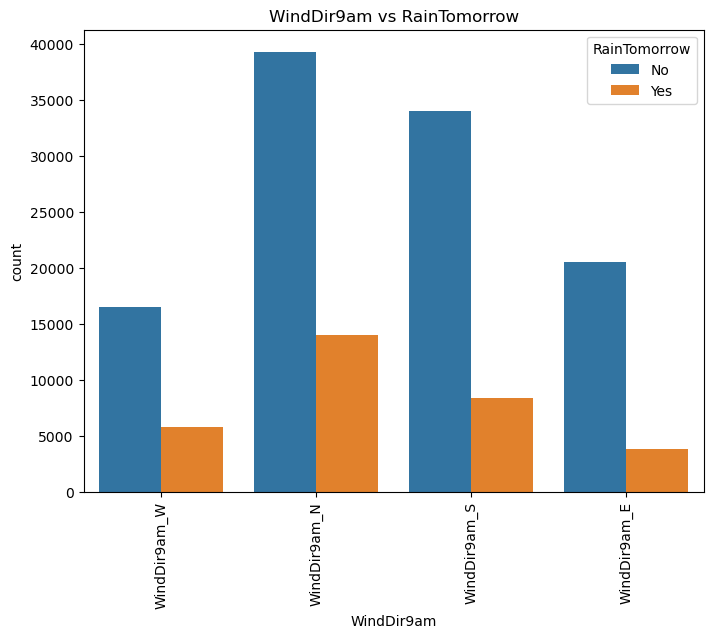

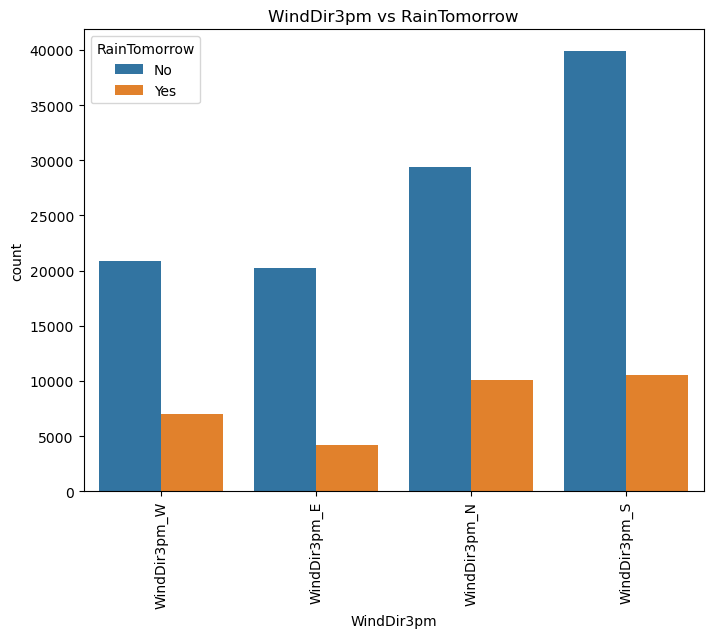

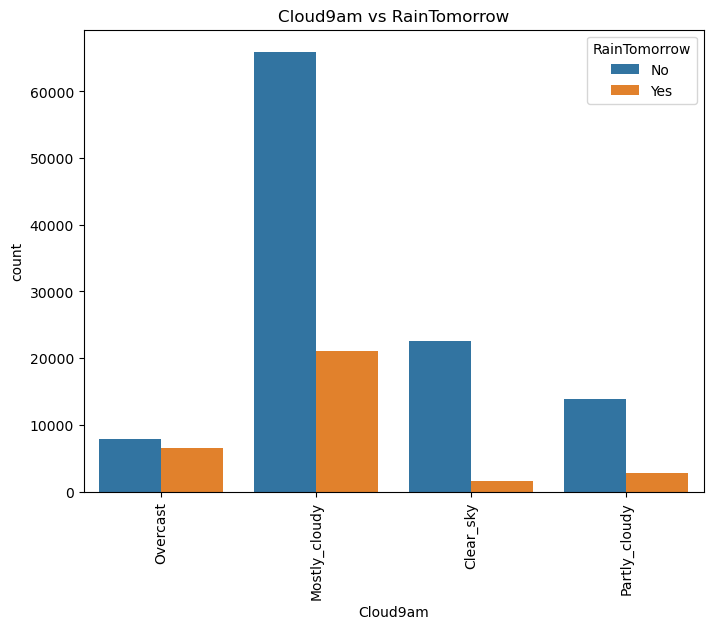

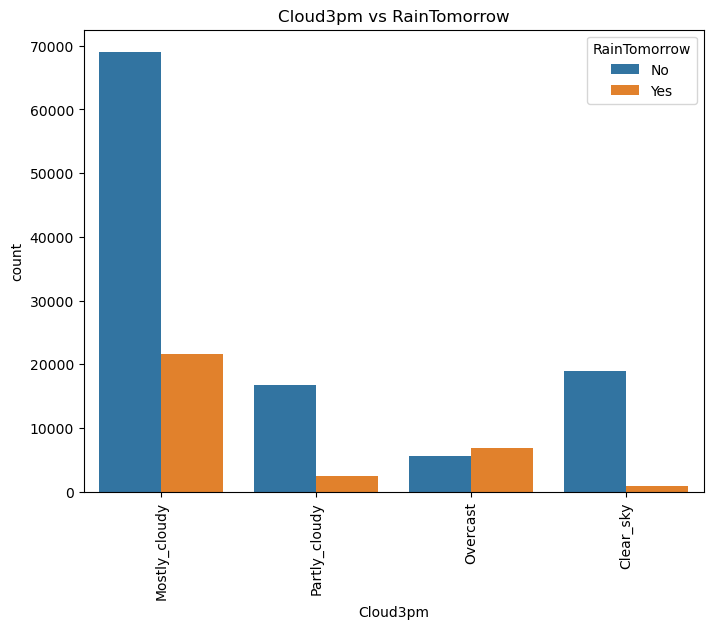

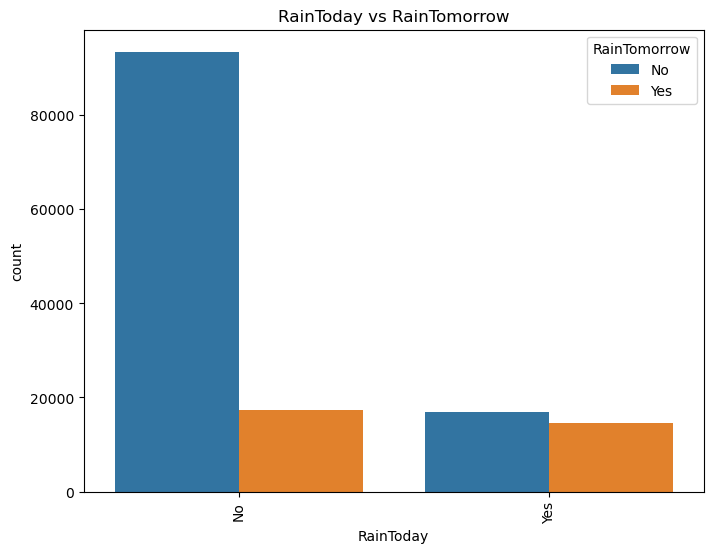

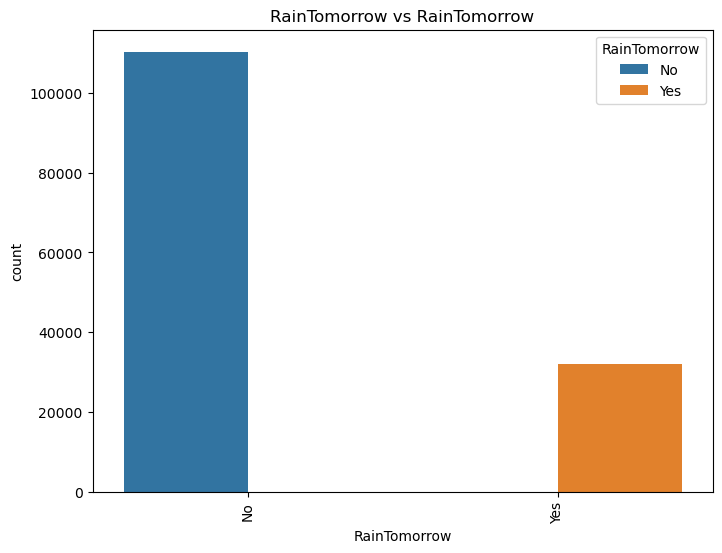

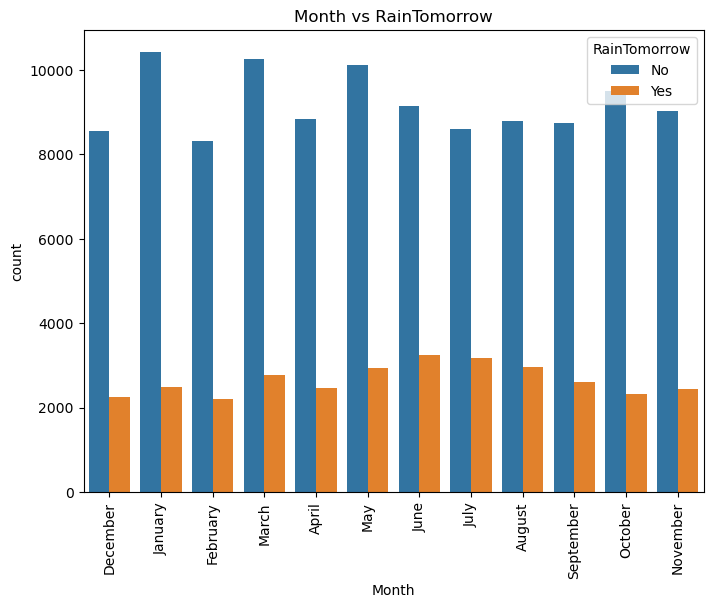

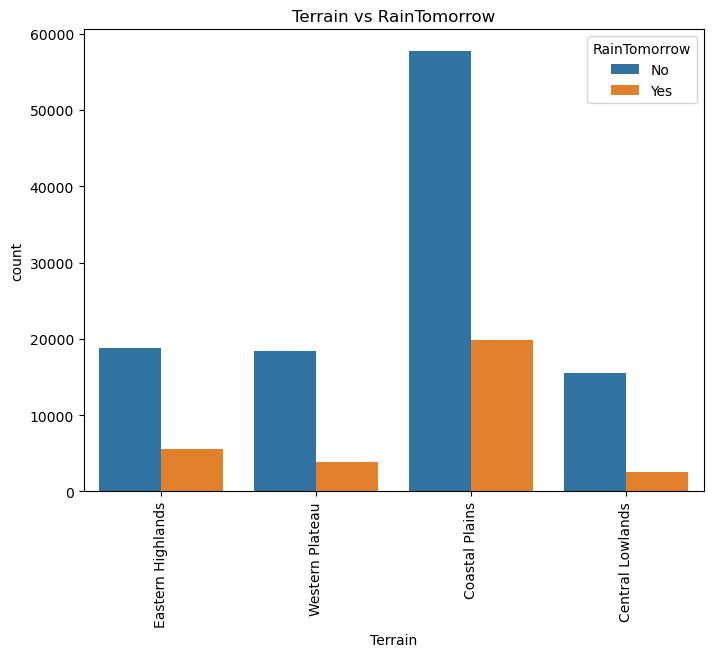

In [85]:
#Cat vs cat

plt.figure(figsize=(10, 10))

for i in cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=i, hue='RainTomorrow', data=dff)
    plt.title(f"{i} vs RainTomorrow")
    plt.xticks(rotation=90)
    plt.show()

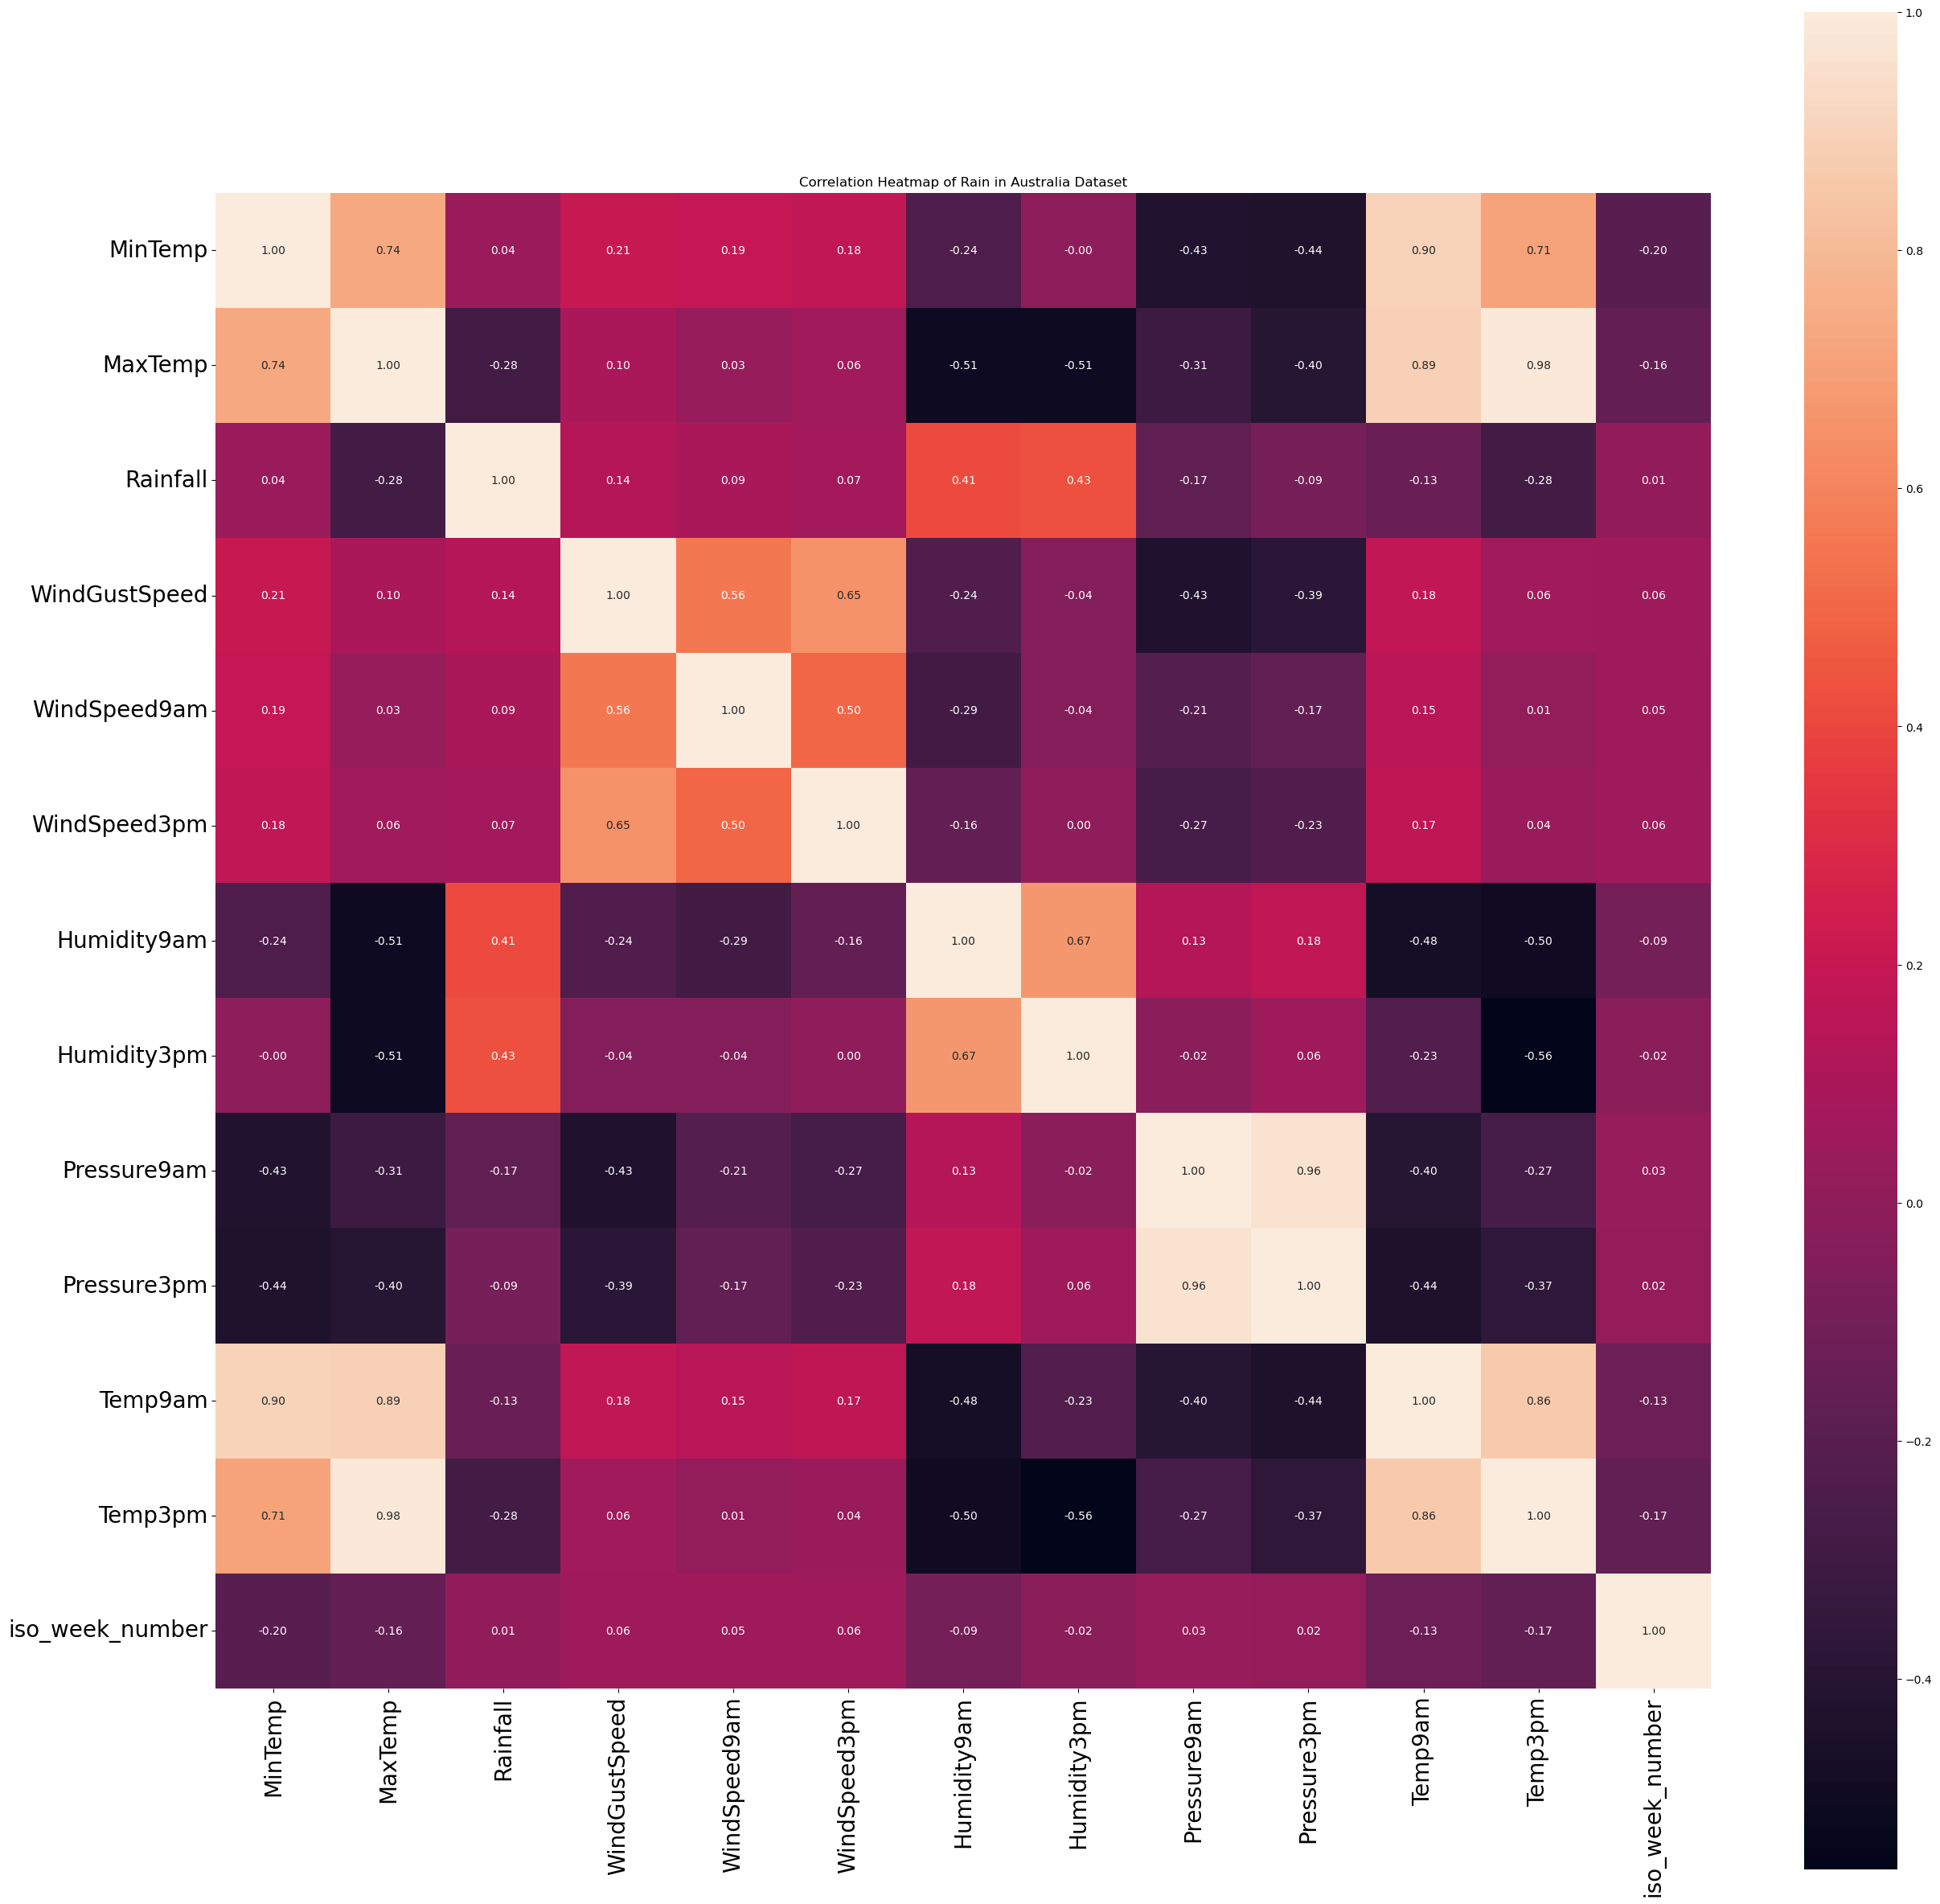

In [86]:
#Multivariate

plt.figure(figsize=(30,30))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
sns.heatmap(dff.drop(['Week','Year'],1).corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

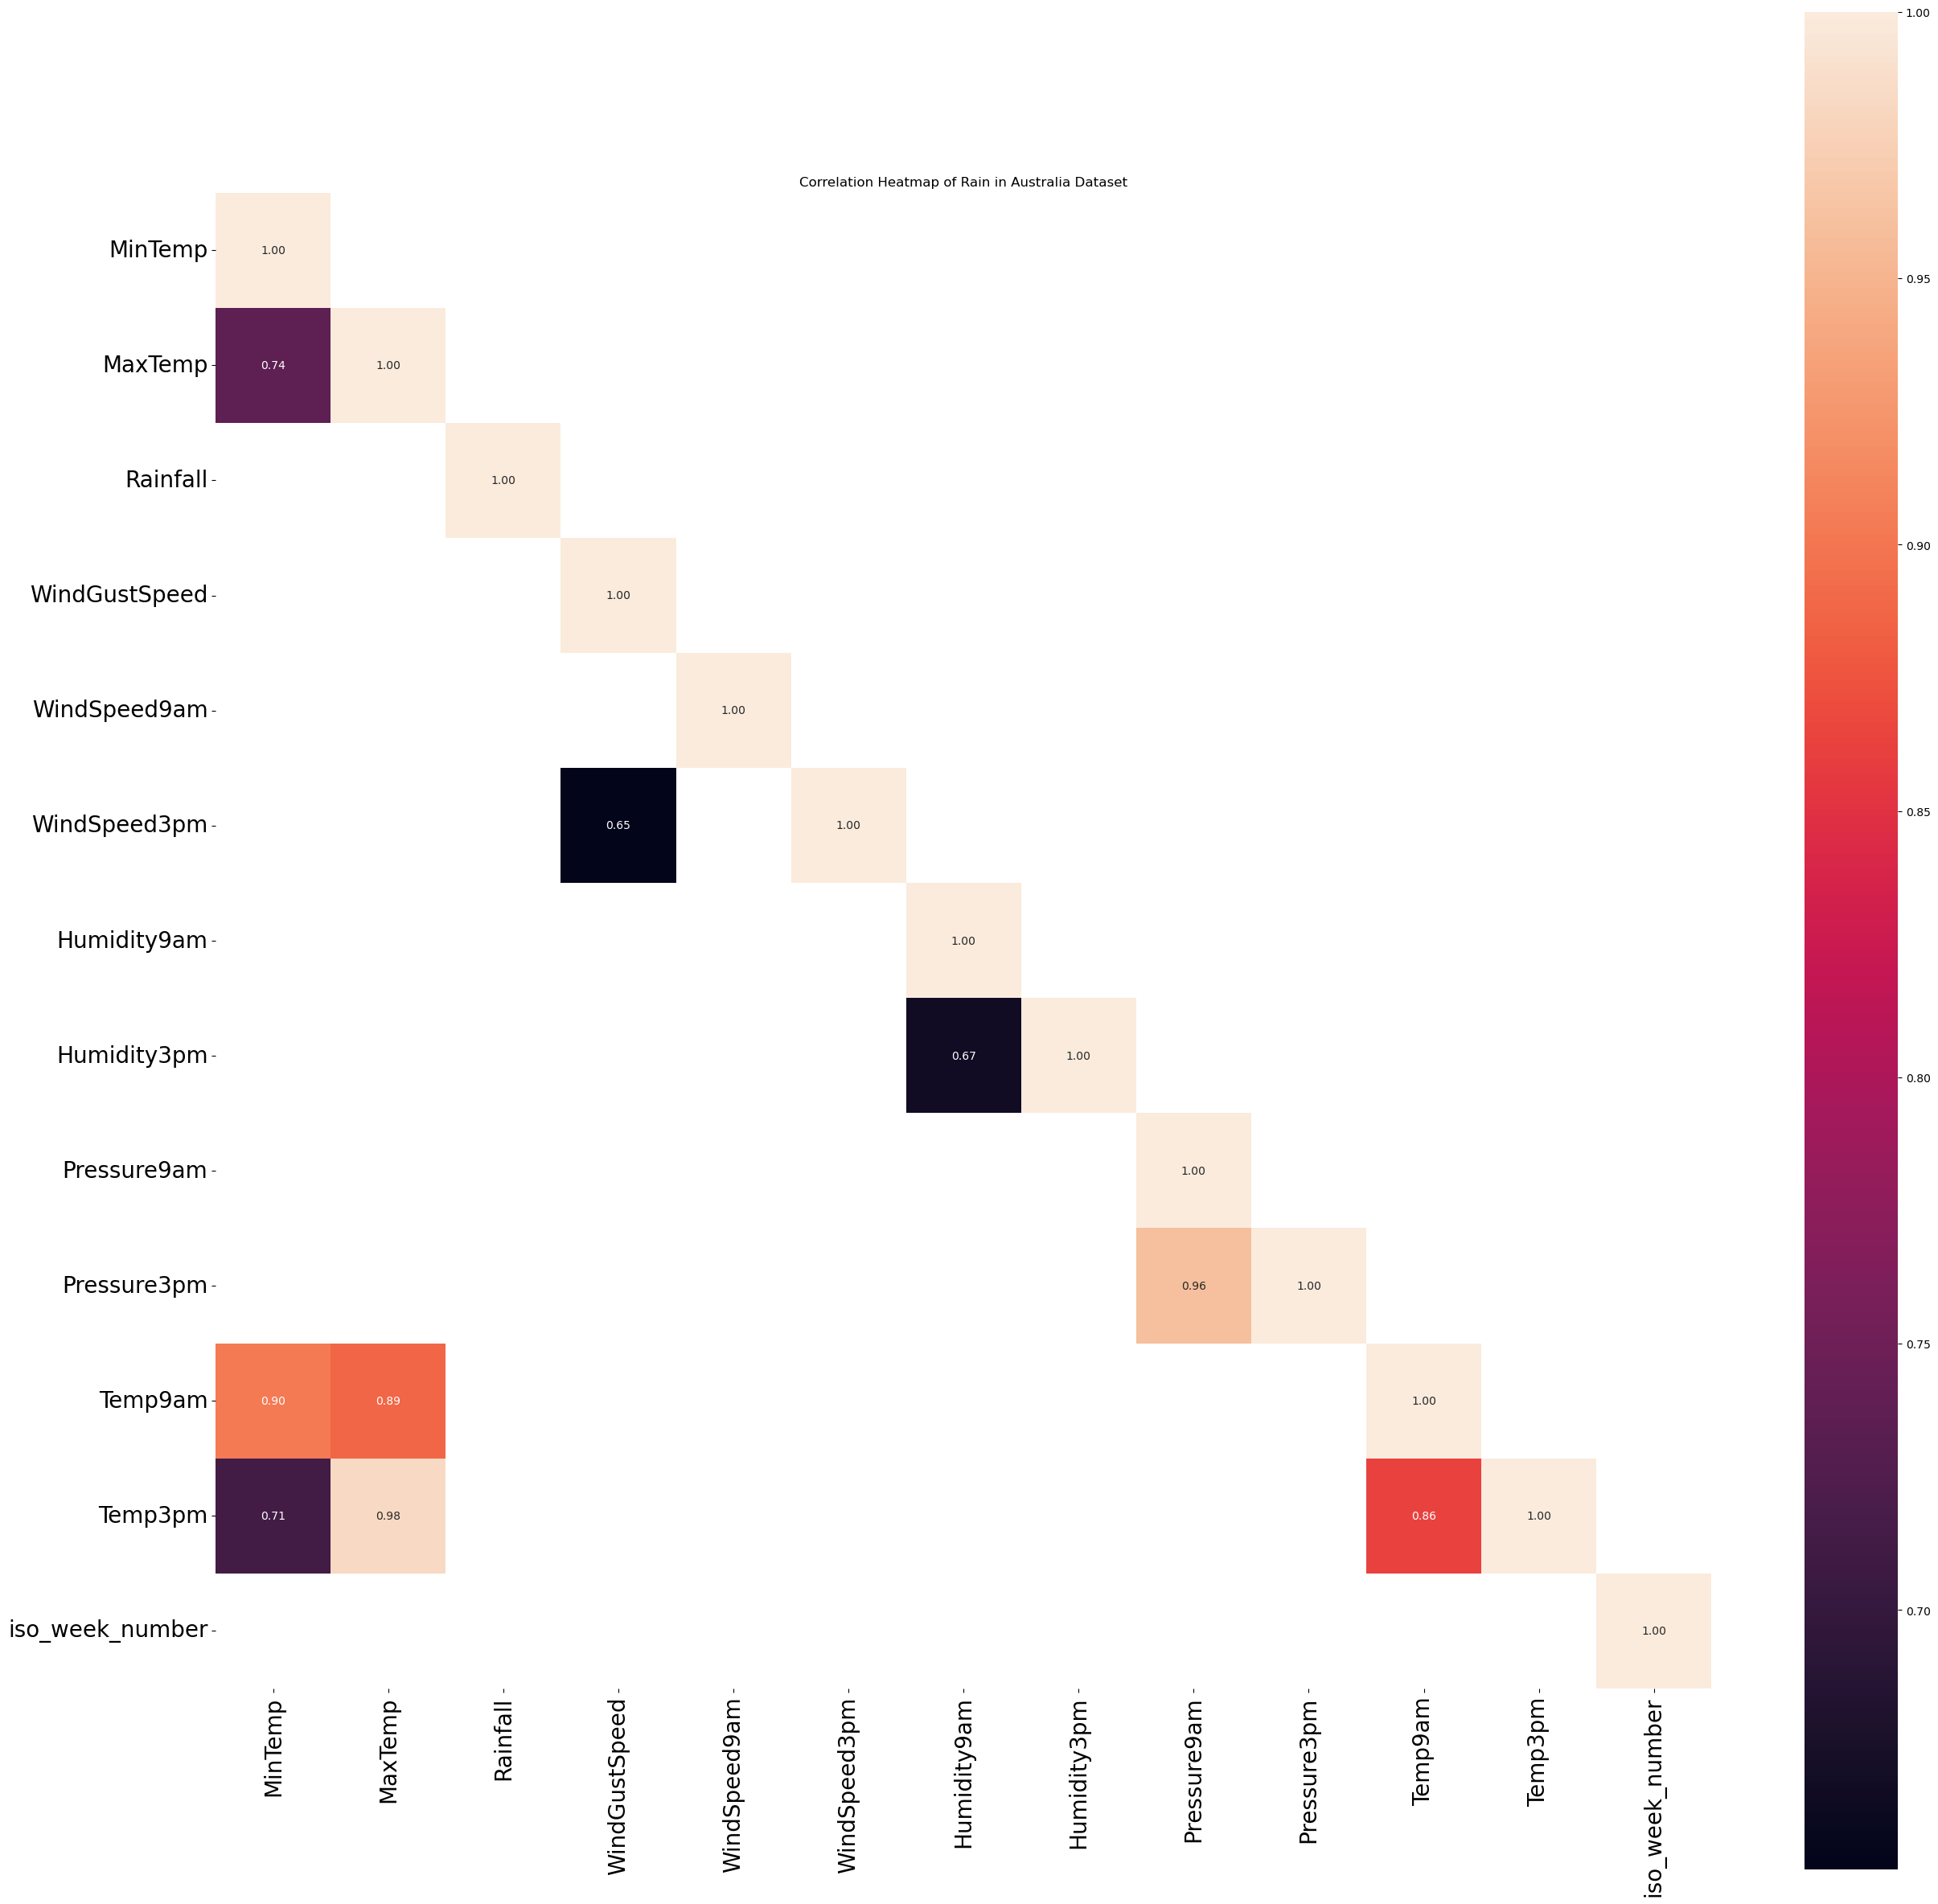

In [87]:
plt.figure(figsize=(30,30))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
sns.heatmap(dff.drop(['Week','Year'],1).corr()[(dff.corr()<=-0.6)|(dff.corr()>=0.6)], square=True, annot=True, fmt='.2f', linecolor='white',mask=np.triu(dff.drop(['Week','Year'],1).corr(),+1))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()


In [88]:
dff['RainToday'].replace({'No':0,'Yes':1},inplace=True)
dff['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [89]:
dff['Cloud3pm'].value_counts()

Mostly_cloudy    90758
Clear_sky        19784
Partly_cloudy    19243
Overcast         12408
Name: Cloud3pm, dtype: int64

In [90]:
dff['Cloud3pm'].replace({'Clear_sky':0,'Partly_cloudy':1,'Mostly_cloudy':2,'Overcast':3},inplace=True)

In [91]:
dff['Cloud9am'].replace({'Clear_sky':0,'Partly_cloudy':1,'Mostly_cloudy':2,'Overcast':3},inplace=True)

In [92]:
a = pd.get_dummies(dff['WindDir3pm'])

In [93]:
dff=pd.concat([dff,a],axis=1)

In [94]:
b = pd.get_dummies(dff['WindDir9am'])

In [95]:
dff=pd.concat([dff,b],axis=1)

In [96]:
c = pd.get_dummies(dff['Terrain'])

In [97]:
dff=pd.concat([dff,c],axis=1)

In [98]:
d = pd.get_dummies(dff['WindGustDir'])

In [99]:
dff=pd.concat([dff,d],axis=1)

In [100]:
a={'January':1,
'February':2,
'March':3,
'April':4,
'May':5,
'June':6,
'July':7,
'August':8,
'September':9,
'October':10,
'November':11,
'December':12}

In [101]:
dff['Month']=dff['Month'].map(a)

In [102]:
dff.drop(columns=['WindDir3pm','WindDir9am','WindGustDir','Terrain','Date'],axis=1,inplace=True)

In [103]:
dff.shape

(142193, 36)

In [104]:
dff.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'iso_week_number', 'Week', 'Month', 'Year',
       'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W',
       'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W',
       'Central Lowlands', 'Coastal Plains', 'Eastern Highlands',
       'Western Plateau', 'GustE', 'GustN', 'GustS', 'GustW'],
      dtype='object')

## 8years 2year

In [105]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [106]:
from sklearn.model_selection import train_test_split

In [115]:

df15j=dff[(dff['Year']==2015)][dff['Month']=='July']
df15a=dff[(dff['Year']==2015)][dff['Month']=='August']
df15s=dff[(dff['Year']==2015)][dff['Month']=='September']
df15o=dff[(dff['Year']==2015)][dff['Month']=='October']
df15n=dff[(dff['Year']==2015)][dff['Month']=='November']
df15d=dff[(dff['Year']==2015)][dff['Month']=='December']
df16=dff[dff['Year']==2016]
df17=dff[dff['Year']==2017]

In [116]:
dftest2=pd.concat([df15j,df15a,df15s,df15o,df15n,df15d,df16,df17],axis=0)
dftest2

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_S,WindDir9am_W,Central Lowlands,Coastal Plains,Eastern Highlands,Western Plateau,GustE,GustN,GustS,GustW
2498,20.4,37.6,-0.674176,1.082715,-2.081838,-1.424151,46.0,17.0,1013.4,1009.2,...,0,0,0,0,1,0,1,0,0,0
2499,20.9,33.6,0.443110,0.829006,-0.448126,-0.084387,54.0,30.0,1011.1,1008.4,...,1,0,0,0,1,0,0,0,1,0
2500,18.4,23.1,1.552166,0.696493,-0.201250,2.051635,62.0,67.0,1014.0,1014.8,...,0,0,0,0,1,0,1,0,0,0
2501,17.3,23.7,1.900772,0.044098,-0.448126,-0.084387,74.0,65.0,1017.9,1016.5,...,1,0,0,0,1,0,0,0,1,0
2502,15.5,22.9,1.840499,-0.636452,-0.861918,-1.117807,92.0,63.0,1016.3,1013.9,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,-0.674176,-0.636452,0.245320,-0.571043,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,1,1,0,0,0
145455,2.8,23.4,-0.674176,-0.636452,0.028785,-0.835246,51.0,24.0,1024.6,1020.3,...,1,0,0,0,0,1,1,0,0,0
145456,3.6,25.3,-0.674176,-1.577180,0.028785,-1.117807,56.0,21.0,1023.5,1019.1,...,1,0,0,0,0,1,0,1,0,0
145457,5.4,26.9,-0.674176,-0.115677,-0.448126,-1.117807,53.0,24.0,1021.0,1016.8,...,1,0,0,0,0,1,0,1,0,0


In [117]:
df8=dff[(dff['Year']==2008)]
df9=dff[(dff['Year']==2009)]
df10=dff[(dff['Year']==2010)]
df11=dff[(dff['Year']==2011)]
df12=dff[(dff['Year']==2012)]
df13=dff[(dff['Year']==2013)]
df14=dff[(dff['Year']==2014)]
df15ja=dff[(dff['Year']==2015)][dff['Month']=='January']
df15f=dff[(dff['Year']==2015)][dff['Month']=='February']
df15m=dff[(dff['Year']==2015)][dff['Month']=='March']
df15a=dff[(dff['Year']==2015)][dff['Month']=='April']
df15may=dff[(dff['Year']==2015)][dff['Month']=='May']
df15jun=dff[(dff['Year']==2015)][dff['Month']=='June']


In [118]:
dftrain8=pd.concat([df8,df9,df10,df11,df12,df13,df14,df15ja,df15f,
                   df15m,df15a,df15may,df15jun],axis=0)
dftrain8

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_S,WindDir9am_W,Central Lowlands,Coastal Plains,Eastern Highlands,Western Plateau,GustE,GustN,GustS,GustW
0,13.4,22.9,0.739274,0.418745,0.741544,0.672933,71.0,22.0,1007.7,1007.1,...,0,1,0,0,1,0,0,0,0,1
1,7.4,25.1,-0.674176,0.418745,-1.181299,0.466373,44.0,25.0,1010.6,1007.8,...,0,0,0,0,1,0,0,0,0,1
2,12.9,25.7,-0.674176,0.559844,0.646672,0.872967,38.0,30.0,1007.6,1008.7,...,0,1,0,0,1,0,0,0,0,1
3,9.2,28.0,-0.674176,-1.346857,-0.201250,-1.117807,45.0,16.0,1017.6,1012.8,...,1,0,0,0,1,0,0,1,0,0
4,17.5,32.3,1.108064,0.197968,-0.716906,0.252475,82.0,33.0,1010.8,1006.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,-0.674176,0.346418,1.103319,0.872967,22.0,13.0,1014.1,1009.8,...,0,0,0,0,0,1,0,0,1,0
144549,15.1,36.8,-0.674176,-0.636452,0.646672,0.252475,16.0,8.0,1012.6,1007.6,...,0,0,0,0,0,1,0,1,0,0
144550,17.3,37.8,-0.674176,0.044098,1.274990,-1.117807,15.0,8.0,1011.9,1008.0,...,0,0,0,0,0,1,1,0,0,0
144551,20.1,38.5,-0.674176,0.346418,1.441377,-0.084387,22.0,9.0,1014.0,1009.2,...,0,0,0,0,0,1,1,0,0,0


In [119]:
print('dftrain8 shape',dftrain8.shape)
print('dftest2 shape',dftest2.shape)

dftrain8 shape (98927, 36)
dftest2 shape (25974, 36)


In [120]:
print('dftrain8 dtypes')
print('      ')
print(dftrain8.dtypes)
print('---------------------------------------------')
print('dftest2 dtypes')
print('      ')
print(dftest2.dtypes)


dftrain8 dtypes
      
MinTemp              float64
MaxTemp              float64
Rainfall             float64
WindGustSpeed        float64
WindSpeed9am         float64
WindSpeed3pm         float64
Humidity9am          float64
Humidity3pm          float64
Pressure9am          float64
Pressure3pm          float64
Cloud9am               int64
Cloud3pm               int64
Temp9am              float64
Temp3pm              float64
RainToday              int64
RainTomorrow           int64
iso_week_number       UInt32
Week                   int32
Month                  int64
Year                   int64
WindDir3pm_E           uint8
WindDir3pm_N           uint8
WindDir3pm_S           uint8
WindDir3pm_W           uint8
WindDir9am_E           uint8
WindDir9am_N           uint8
WindDir9am_S           uint8
WindDir9am_W           uint8
Central Lowlands       uint8
Coastal Plains         uint8
Eastern Highlands      uint8
Western Plateau        uint8
GustE                  uint8
GustN               

In [121]:
print('dftrain8 columns')
print('      ')
print(dftrain8.columns)
print('---------------------------------------------')
print('dftest2 columns')
print('      ')
print(dftest2.columns)


dftrain8 columns
      
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'iso_week_number', 'Week', 'Month', 'Year',
       'WindDir3pm_E', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W',
       'WindDir9am_E', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W',
       'Central Lowlands', 'Coastal Plains', 'Eastern Highlands',
       'Western Plateau', 'GustE', 'GustN', 'GustS', 'GustW'],
      dtype='object')
---------------------------------------------
dftest2 columns
      
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'iso_week_number', 'Week', 'Month', 'Year',
       'WindDir3pm_E', 'WindDir3pm

In [122]:
xtrain=dftrain8.drop('RainTomorrow',1)
ytrain=dftrain8['RainTomorrow']
xtest=dftest2.drop('RainTomorrow',1)
ytest=dftest2['RainTomorrow']

In [123]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)

xtrain (98927, 35)
xtest (25974, 35)
ytrain (98927,)
ytest (25974,)


In [124]:
from sklearn.metrics import classification_report

In [125]:
model_report = pd.DataFrame()
model_report.index = ["accuracy","recall","precision","f1score"]

In [126]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

lr_metrics = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Logisticreg"] = lr_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669


In [127]:
gaus = GaussianNB()
gaus.fit(xtrain,ytrain)
ypred = gaus.predict(xtest)

gaus_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Naive bayes"] = gaus_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186


In [128]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
dt_metrics = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Decision Tree"] = dt_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208


In [129]:
dt = DecisionTreeClassifier()

params={'criterion':["gini", "entropy", "log_loss"],
       'splitter':['best','random'],
       'max_depth':[10,13,12],
       'min_samples_split':range(3,11)}
dt_cv = GridSearchCV(dt,param_grid = params)
dt_cv.fit(xtrain,ytrain)
dt_cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'min_samples_split': 7,
 'splitter': 'random'}

In [130]:
dt = DecisionTreeClassifier(criterion= 'log_loss',
 max_depth= 10,
min_samples_split= 10,
splitter='random')


dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

dt_metrics = [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Decision Tree Tuned"] = dt_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755


In [131]:
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)

abc_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Ada boosting"] = abc_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648


In [132]:
abc = AdaBoostClassifier()

params={'n_estimators':[10,20,25],'learning_rate':[1.0,0.05,1.5]}
abc_cv = GridSearchCV(abc,param_grid = params)
abc_cv.fit(xtrain,ytrain)
abc_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 25}

In [133]:
abc = AdaBoostClassifier(learning_rate= 1.0, n_estimators= 25)
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)

abc_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Ada boosting tuned"] = abc_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452


In [134]:
abc = BaggingClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)

abc_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Bagging"] = abc_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157


In [135]:
bg=BaggingClassifier()
params={'n_estimators':[10,13,20,5],
    'max_samples':[1.0,1.5,2.0,1.3],
    'max_features':[1.0,2.3,3.2,1.5]}
grid_bag=GridSearchCV(estimator=bg,param_grid=params,cv=3)
grid_bag.fit(xtrain,ytrain)
grid_bag.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}

In [136]:
bg=BaggingClassifier(max_features=1.0, max_samples= 1.0, n_estimators= 20)
model=bg.fit(xtrain,ytrain)
ypred=model.predict(xtest)

bagg_tuned= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Bagging Tuned"] = bagg_tuned
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356


In [137]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)

gbc_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Gradient boosting"] = gbc_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356
Gradient boosting,0.840725,0.488900,0.725843,0.584263


In [138]:
gbc = GradientBoostingClassifier()

params={'min_samples_split':[2,3,5,10], 'n_estimators':[10,25,45,30],'learning_rate':[0.1,1.2,1.4],'max_features':['sqrt', 'log2']
        }
gbc_cv = GridSearchCV(gbc,param_grid = params)
gbc_cv.fit(xtrain,ytrain)
gbc_cv.best_params_

{'learning_rate': 0.1,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 45}

In [139]:
gbc=GradientBoostingClassifier(min_samples_split=3, n_estimators= 45, learning_rate= 0.1,max_features='sqrt')
model=gbc.fit(xtrain,ytrain)
ypred=model.predict(xtest)

gbc_tuned= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Gradient boosting tuned"] = gbc_tuned
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356
Gradient boosting,0.840725,0.488900,0.725843,0.584263
Gradient boosting tuned,0.834989,0.448873,0.725666,0.554655


In [140]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

rf_metrics= [accuracy_score(ytest,ypred),recall_score(ytest,ypred),precision_score(ytest,ypred),f1_score(ytest,ypred)]

model_report["Random forest"] = rf_metrics
model_report.T

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356
Gradient boosting,0.840725,0.488900,0.725843,0.584263
Gradient boosting tuned,0.834989,0.448873,0.725666,0.554655


In [141]:
model_report = model_report.T
model_report

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356
Gradient boosting,0.840725,0.488900,0.725843,0.584263
Gradient boosting tuned,0.834989,0.448873,0.725666,0.554655


In [142]:
model_report

,accuracy,recall,precision,f1score
Logisticreg,0.829522,0.498991,0.671875,0.572669
Naive bayes,0.770193,0.623949,0.498455,0.554186
Decision Tree,0.761877,0.528927,0.481697,0.504208
Decision Tree Tuned,0.829945,0.420114,0.720508,0.530755
Ada boosting,0.835797,0.484527,0.705954,0.574648
Ada boosting tuned,0.832486,0.479987,0.693897,0.567452
Bagging,0.827828,0.465523,0.681438,0.553157
Bagging Tuned,0.835258,0.485536,0.702946,0.574356
Gradient boosting,0.840725,0.488900,0.725843,0.584263
Gradient boosting tuned,0.834989,0.448873,0.725666,0.554655


In [147]:
a =pd.DataFrame()
odds = np.exp(dt.feature_importances_)
a["values"]=odds
a["cols"] = xtrain.columns
a=a.sort_values("values",ascending=False,ignore_index=True)
a

,values,cols
0,1.701578,Humidity3pm
1,1.174177,RainToday
2,1.069231,WindGustSpeed
3,1.064340,Pressure3pm
4,1.025067,Cloud3pm
5,1.021137,WindDir3pm_N
6,1.020124,Pressure9am
7,1.012503,Rainfall
8,1.010447,WindDir9am_N
9,1.008909,MaxTemp


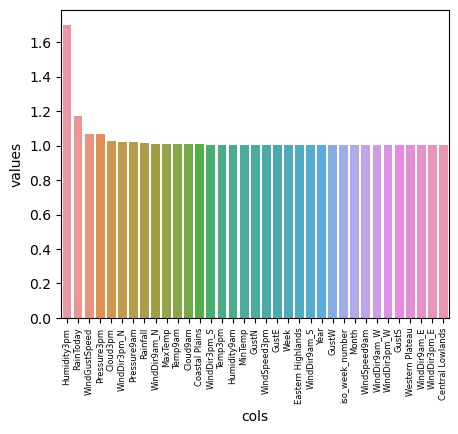

In [159]:
plt.figure(figsize=(5,4))
sns.barplot(y='values',x='cols',data=a)
plt.xticks(rotation=90,size=6)
plt.show()

# 9-1

In [ ]:
perf_score_9y = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def update_performance (name,model,test,pred):
    global perf_score_9y
    perf_score_9y = perf_score_9y.append({'Model'       : name,
                                    'Accuracy'    : accuracy_score(test,pred),
                                    'Recall'      : recall_score(test,pred),
                                    'Precision'   : precision_score(test,pred),
                                    'F1 Score'    : f1_score(test,pred)},
                                   ignore_index = True)

In [ ]:
dff1=dff.copy()

In [ ]:
dff1.head(2)

In [ ]:
df16j=dff1[(dff['Year']==2016)][dff1['Month']=='July']
df16a=dff1[(dff['Year']==2016)][dff1['Month']=='August']
df16s=dff1[(dff['Year']==2016)][dff1['Month']=='September']
df16o=dff1[(dff['Year']==2016)][dff1['Month']=='October']
df16n=dff1[(dff['Year']==2016)][dff1['Month']=='November']
df16d=dff1[(dff['Year']==2016)][dff1['Month']=='December']
df17=dff1[dff1['Year']==2017]

In [ ]:
dftest10=pd.concat([df16j,df16a,df16s,df16o,df16n,df16d,df17],axis=0)

In [ ]:
df8=dff1[(dff1['Year']==2008)]
df9=dff1[(dff1['Year']==2009)]
df10=dff1[(dff1['Year']==2010)]
df11=dff1[(dff1['Year']==2011)]
df12=dff1[(dff1['Year']==2012)]
df13=dff1[(dff1['Year']==2013)]
df14=dff1[(dff1['Year']==2014)]
df15=dff1[(dff1['Year']==2015)]
df16ja=dff1[(dff1['Year']==2016)][dff1['Month']=='January']
df16f=dff1[(dff1['Year']==2016)][dff1['Month']=='February']
df16m=dff1[(dff1['Year']==2016)][dff1['Month']=='March']
df16a=dff1[(dff1['Year']==2016)][dff1['Month']=='April']
df16may=dff1[(dff1['Year']==2016)][dff1['Month']=='May']
df16jun=dff1[(dff1['Year']==2016)][dff1['Month']=='June']

In [ ]:
dftrain9=pd.concat([df8,df9,df10,df11,df12,df13,df14,df15,df16ja,df16f,
                   df16m,df16a,df16may,df16jun],axis=0)


In [ ]:
print('dftrain9 shape',dftrain9.shape)
print('dftest10 shape',dftest10.shape)

In [ ]:
print('dftrain9 dtypes')
print('      ')
print(dftrain9.dtypes)
print('---------------------------------------------')
print('dftest10 dtypes')
print('      ')
print(dftest10.dtypes)


In [ ]:
print('dftrain9 columns')
print('      ')
print(dftrain9.columns)
print('---------------------------------------------')
print('dftest10 columns')
print('      ')
print(dftest10.columns)


In [ ]:
X_train = dftrain9.drop('RainTomorrow', axis=1)  
y_train = dftrain9['RainTomorrow']
X_test = dftest10.drop('RainTomorrow', axis=1)
y_test = dftest10['RainTomorrow']


In [ ]:
#Logistic regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
update_performance(name='Logisticreg',
                  model=lr,
                  test=y_test,
                  pred=y_pred)
perf_score_9y

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
update_performance(name='Naive bayes',
                  model=nb,
                  test=y_test,
                  pred=y_pred)
perf_score_9y

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
update_performance(name='Decision Tree',
                  model=dt,
                  test=y_test,
                  pred=y_pred)
perf_score_9y

In [ ]:
#Decission tree tuning
from sklearn.model_selection import GridSearchCV
params={'criterion':["gini", "entropy", "log_loss"],
       'splitter':['best','random'],
       'max_depth':[10,13,12],
       'min_samples_split':range(3,11)}
dt=DecisionTreeClassifier()
grid_dt1=GridSearchCV(estimator=dt,param_grid=params,cv=3,scoring='accuracy')
grid_dt1.fit(X_train,y_train)
grid_dt1.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion= 'log_loss',max_depth= 10,min_samples_split= 7,splitter= 'random')
model=dt.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
update_performance(name='Decision Tree Tuned',
                  model=dt,
                  test=y_test,
                  pred=y_pred)
perf_score_9y

In [ ]:
#Adaboost
ada=AdaBoostClassifier()
model=ada.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Ada boosting',
                  model=ada,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
ada=AdaBoostClassifier()
params={'n_estimators':[10,20,25],'learning_rate':[1.0,0.05,1.5]}
grid_ada=GridSearchCV(estimator=ada,param_grid=params,cv=3)
grid_ada.fit(X_train,y_train)
grid_ada.best_params_

In [ ]:
ada=AdaBoostClassifier(learning_rate= 1.0, n_estimators= 25)
model=ada.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Ada boosting tuned',
                  model=ada,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
#Bagging
bg=BaggingClassifier()
model=bg.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Bagging',
                  model=bg,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
#Bagging tuned
bg=BaggingClassifier()
params={'n_estimators':[10,13,20,5],
    'max_samples':[1.0,1.5,2.0,1.3],
    'max_features':[1.0,2.3,3.2,1.5]}
grid_bag=GridSearchCV(estimator=bg,param_grid=params,cv=3)
grid_bag.fit(X_train,y_train)
grid_bag.best_params_

In [ ]:
bg=BaggingClassifier(max_features=1.0, max_samples= 1.0, n_estimators= 20)
model=bg.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Bagging Tuned',
                  model=bg,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
#GradientBoostingClassifier
gb=GradientBoostingClassifier()
model=bg.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Gradient boosting',
                  model=gb,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
#GradientBoostingClassifier tuned
gb=GradientBoostingClassifier()
params={'min_samples_split':[2,3,5,10], 'n_estimators':[10,25,45,30],'learning_rate':[0.1,1.2,1.4],'max_features':['sqrt', 'log2']
        }
grid_grad=GridSearchCV(estimator=gb,param_grid=params,cv=3)
grid_grad.fit(X_train,y_train)
grid_grad.best_params_

In [ ]:
gb=GradientBoostingClassifier(learning_rate= 0.1,
max_features= 'sqrt',min_samples_split= 3, n_estimators= 45)
model=bg.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Gradient boosting tuned',
                  model=gb,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
#Randomforestclassifier 
rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
ypred=model.predict(X_test)
print(classification_report(y_test,ypred))

In [ ]:
update_performance(name='Random forest',
                  model=rf,
                  test=y_test,
                  pred=ypred)
perf_score_9y

In [ ]:
perf_score_9y

In [ ]:
model_report=model_report.rename({'index':'model'},axis=1)

In [ ]:
model_report

In [ ]:
final_model = pd.concat([perf_score_9y,model_report],axis=1)
final_model

In [ ]:
a =pd.DataFrame()
odds = np.exp(dt.feature_importances_)
a["values"]=odds
a["cols"] = xtrain.columns
a.set_index("cols",inplace=True)
a.sort_values("values",ascending=False).plot(kind="bar")


## season wise prediction

In [107]:
df1=dff.copy()
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_S,WindDir9am_W,Central Lowlands,Coastal Plains,Eastern Highlands,Western Plateau,GustE,GustN,GustS,GustW
0,13.4,22.9,0.739274,0.418745,0.741544,0.672933,71.0,22.0,1007.7,1007.1,...,0,1,0,0,1,0,0,0,0,1
1,7.4,25.1,-0.674176,0.418745,-1.181299,0.466373,44.0,25.0,1010.6,1007.8,...,0,0,0,0,1,0,0,0,0,1
2,12.9,25.7,-0.674176,0.559844,0.646672,0.872967,38.0,30.0,1007.6,1008.7,...,0,1,0,0,1,0,0,0,0,1
3,9.2,28.0,-0.674176,-1.346857,-0.201250,-1.117807,45.0,16.0,1017.6,1012.8,...,1,0,0,0,1,0,0,1,0,0
4,17.5,32.3,1.108064,0.197968,-0.716906,0.252475,82.0,33.0,1010.8,1006.0,...,0,0,0,0,1,0,0,0,0,1


In [108]:
season1={1:'SUMMER',
2:'SUMMER',
3:'AUTUMN',
4:'AUTUMN',
5:'AUTUMN',
6:'WINTER',
7:'WINTER',
8:'WINTER',
9:'SPRING',
10:'SPRING',
11:'SPRING',
12:'SUMMER'}
df1['Season_1']=df1['Month'].map(season1)

In [109]:
season1={'SUMMER':1,
'SUMMER':1,
'AUTUMN':3,
'AUTUMN':3,
'AUTUMN':3,
'WINTER':2,
'WINTER':2,
'WINTER':2,
'SPRING':4,
'SPRING':4,
'SPRING':4,
'SUMMER':1}
df1['Season_1']=df1['Season_1'].map(season1)

In [110]:
df1['Season_1']

0         1
1         1
2         1
3         1
4         1
         ..
145454    2
145455    2
145456    2
145457    2
145458    2
Name: Season_1, Length: 142193, dtype: int64

In [111]:

df15j=df1[(df1['Year']==2015)][df1['Month']==7]
df15a=df1[(df1['Year']==2015)][df1['Month']==8]
df15s=df1[(df1['Year']==2015)][df1['Month']==9]
df15o=df1[(df1['Year']==2015)][df1['Month']==10]
df15n=df1[(df1['Year']==2015)][df1['Month']==11]
df15d=df1[(df1['Year']==2015)][df1['Month']==12]
df16=df1[df1['Year']==2016]
df17=df1[df1['Year']==2017]

In [112]:
dftest2=pd.concat([df15j,df15a,df15s,df15o,df15n,df15d,df16,df17],axis=0)
dftest2

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_W,Central Lowlands,Coastal Plains,Eastern Highlands,Western Plateau,GustE,GustN,GustS,GustW,Season_1
2314,2.9,10.6,-0.674176,-1.952749,-0.861918,-1.588812,99.0,68.0,1029.5,1026.1,...,0,0,0,1,0,0,0,0,1,2
2315,4.6,12.1,0.950954,0.829006,-0.716906,1.067143,87.0,52.0,1022.4,1022.1,...,0,0,0,1,0,0,0,0,1,2
2316,-2.1,11.0,0.950954,-1.823111,-2.081838,-0.571043,87.0,46.0,1029.0,1026.7,...,0,0,0,1,0,0,1,0,0,2
2317,1.1,11.6,-0.674176,-1.346857,-2.081838,-0.571043,94.0,56.0,1026.3,1023.8,...,0,0,0,1,0,0,0,0,1,2
2318,0.7,11.8,-0.674176,-2.854404,-2.081838,-1.588812,91.0,59.0,1023.9,1020.8,...,0,0,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,-0.674176,-0.636452,0.245320,-0.571043,59.0,27.0,1024.7,1021.2,...,0,0,0,0,1,1,0,0,0,2
145455,2.8,23.4,-0.674176,-0.636452,0.028785,-0.835246,51.0,24.0,1024.6,1020.3,...,0,0,0,0,1,1,0,0,0,2
145456,3.6,25.3,-0.674176,-1.577180,0.028785,-1.117807,56.0,21.0,1023.5,1019.1,...,0,0,0,0,1,0,1,0,0,2
145457,5.4,26.9,-0.674176,-0.115677,-0.448126,-1.117807,53.0,24.0,1021.0,1016.8,...,0,0,0,0,1,0,1,0,0,2


In [113]:
df8=df1[(df1['Year']==2008)]
df9=df1[(df1['Year']==2009)]
df10=df1[(df1['Year']==2010)]
df11=df1[(df1['Year']==2011)]
df12=df1[(df1['Year']==2012)]
df13=df1[(df1['Year']==2013)]
df14=df1[(df1['Year']==2014)]
df15ja=df1[(df1['Year']==2015)][df1['Month']==1]
df15f=df1[(df1['Year']==2015)][df1['Month']==2]
df15m=df1[(df1['Year']==2015)][df1['Month']==3]
df15a=df1[(df1['Year']==2015)][df1['Month']==4]
df15may=df1[(df1['Year']==2015)][df1['Month']==5]
df15jun=df1[(df1['Year']==2015)][df1['Month']==6]


In [114]:
dftrain8=pd.concat([df8,df9,df10,df11,df12,df13,df14,df15ja,df15f,
                   df15m,df15a,df15may,df15jun],axis=0)
dftrain8

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_W,Central Lowlands,Coastal Plains,Eastern Highlands,Western Plateau,GustE,GustN,GustS,GustW,Season_1
0,13.4,22.9,0.739274,0.418745,0.741544,0.672933,71.0,22.0,1007.7,1007.1,...,1,0,0,1,0,0,0,0,1,1
1,7.4,25.1,-0.674176,0.418745,-1.181299,0.466373,44.0,25.0,1010.6,1007.8,...,0,0,0,1,0,0,0,0,1,1
2,12.9,25.7,-0.674176,0.559844,0.646672,0.872967,38.0,30.0,1007.6,1008.7,...,1,0,0,1,0,0,0,0,1,1
3,9.2,28.0,-0.674176,-1.346857,-0.201250,-1.117807,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,1,0,0,1
4,17.5,32.3,1.108064,0.197968,-0.716906,0.252475,82.0,33.0,1010.8,1006.0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144729,3.8,18.3,-0.674176,0.044098,0.646672,0.252475,73.0,37.0,1031.5,1027.6,...,0,0,0,0,1,1,0,0,0,2
144730,2.5,17.1,-0.674176,0.197968,0.450707,-0.321601,69.0,40.0,1029.9,1026.0,...,0,0,0,0,1,1,0,0,0,2
144731,4.5,19.6,-0.674176,-0.281914,0.245320,-1.424151,69.0,39.0,1028.7,1025.0,...,0,0,0,0,1,1,0,0,0,2
144732,7.6,22.0,-0.674176,-0.455256,0.741544,-0.321601,67.0,37.0,1027.2,1023.8,...,0,0,0,0,1,1,0,0,0,2


In [115]:
# Assuming 'dftrain9' is your training data with 'season_1' column

# Separate Features and Target for Training Data
X_train = dftrain8.drop('RainTomorrow', axis=1)  
y_train = dftrain8['RainTomorrow']

# Train your LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.847355
2    0.828053
3    0.845378
4    0.839781
dtype: float64


In [116]:
sea1=pd.DataFrame(seasonal_accuracies_train)
sea1

,0
Season,
1,0.847355
2,0.828053
3,0.845378
4,0.839781


In [117]:
sea1=sea1.reset_index()
sea1

,Season,0
0,1,0.847355
1,2,0.828053
2,3,0.845378
3,4,0.839781


In [118]:
sea1 = sea1.rename(columns={0:'log_reg_accuracy'})
sea1

,Season,log_reg_accuracy
0,1,0.847355
1,2,0.828053
2,3,0.845378
3,4,0.839781


In [119]:
# Train your Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [120]:
sea2=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea2

,Season,0
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0


In [121]:
sea2 = sea2.rename(columns={0:'dt_accuracy'})
sea2

,Season,dt_accuracy
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0


In [122]:
# Train your Decision Tree Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    1.000000
2    1.000000
3    0.999965
4    1.000000
dtype: float64


In [123]:
sea3=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea3

,Season,0
0,1,1.000000
1,2,1.000000
2,3,0.999965
3,4,1.000000


In [124]:
sea3 = sea3.rename(columns={0:'rf_accuracy'})
sea3

,Season,rf_accuracy
0,1,1.000000
1,2,1.000000
2,3,0.999965
3,4,1.000000


In [125]:
# Train your Decision Tree Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.859508
2    0.841860
3    0.852661
4    0.848545
dtype: float64


In [126]:
sea4=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea4

,Season,0
0,1,0.859508
1,2,0.841860
2,3,0.852661
3,4,0.848545


In [127]:
sea4 = sea4.rename(columns={0:'gb_accuracy'})
sea4

,Season,gb_accuracy
0,1,0.859508
1,2,0.841860
2,3,0.852661
3,4,0.848545


In [128]:
#Decission tree tuning
from sklearn.model_selection import GridSearchCV
params={'criterion':["gini", "entropy", "log_loss"],
       'splitter':['best','random'],
       'max_depth':[8,13,12],
       'min_samples_split':[4,5,6]}
dt=DecisionTreeClassifier()
grid_dt1=GridSearchCV(estimator=dt,param_grid=params,cv=3,scoring='accuracy')
grid_dt1.fit(X_train,y_train)
grid_dt1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 4,
 'splitter': 'best'}

In [129]:
# Train your Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'gini',max_depth= 8,min_samples_split= 4,splitter= 'best')
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.859274
2    0.841860
3    0.854202
4    0.849394
dtype: float64


In [130]:
sea5=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea5

,Season,0
0,1,0.859274
1,2,0.841860
2,3,0.854202
3,4,0.849394


In [131]:
sea5 = sea5.rename(columns={0:'dt_tuned_accuracy'})
sea5

,Season,dt_tuned_accuracy
0,1,0.859274
1,2,0.841860
2,3,0.854202
3,4,0.849394


In [132]:
gbc = GradientBoostingClassifier()

params={'min_samples_split':[2,5,10], 'n_estimators':[10,45,30],'learning_rate':[0.1,1.2,1.4],'max_features':['sqrt', 'log2']
        }
gbc_cv = GridSearchCV(gbc,param_grid = params)
gbc_cv.fit(X_train,y_train)
gbc_cv.best_params_

{'learning_rate': 0.1,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 45}

In [133]:
# Train your Decision Tree Classifier
model = GradientBoostingClassifier(max_features= 'sqrt',learning_rate= 0.1,min_samples_split= 10,n_estimators=45)
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.852185
2    0.836550
3    0.845693
4    0.845379
dtype: float64


In [134]:
sea6=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea6

,Season,0
0,1,0.852185
1,2,0.836550
2,3,0.845693
3,4,0.845379


In [135]:
sea6 = sea6.rename(columns={0:'gb_tuned_accuracy'})
sea6

,Season,gb_tuned_accuracy
0,1,0.852185
1,2,0.836550
2,3,0.845693
3,4,0.845379


In [136]:
#Random Forest tuning
from sklearn.model_selection import GridSearchCV
params={'criterion':["gini", "entropy", "log_loss"],
       'max_features':['sqrt', 'log2'],
       'max_depth':[8,13,12],
       'min_samples_split':[3,4,5]}
rf=RandomForestClassifier()
grid_dt1=GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='accuracy')
grid_dt1.fit(X_train,y_train)
grid_dt1.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_split': 5}

In [137]:
# Train your Random Forest Classifier
model = RandomForestClassifier(criterion= 'gini',max_depth= 13,min_samples_split= 5,max_features= 'sqrt')
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.906170
2    0.891558
3    0.890826
4    0.893715
dtype: float64


In [138]:
sea7=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea7

,Season,0
0,1,0.906170
1,2,0.891558
2,3,0.890826
3,4,0.893715


In [139]:
sea7 = sea7.rename(columns={0:'rf_tuned_accuracy'})
sea7

,Season,rf_tuned_accuracy
0,1,0.906170
1,2,0.891558
2,3,0.890826
3,4,0.893715


In [140]:
# Train your ada boost Classifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.849575
2    0.832668
3    0.845973
4    0.842715
dtype: float64


In [141]:
sea8=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea8

,Season,0
0,1,0.849575
1,2,0.832668
2,3,0.845973
3,4,0.842715


In [142]:
sea8 = sea8.rename(columns={0:'ada_boost_accuracy'})
sea8

,Season,ada_boost_accuracy
0,1,0.849575
1,2,0.832668
2,3,0.845973
3,4,0.842715


In [143]:
abc = AdaBoostClassifier()

params={'n_estimators':[10,20,25],'learning_rate':[1.0,0.05,1.5]}
abc_cv = GridSearchCV(abc,param_grid = params)
abc_cv.fit(X_train,y_train)
abc_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 25}

In [144]:
# Train your ada boost Classifier
model = AdaBoostClassifier(n_estimators=25,learning_rate=1.0)
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_train = model.predict(X_train)

# Combine Predictions with Actuals and Season Information
df_predictions_train = pd.DataFrame({'Actual': y_train, 'Prediction': predictions_train, 'Season': dftrain8['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_train = df_predictions_train.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (Training Data):")
print(seasonal_accuracies_train)


Accuracy for Each Season in 'season_1' (Training Data):
Season
1    0.847083
2    0.829592
3    0.842052
4    0.840090
dtype: float64


In [145]:
sea9=pd.DataFrame(seasonal_accuracies_train).reset_index()
sea9

,Season,0
0,1,0.847083
1,2,0.829592
2,3,0.842052
3,4,0.840090


In [146]:
sea9 = sea9.rename(columns={0:'ada_boost_tuned_accuracy'})
sea9

,Season,ada_boost_tuned_accuracy
0,1,0.847083
1,2,0.829592
2,3,0.842052
3,4,0.840090


In [151]:
from functools import reduce

In [157]:
dfs_to_merge = [sea1,sea2,sea3,sea4,sea5,sea6,sea7,sea8,sea9]

# Define the common key for merging
common_key = 'Season'

# Use functools.reduce to apply merge iteratively
merged_df = reduce(lambda left,right: pd.merge(left, right, on=common_key), dfs_to_merge)

print(merged_df)

   Season  log_reg_accuracy  dt_accuracy  rf_accuracy  gb_accuracy  \
0       1          0.847355          1.0     1.000000     0.859508   
1       2          0.828053          1.0     1.000000     0.841860   
2       3          0.845378          1.0     0.999965     0.852661   
3       4          0.839781          1.0     1.000000     0.848545   

   dt_tuned_accuracy  gb_tuned_accuracy  rf_tuned_accuracy  \
0           0.859274           0.852185           0.906170   
1           0.841860           0.836550           0.891558   
2           0.854202           0.845693           0.890826   
3           0.849394           0.845379           0.893715   

   ada_boost_accuracy  ada_boost_tuned_accuracy  
0            0.849575                  0.847083  
1            0.832668                  0.829592  
2            0.845973                  0.842052  
3            0.842715                  0.840090  


In [160]:
season_df_train=pd.DataFrame(merged_df)
season_df_train

,Season,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
0,1,0.847355,1.0,1.000000,0.859508,0.859274,0.852185,0.906170,0.849575,0.847083
1,2,0.828053,1.0,1.000000,0.841860,0.841860,0.836550,0.891558,0.832668,0.829592
2,3,0.845378,1.0,0.999965,0.852661,0.854202,0.845693,0.890826,0.845973,0.842052
3,4,0.839781,1.0,1.000000,0.848545,0.849394,0.845379,0.893715,0.842715,0.840090


In [161]:
season_df_train['Season']=season_df_train['Season'].replace({1:'summer',2:'winter',3:'autumn',4:'spring'})

In [162]:
season_df_train

,Season,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
0,summer,0.847355,1.0,1.000000,0.859508,0.859274,0.852185,0.906170,0.849575,0.847083
1,winter,0.828053,1.0,1.000000,0.841860,0.841860,0.836550,0.891558,0.832668,0.829592
2,autumn,0.845378,1.0,0.999965,0.852661,0.854202,0.845693,0.890826,0.845973,0.842052
3,spring,0.839781,1.0,1.000000,0.848545,0.849394,0.845379,0.893715,0.842715,0.840090


In [170]:
season_df_train=season_df_train.set_index('Season')
season_df_train

,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
Season,,,,,,,,,
summer,0.847355,1.0,1.000000,0.859508,0.859274,0.852185,0.906170,0.849575,0.847083
winter,0.828053,1.0,1.000000,0.841860,0.841860,0.836550,0.891558,0.832668,0.829592
autumn,0.845378,1.0,0.999965,0.852661,0.854202,0.845693,0.890826,0.845973,0.842052
spring,0.839781,1.0,1.000000,0.848545,0.849394,0.845379,0.893715,0.842715,0.840090


In [171]:
season_df_train=season_df_train.T
season_df_train

Season,summer,winter,autumn,spring
log_reg_accuracy,0.847355,0.828053,0.845378,0.839781
dt_accuracy,1.000000,1.000000,1.000000,1.000000
rf_accuracy,1.000000,1.000000,0.999965,1.000000
gb_accuracy,0.859508,0.841860,0.852661,0.848545
dt_tuned_accuracy,0.859274,0.841860,0.854202,0.849394
gb_tuned_accuracy,0.852185,0.836550,0.845693,0.845379
rf_tuned_accuracy,0.906170,0.891558,0.890826,0.893715
ada_boost_accuracy,0.849575,0.832668,0.845973,0.842715
ada_boost_tuned_accuracy,0.847083,0.829592,0.842052,0.840090


In [172]:
X_test=dftest2.drop('RainTomorrow', axis=1)
y_test=dftest2['RainTomorrow']

In [173]:
# Train your LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.846685
2    0.822493
3    0.839086
4    0.834870
dtype: float64


In [174]:
sea1=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea1

,Season,0
0,1,0.846685
1,2,0.822493
2,3,0.839086
3,4,0.834870


In [175]:
sea1 = sea1.rename(columns={0:'log_reg_accuracy'})
sea1

,Season,log_reg_accuracy
0,1,0.846685
1,2,0.822493
2,3,0.839086
3,4,0.834870


In [176]:
# Train your LogisticRegression
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.765291
2    0.749913
3    0.767342
4    0.746716
dtype: float64


In [178]:
sea2=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea2

,Season,0
0,1,0.765291
1,2,0.749913
2,3,0.767342
3,4,0.746716


In [179]:
sea2 = sea2.rename(columns={0:'dt_accuracy'})
sea2

,Season,dt_accuracy
0,1,0.765291
1,2,0.749913
2,3,0.767342
3,4,0.746716


In [180]:
# Train your LogisticRegression
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.853467
2    0.834899
3    0.848931
4    0.850887
dtype: float64


In [181]:
sea3=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea3

,Season,0
0,1,0.853467
1,2,0.834899
2,3,0.848931
3,4,0.850887


In [182]:
sea3 = sea3.rename(columns={0:'rf_accuracy'})
sea3

,Season,rf_accuracy
0,1,0.853467
1,2,0.834899
2,3,0.848931
3,4,0.850887


In [183]:
# Train your LogisticRegression
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.852766
2    0.830493
3    0.846554
4    0.845702
dtype: float64


In [184]:
sea4=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea4

,Season,0
0,1,0.852766
1,2,0.830493
2,3,0.846554
3,4,0.845702


In [185]:
sea4 = sea4.rename(columns={0:'gb_accuracy'})
sea4

,Season,gb_accuracy
0,1,0.852766
1,2,0.830493
2,3,0.846554
3,4,0.845702


In [187]:
# Train your Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'gini',max_depth= 8,min_samples_split= 4,splitter= 'best')
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.844697
2    0.820058
3    0.840217
4    0.836829
dtype: float64


In [188]:
sea5=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea5

,Season,0
0,1,0.844697
1,2,0.820058
2,3,0.840217
3,4,0.836829


In [189]:
sea5 = sea5.rename(columns={0:'dt_tuned_accuracy'})
sea5

,Season,dt_tuned_accuracy
0,1,0.844697
1,2,0.820058
2,3,0.840217
3,4,0.836829


In [191]:
# Train your Decision Tree Classifier
model = GradientBoostingClassifier(max_features= 'sqrt',learning_rate= 0.1,min_samples_split= 10,n_estimators=45)
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.853818
2    0.824000
3    0.840896
4    0.841438
dtype: float64


In [192]:
sea6=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea6

,Season,0
0,1,0.853818
1,2,0.824000
2,3,0.840896
3,4,0.841438


In [193]:
sea6 = sea6.rename(columns={0:'gb_tuned_accuracy'})
sea6

,Season,gb_tuned_accuracy
0,1,0.853818
1,2,0.824000
2,3,0.840896
3,4,0.841438


In [194]:
# Train your Random Forest Classifier
model = RandomForestClassifier(criterion= 'gini',max_depth= 13,min_samples_split= 5,max_features= 'sqrt')
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.853935
2    0.832000
3    0.845649
4    0.846393
dtype: float64


In [195]:
sea7=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea7

,Season,0
0,1,0.853935
1,2,0.832000
2,3,0.845649
3,4,0.846393


In [196]:
sea7 = sea7.rename(columns={0:'rf_tuned_accuracy'})
sea7

,Season,rf_tuned_accuracy
0,1,0.853935
1,2,0.832000
2,3,0.845649
3,4,0.846393


In [197]:
# Train your ada boost Classifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.849608
2    0.822609
3    0.839651
4    0.841553
dtype: float64


In [198]:
sea8=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea8

,Season,0
0,1,0.849608
1,2,0.822609
2,3,0.839651
3,4,0.841553


In [199]:
sea8 = sea8.rename(columns={0:'ada_boost_accuracy'})
sea8

,Season,ada_boost_accuracy
0,1,0.849608
1,2,0.822609
2,3,0.839651
3,4,0.841553


In [200]:
# Train your ada boost Classifier
model = AdaBoostClassifier(n_estimators=25,learning_rate=1.0)
model.fit(X_train, y_train)

# Make Predictions on the Training Data
predictions_test = model.predict(X_test)

# Combine Predictions with Actuals and Season Information
df_predictions_test = pd.DataFrame({'Actual': y_test, 'Prediction': predictions_test, 'Season': dftest2['Season_1']})

# Calculate Accuracy for Each Season in 'season_1'
seasonal_accuracies_test = df_predictions_test.groupby('Season').apply(lambda group: accuracy_score(group['Actual'], group['Prediction']))

print("Accuracy for Each Season in 'season_1' (testing Data):")
print(seasonal_accuracies_test)


Accuracy for Each Season in 'season_1' (testing Data):
Season
1    0.844930
2    0.820870
3    0.836709
4    0.837866
dtype: float64


In [201]:
sea9=pd.DataFrame(seasonal_accuracies_test).reset_index()
sea9

,Season,0
0,1,0.844930
1,2,0.820870
2,3,0.836709
3,4,0.837866


In [202]:
sea9 = sea9.rename(columns={0:'ada_boost_tuned_accuracy'})
sea9

,Season,ada_boost_tuned_accuracy
0,1,0.844930
1,2,0.820870
2,3,0.836709
3,4,0.837866


In [207]:
dfs_to_merge = [sea1,sea2,sea3,sea4,sea5,sea6,sea7,sea8,sea9]

# Define the common key for merging
common_key = 'Season'

# Use functools.reduce to apply merge iteratively
season_df_test = reduce(lambda left,right: pd.merge(left, right, on=common_key), dfs_to_merge)

print(season_df_test)

   Season  log_reg_accuracy  dt_accuracy  rf_accuracy  gb_accuracy  \
0       1          0.846685     0.765291     0.853467     0.852766   
1       2          0.822493     0.749913     0.834899     0.830493   
2       3          0.839086     0.767342     0.848931     0.846554   
3       4          0.834870     0.746716     0.850887     0.845702   

   dt_tuned_accuracy  gb_tuned_accuracy  rf_tuned_accuracy  \
0           0.844697           0.853818           0.853935   
1           0.820058           0.824000           0.832000   
2           0.840217           0.840896           0.845649   
3           0.836829           0.841438           0.846393   

   ada_boost_accuracy  ada_boost_tuned_accuracy  
0            0.849608                  0.844930  
1            0.822609                  0.820870  
2            0.839651                  0.836709  
3            0.841553                  0.837866  


In [208]:
season_df_test=pd.DataFrame(season_df_test)

In [209]:
season_df_test

,Season,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
0,1,0.846685,0.765291,0.853467,0.852766,0.844697,0.853818,0.853935,0.849608,0.844930
1,2,0.822493,0.749913,0.834899,0.830493,0.820058,0.824000,0.832000,0.822609,0.820870
2,3,0.839086,0.767342,0.848931,0.846554,0.840217,0.840896,0.845649,0.839651,0.836709
3,4,0.834870,0.746716,0.850887,0.845702,0.836829,0.841438,0.846393,0.841553,0.837866


In [210]:
season_df_test['Season']=season_df_test['Season'].replace({1:'summer',2:'winter',3:'autumn',4:'spring'})

In [211]:
season_df_test

,Season,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
0,summer,0.846685,0.765291,0.853467,0.852766,0.844697,0.853818,0.853935,0.849608,0.844930
1,winter,0.822493,0.749913,0.834899,0.830493,0.820058,0.824000,0.832000,0.822609,0.820870
2,autumn,0.839086,0.767342,0.848931,0.846554,0.840217,0.840896,0.845649,0.839651,0.836709
3,spring,0.834870,0.746716,0.850887,0.845702,0.836829,0.841438,0.846393,0.841553,0.837866


In [212]:
season_df_test=season_df_test.set_index('Season')
season_df_test

,log_reg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,dt_tuned_accuracy,gb_tuned_accuracy,rf_tuned_accuracy,ada_boost_accuracy,ada_boost_tuned_accuracy
Season,,,,,,,,,
summer,0.846685,0.765291,0.853467,0.852766,0.844697,0.853818,0.853935,0.849608,0.844930
winter,0.822493,0.749913,0.834899,0.830493,0.820058,0.824000,0.832000,0.822609,0.820870
autumn,0.839086,0.767342,0.848931,0.846554,0.840217,0.840896,0.845649,0.839651,0.836709
spring,0.834870,0.746716,0.850887,0.845702,0.836829,0.841438,0.846393,0.841553,0.837866


In [213]:
season_df_test=season_df_test.T
season_df_test

Season,summer,winter,autumn,spring
log_reg_accuracy,0.846685,0.822493,0.839086,0.834870
dt_accuracy,0.765291,0.749913,0.767342,0.746716
rf_accuracy,0.853467,0.834899,0.848931,0.850887
gb_accuracy,0.852766,0.830493,0.846554,0.845702
dt_tuned_accuracy,0.844697,0.820058,0.840217,0.836829
gb_tuned_accuracy,0.853818,0.824000,0.840896,0.841438
rf_tuned_accuracy,0.853935,0.832000,0.845649,0.846393
ada_boost_accuracy,0.849608,0.822609,0.839651,0.841553
ada_boost_tuned_accuracy,0.844930,0.820870,0.836709,0.837866


In [214]:
season_df_train

Season,summer,winter,autumn,spring
log_reg_accuracy,0.847355,0.828053,0.845378,0.839781
dt_accuracy,1.000000,1.000000,1.000000,1.000000
rf_accuracy,1.000000,1.000000,0.999965,1.000000
gb_accuracy,0.859508,0.841860,0.852661,0.848545
dt_tuned_accuracy,0.859274,0.841860,0.854202,0.849394
gb_tuned_accuracy,0.852185,0.836550,0.845693,0.845379
rf_tuned_accuracy,0.906170,0.891558,0.890826,0.893715
ada_boost_accuracy,0.849575,0.832668,0.845973,0.842715
ada_boost_tuned_accuracy,0.847083,0.829592,0.842052,0.840090


In [215]:
season_df_test

Season,summer,winter,autumn,spring
log_reg_accuracy,0.846685,0.822493,0.839086,0.834870
dt_accuracy,0.765291,0.749913,0.767342,0.746716
rf_accuracy,0.853467,0.834899,0.848931,0.850887
gb_accuracy,0.852766,0.830493,0.846554,0.845702
dt_tuned_accuracy,0.844697,0.820058,0.840217,0.836829
gb_tuned_accuracy,0.853818,0.824000,0.840896,0.841438
rf_tuned_accuracy,0.853935,0.832000,0.845649,0.846393
ada_boost_accuracy,0.849608,0.822609,0.839651,0.841553
ada_boost_tuned_accuracy,0.844930,0.820870,0.836709,0.837866
